### Get most important features distributions

In [16]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

import sys
sys.path.append('../')
import utils
import model_distributions as md

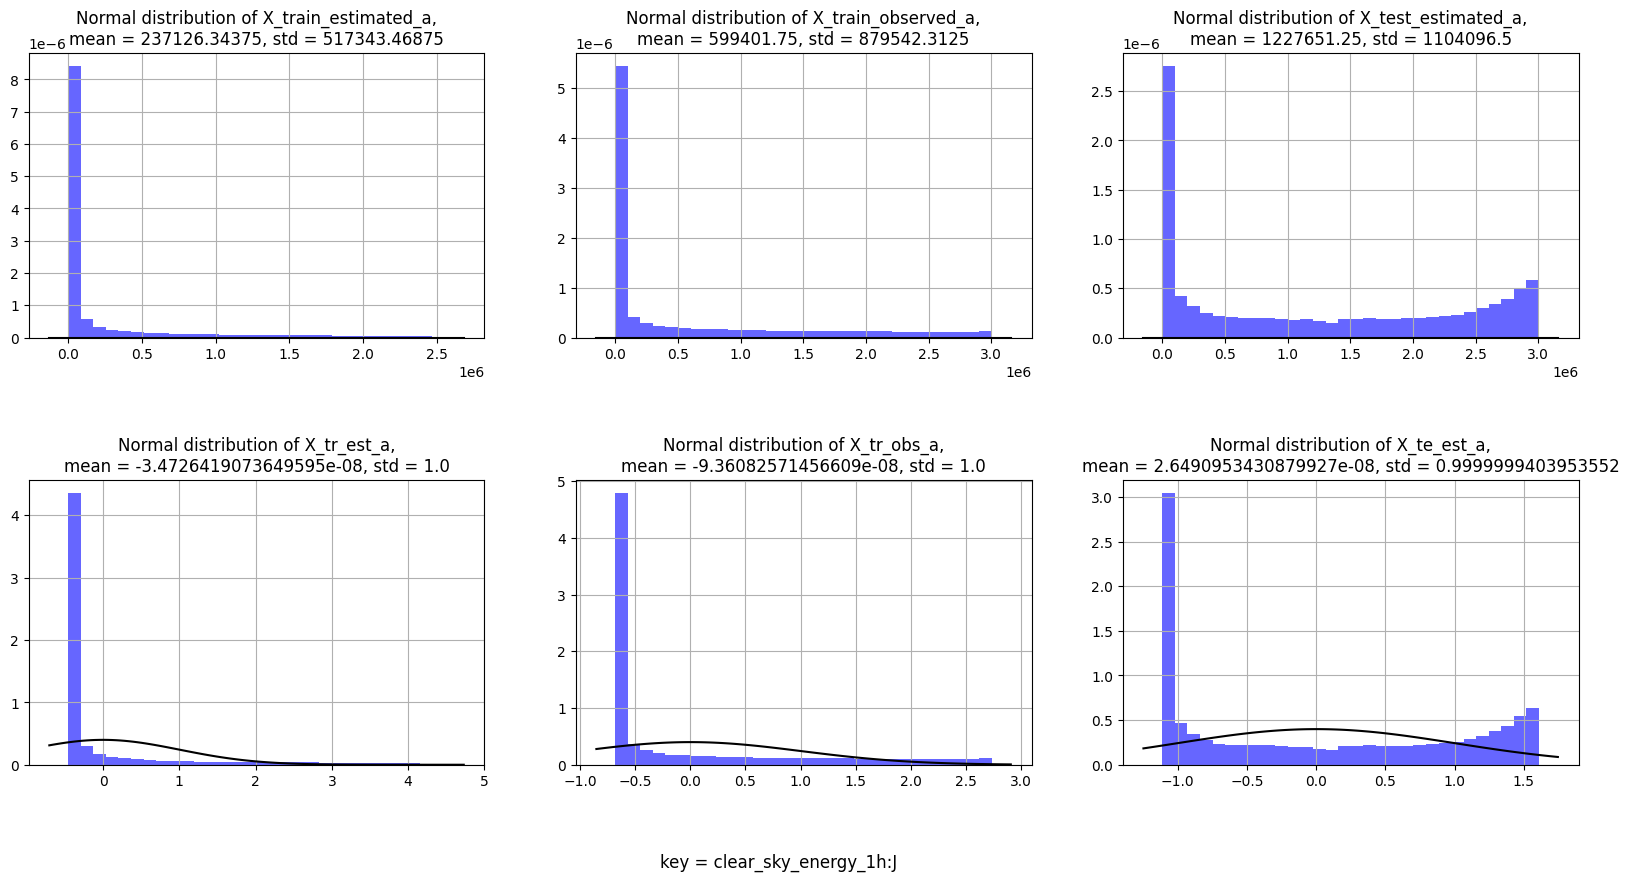

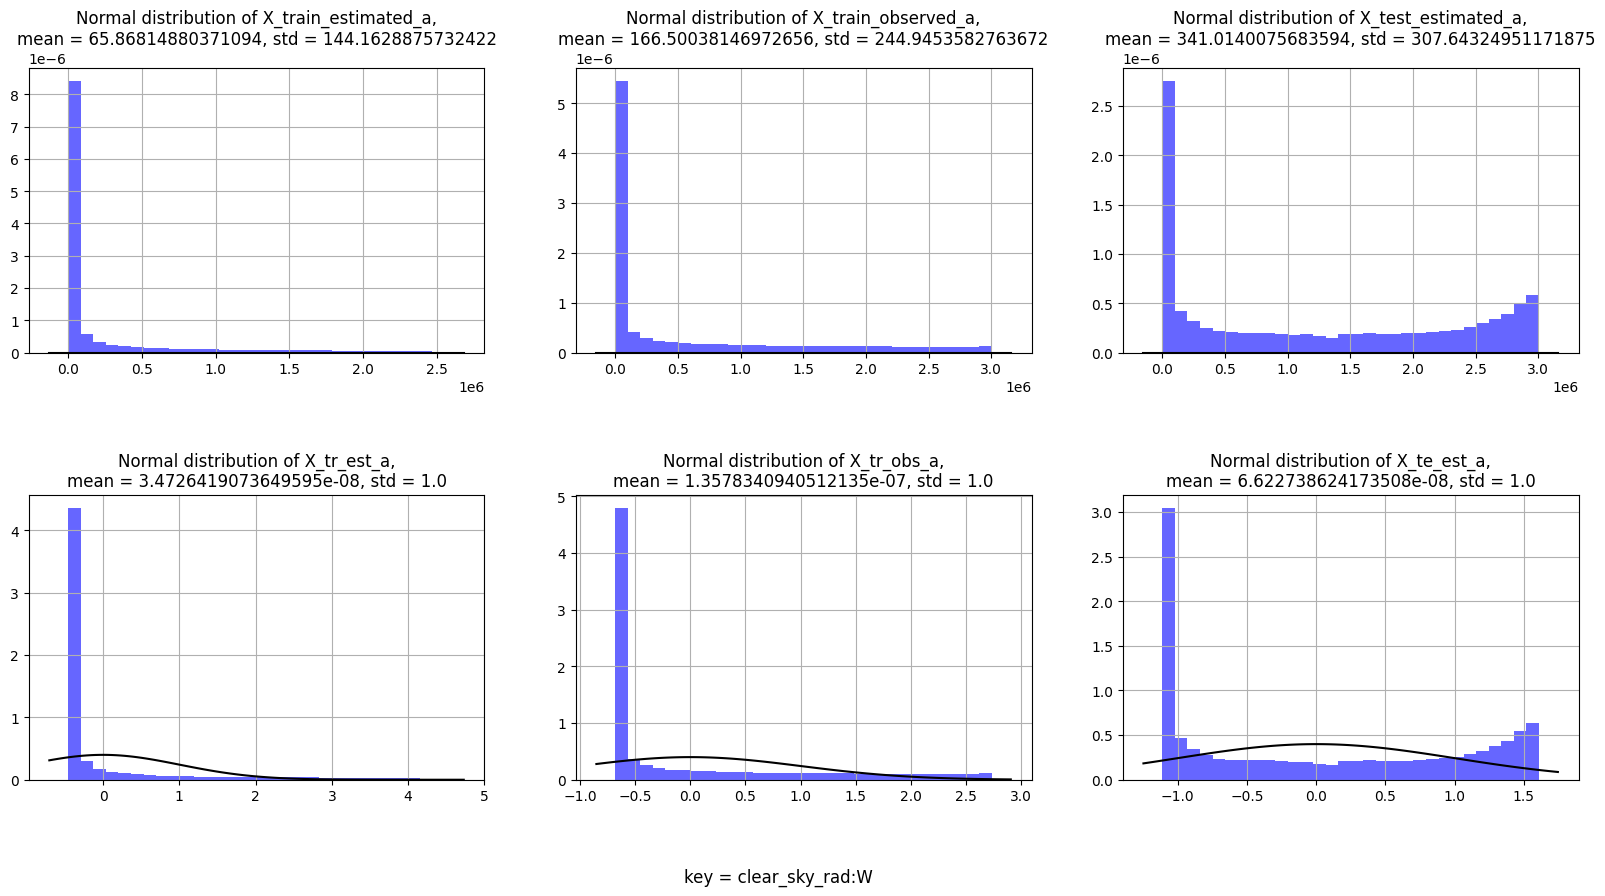

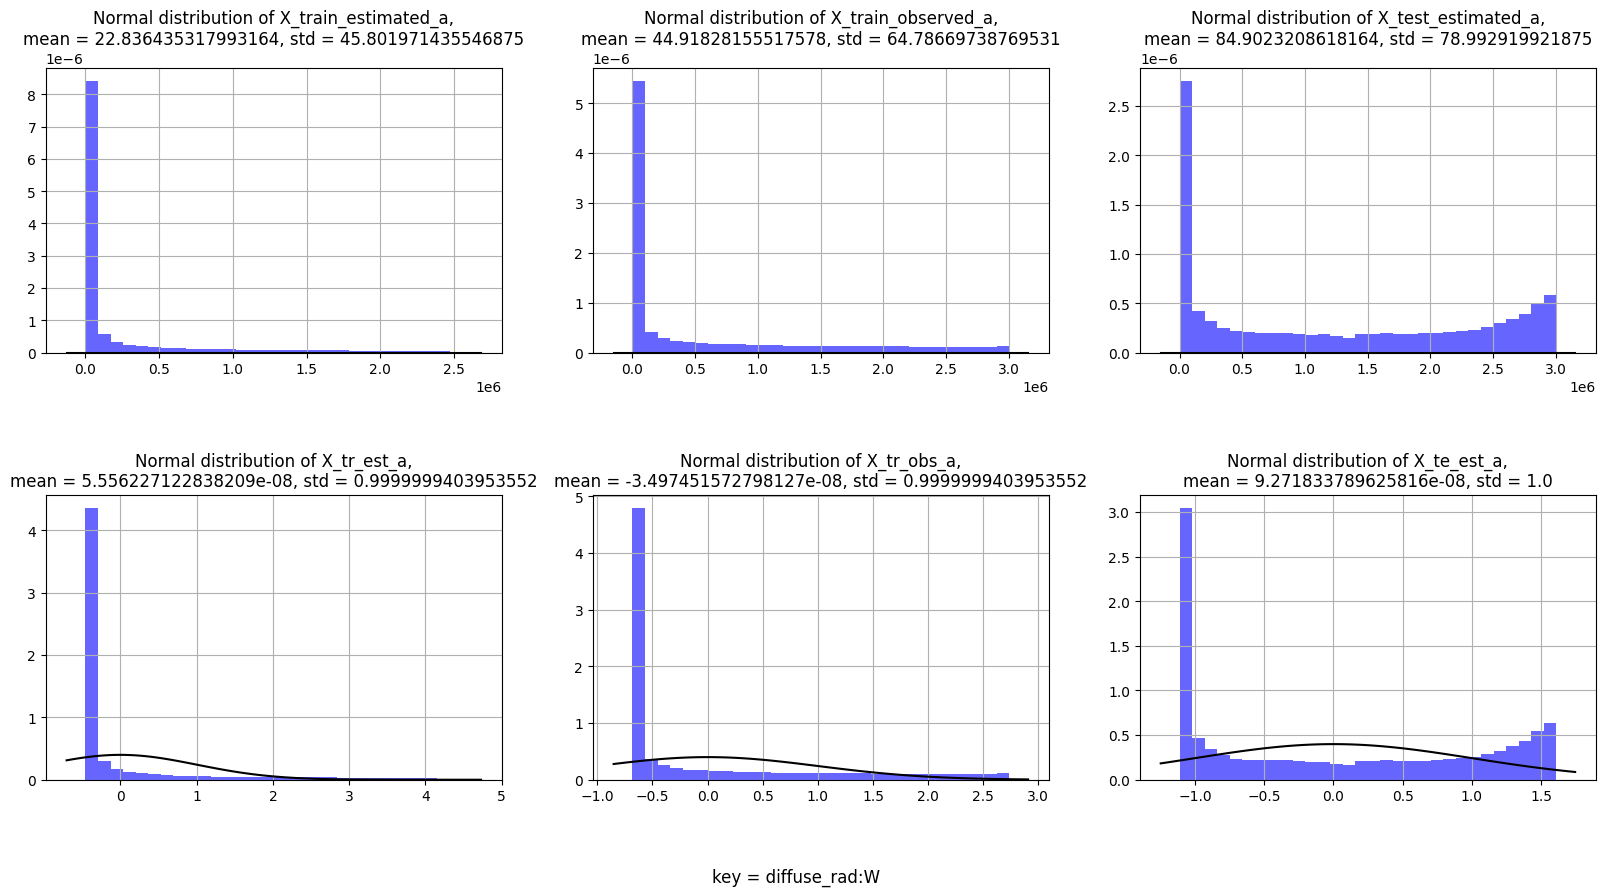

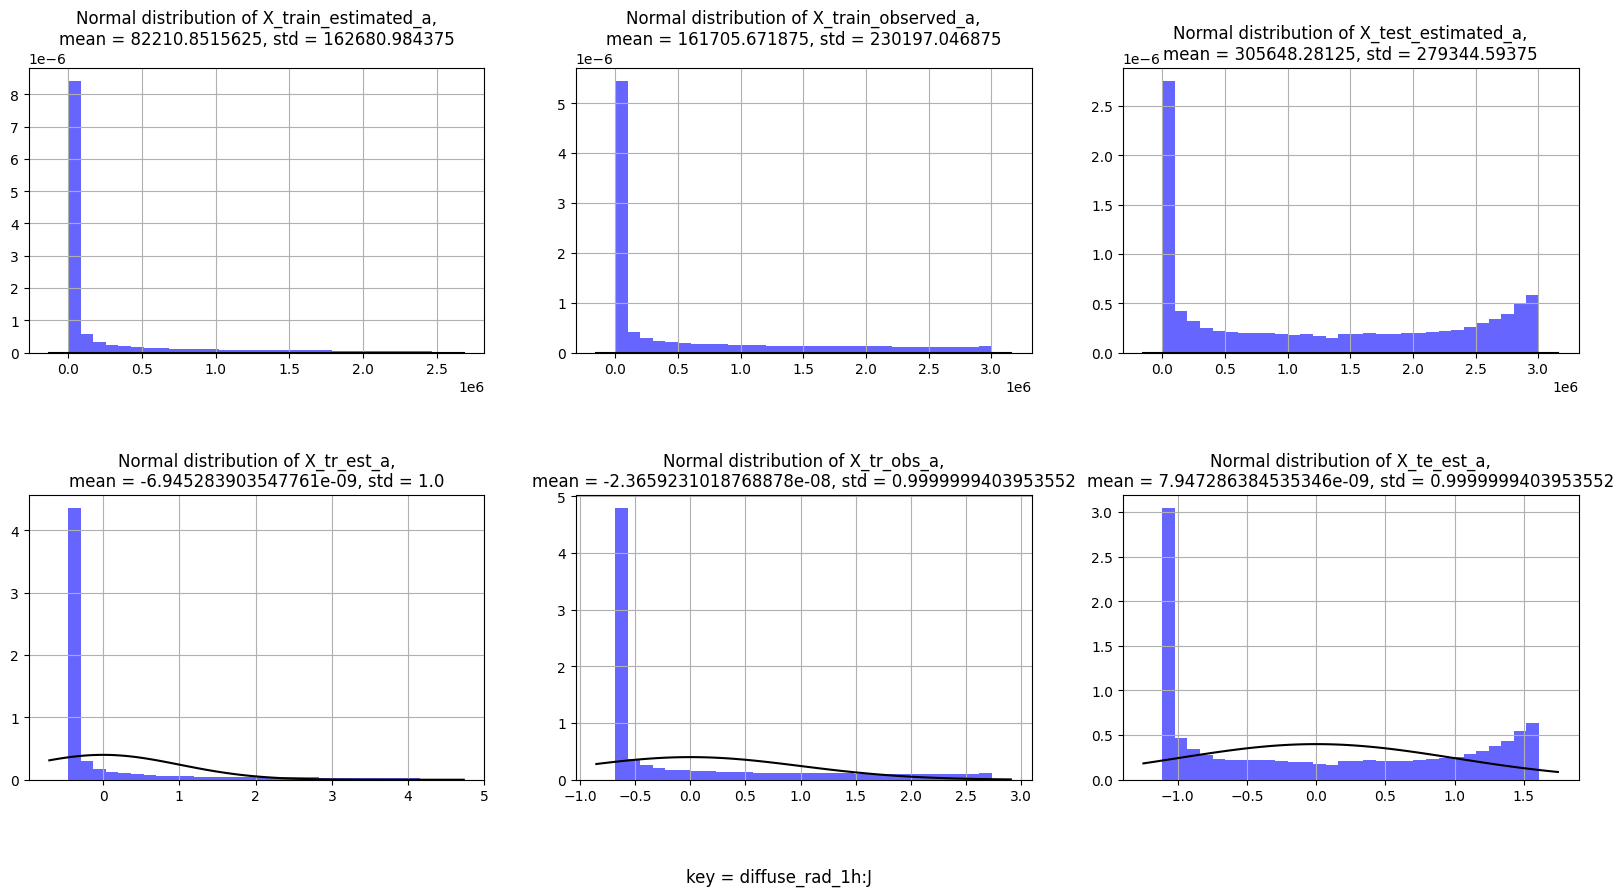

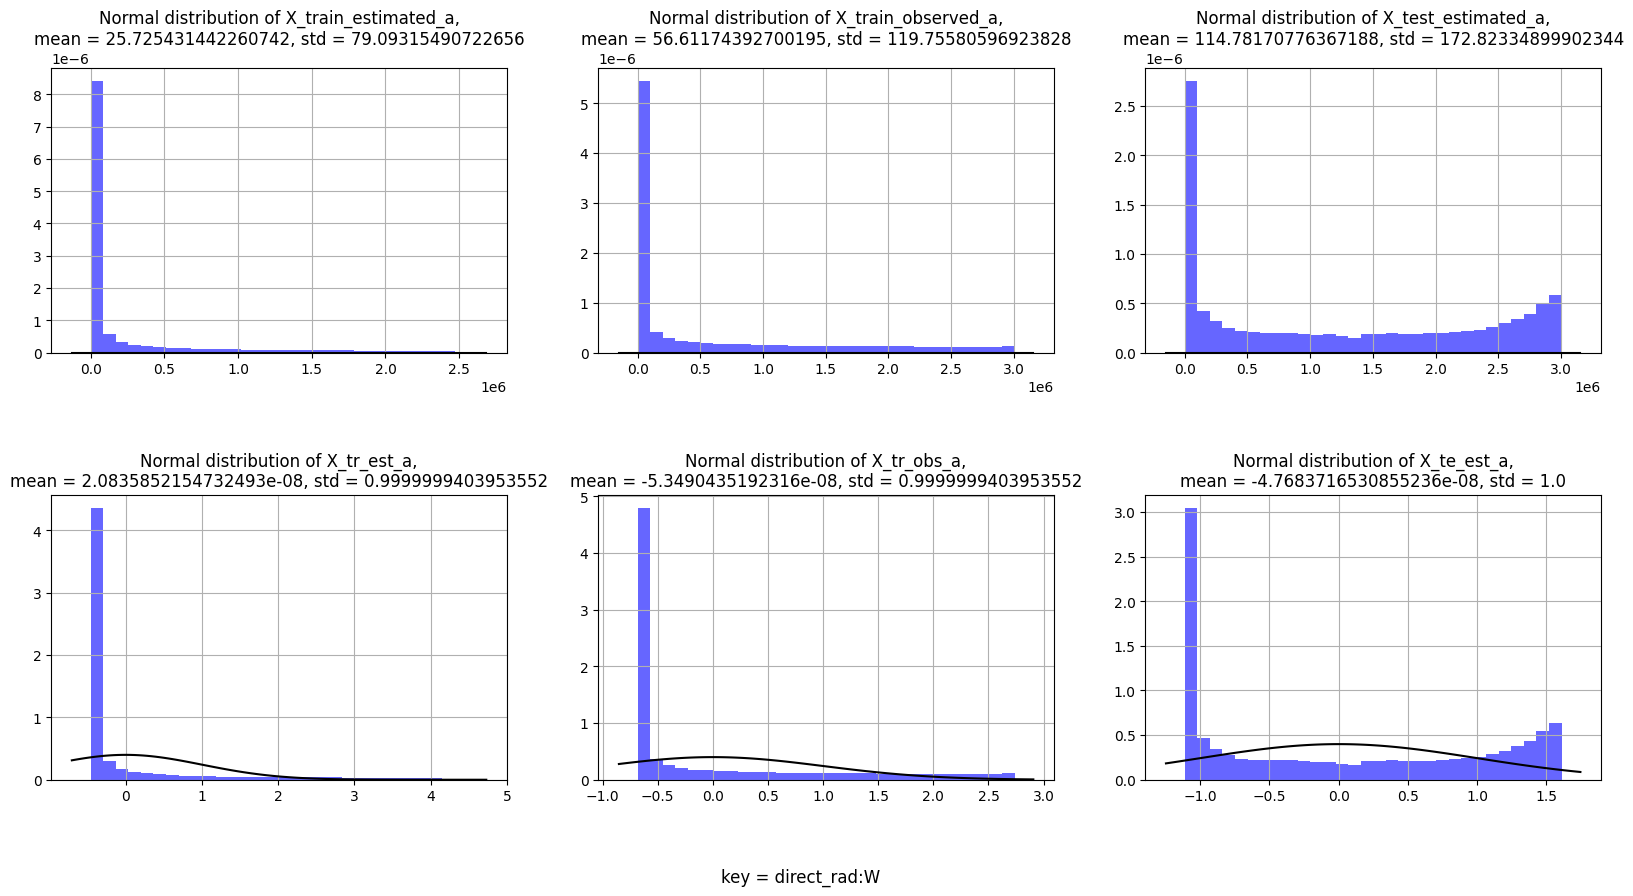

In [17]:
md.subplot_normal_distrib()

In [18]:
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = utils.read_files(diff_path='../')

In [19]:
y_tr_a_ = {}
train_a_mn = train_a.rename(columns={'time': 'ds', 'pv_measurement': 'y'})[:29667] # 29667
mean_norm, std_norm = train_a_mn["y"].mean(), train_a_mn["y"].std()
train_a_mn["y"] = (train_a_mn["y"] - train_a_mn["y"].mean()) / train_a_mn["y"].std()
for h in range(24):
    hour = f"0{h}" if h < 10 else str(h)
    y_tr_a_[h] = train_a_mn[train_a_mn['ds'].dt.strftime('%H:%M:%S').str.endswith(f'{hour}:00:00')]

In [20]:
keys = utils.get_most_important_keys()
keys.remove('date_forecast') if 'date_forecast' in keys else None

In [21]:
train_a['time'].describe()

count                         34085
mean     2021-05-14 00:29:51.497726
min             2019-06-02 22:00:00
25%             2020-05-22 23:00:00
50%             2021-05-13 00:00:00
75%             2022-05-03 01:00:00
max             2023-04-30 23:00:00
Name: time, dtype: object

In [22]:
def summer_dates(df):
    result = df > '2019-04-30' and df < "2019-09-20"
    result += df > '2020-04-30' and df < "2020-09-20"
    result += df > '2021-04-30' and df < "2021-09-20"
    result += df > '2022-04-30' and df < "2022-09-20"
    result += df > '2023-04-30' and df < "2023-09-20"
    return result

In [23]:
train_a_mn[(train_a_mn['ds'] > '2019-04-30') & (train_a_mn['ds'] < "2019-09-20")]

,ds,y
0,2019-06-02 22:00:00,-0.563888
1,2019-06-02 23:00:00,-0.563888
2,2019-06-03 00:00:00,-0.563888
3,2019-06-03 01:00:00,-0.563888
4,2019-06-03 02:00:00,-0.547694
...,...,...
2613,2019-09-19 19:00:00,-0.563888
2614,2019-09-19 20:00:00,-0.563888
2615,2019-09-19 21:00:00,-0.563888
2616,2019-09-19 22:00:00,-0.563888


In [24]:
y_tr_a_ = {}
train_a_mn = train_a.rename(columns={'time': 'ds', 'pv_measurement': 'y'})[:29667] # 29667
mean_norm, std_norm = train_a_mn["y"].mean(), train_a_mn["y"].std()
train_a_mn["y"] = (train_a_mn["y"] - train_a_mn["y"].mean()) / train_a_mn["y"].std()
for h in range(24):
    hour = f"0{h}" if h < 10 else str(h)
    y_tr_a_[h] = train_a_mn[
        (train_a_mn['ds'].dt.strftime('%H:%M:%S').str.endswith(f'{hour}:00:00')) 
        & ( 
            ((train_a_mn['ds'] > '2019-04-30') & (train_a_mn['ds'] < "2019-09-20")) |
            ((train_a_mn['ds'] > '2020-04-30') & (train_a_mn['ds'] < "2020-09-20")) |
            ((train_a_mn['ds'] > '2021-04-30') & (train_a_mn['ds'] < "2021-09-20")) |
            ((train_a_mn['ds'] > '2022-04-30') & (train_a_mn['ds'] < "2022-09-20")) 
        )
    ]

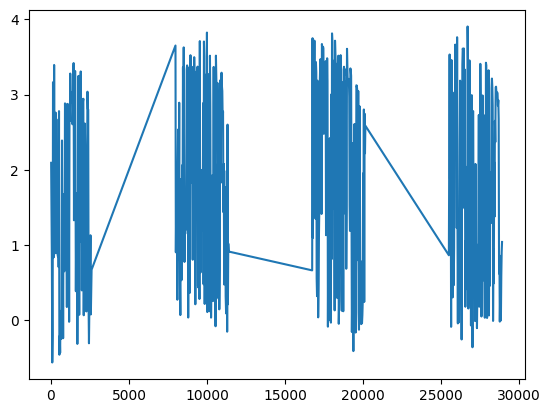

In [25]:
plt.plot(y_tr_a_[12]['y'])

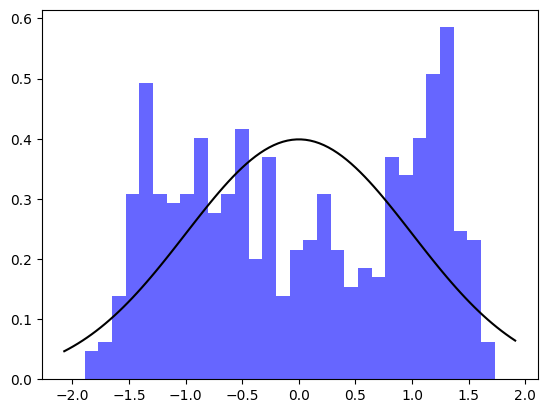

In [26]:
y_12_tr = (y_tr_a_[12]['y'] - y_tr_a_[12]['y'].mean() )/ y_tr_a_[12]['y'].std()
md.plot_normal_distribution(y_12_tr, 0, 1)

In [27]:
X_tr_obs_a_ = {}
# columns_to_drop = [ c for c in df_normalized.columns if (c not in keys) and (c != time_column)]
X_tr_obs_a = md.normalize_df(X_train_observed_a, keys, 'date_forecast')
for h in range(24):
    hour = f"0{h}" if h < 10 else str(h)
    X_tr_obs_a_[h] = X_tr_obs_a[(
        X_tr_obs_a['date_forecast'].dt.strftime('%H:%M:%S').str.endswith(f'{hour}:00:00')) 
        & ( 
            ((X_tr_obs_a['date_forecast'] > '2019-04-30') & (X_tr_obs_a['date_forecast'] < "2019-09-20")) |
            ((X_tr_obs_a['date_forecast'] > '2020-04-30') & (X_tr_obs_a['date_forecast'] < "2020-09-20")) |
            ((X_tr_obs_a['date_forecast'] > '2021-04-30') & (X_tr_obs_a['date_forecast'] < "2021-09-20")) |
            ((X_tr_obs_a['date_forecast'] > '2022-04-30') & (X_tr_obs_a['date_forecast'] < "2022-09-20")) 
        )]

In [28]:
X_te_est_a_ = {}
# columns_to_drop = [ c for c in df_normalized.columns if (c not in keys) and (c != time_column)]

X_te_est_a = md.normalize_df(X_test_estimated_a, keys, 'date_forecast')
keys = utils.get_most_important_keys()
for h in range(24):
    hour = f"0{h}" if h < 10 else str(h)
    X_te_est_a_[h] = X_te_est_a[(
        X_te_est_a['date_forecast'].dt.strftime('%H:%M:%S').str.endswith(f'{hour}:00:00'))
        & (
            ((X_te_est_a['date_forecast'] > '2023-04-30') & (X_te_est_a['date_forecast'] < "2023-09-20"))
        )][keys]

In [29]:
def adapt_Xte_to_fit_Xtr(dframe = X_test_estimated_a, diff_path: str='../', date_key = 'date_forecast'):
    # dframe = pd.read_parquet(diff_path + settings.A.X_test_estimated) if dframe is None else dframe
    days = []
    for k in range(1, 31):
        k0  = f'0{k}' if k < 10 else str(k)
        k01 = f'0{k + 1}' if k < 9 else str(k + 1)
        if np.array(dframe[(dframe[date_key] > f'2023-05-{k0}') & (dframe[date_key] < f'2023-05-{k01}')]).shape[0] == 0:
            days.append(f'2023-05-{k0}')
    if np.array(dframe[(dframe[date_key] > f'2023-05-31') & (dframe[date_key] < f'2023-06-01')]).shape[0] == 0: days.append('2023-05-31')
    for k in range(1, 30):
        k0  = f'0{k}' if k < 10 else str(k)
        k01 = f'0{k + 1}' if k < 9 else str(k + 1)
        if np.array(dframe[(dframe[date_key] > f'2023-06-{k0}') & (dframe[date_key] < f'2023-06-{k01}')]).shape[0] == 0:
            days.append(f'2023-06-{k0}')
    if np.array(dframe[(dframe[date_key] > f'2023-06-30') & (dframe[date_key] < f'2023-07-01')]).shape[0] == 0: days.append('2023-06-30')
    for k in range(1, 15):
        k0  = f'0{k}' if k < 10 else str(k)
        k01 = f'0{k + 1}' if k < 9 else str(k + 1)
        if np.array(dframe[(dframe[date_key] > f'2023-07-{k0}') & (dframe[date_key] < f'2023-07-{k01}')]).shape[0] == 0:
            days.append(f'2023-07-{k0}')
    return days

In [32]:
date_format = '%Y-%m-%d %H:%M:%S'

days_to_fit = adapt_Xte_to_fit_Xtr()
for h in range(24):
    days_known = utils.get_days_to_predict()
    last_day_known = days_known[0]
    next_day_known = days_known[1]
    hour = f"0{h}" if h < 10 else str(h)
    next_index = 1
    last_values = (X_te_est_a_[h][X_te_est_a_[h]['date_forecast'] == f'{last_day_known} {hour}:00:00'][keys]).copy()
    # print('last values\n', last_values)
    for d in days_to_fit:
        last_values['date_forecast'] = pd.to_datetime(f'{d} {hour}:00:00')
        if d > next_day_known:
            next_index += 1
            last_day_known = next_day_known
            next_day_known = days_known[next_index] if next_index < len(days_known) - 1 else days_known[len(days_known) - 1]
            last_values = (X_te_est_a_[h][X_te_est_a_[h]['date_forecast'] == f'{last_day_known} {hour}:00:00'][keys]).copy()
            # timestamp = datetime.strptime(f"{d} {h}:00:00", date_format)
        last_len = len(X_te_est_a_[h]) 
        # print(X_te_est_a_[h], last_values)
        # X_te_est_a_[h] = pd.concat([X_te_est_a_[h], last_values], ignore_index=True)
        print('ici ->', X_te_est_a_[h].columns, last_values.columns)
        X_te_est_a_[h] = X_te_est_a_[h].append(last_values)
        
    # X_te_est_a_[h]['date_forecast'] = pd.to_datetime(X_te_est_a_[h]['date_forecast'])
    X_te_est_a_[h] = X_te_est_a_[h].sort_values(by='date_forecast')

ici -> Index(['date_forecast', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W'],
      dtype='object') Index(['date_forecast', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W'],
      dtype='object')


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
X_te_est_a_[10]

,date_forecast,clear_sky_energy_1h:J,clear_sky_rad:W,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,0
0,2023-05-01 10:00:00,1.027806,1.121708,1.567200,1.394177,1.203068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-06 10:00:00,1.105906,1.198421,2.239412,2.075026,1.118589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-05-14 10:00:00,1.212657,1.303087,0.063267,0.046198,2.787345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-05-18 10:00:00,1.257526,1.347294,1.803930,1.259329,1.395172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-05-20 10:00:00,1.277831,1.367447,0.701299,0.568652,2.259060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383113,NaN
566,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.47634,NaN
567,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.868493,NaN
568,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.952062,NaN


In [ ]:
last_values = X_te_est_a_[23][X_te_est_a_[23]['date_forecast'] == '2023-05-01 23:00:00'][keys]
last_values

,date_forecast,clear_sky_energy_1h:J,clear_sky_rad:W,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W
0,2023-05-01 23:00:00,-1.111906,-1.108472,-1.074809,-1.094162,-0.664156


In [ ]:
last_values = X_te_est_a_[h][X_te_est_a_[h]['date_forecast'] == f'{last_day_known} {hour}:00:00'][keys]

last_values, last_day_known, hour

(         date_forecast  clear_sky_energy_1h:J  clear_sky_rad:W  diffuse_rad:W  \
 29 2023-07-03 23:00:00              -1.111906        -1.108472      -1.074809   
 
     diffuse_rad_1h:J  direct_rad:W  
 29         -1.094162     -0.664156  ,
 '2023-07-03',
 '23')

In [ ]:
last_values

,date_forecast,clear_sky_energy_1h:J,clear_sky_rad:W,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W
29,2023-07-03 23:00:00,-1.111906,-1.108472,-1.074809,-1.094162,-0.664156


In [ ]:
X_te_est_a_[23]

,date_forecast,clear_sky_energy_1h:J,clear_sky_rad:W,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,92,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,2023-05-01 23:00:00,-1.111906,-1.108472,-1.074809,-1.094162,-0.664156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-06 23:00:00,-1.111906,-1.108472,-1.074809,-1.094162,-0.664156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-05-14 23:00:00,-1.111906,-1.108472,-1.074809,-1.094162,-0.664156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-05-18 23:00:00,-1.111906,-1.108472,-1.074809,-1.094162,-0.664156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-05-20 23:00:00,-1.111906,-1.108472,-1.074809,-1.094162,-0.664156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.111906
296,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.108472
297,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.074809
298,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.094162


In [ ]:
years = ['2019', '2020', '2021', '2022']
Xtr = { y: { h: X_tr_obs_a_[h][((X_tr_obs_a_[h]['date_forecast'] > f"{y}-04-30") & (X_tr_obs_a_[h]['date_forecast'] < f"{y}-09-20"))][keys] for h in range(24)} for y in years}

for k in keys:
    plt.figure(figsize=(20,8))
    for y in years:
        plt.plot(np.array(X_te_est_a[h][k]) - np.array(Xtr[y][13][k]), label=y)
    plt.grid()
    plt.title(k)
    plt.legend()
    plt.show()

KeyError: 23

<Figure size 2000x800 with 0 Axes>

In [ ]:
train_a_mn['y'].min()

-0.5638876051008057

In [ ]:
train_a_mn[train_a_mn['ds'].dt.strftime('%H:%M:%S').str.endswith('12:00:00') & train_a_mn['y'] == train_a_mn['y'].min()]

,ds,y


In [ ]:
train_a[(train_a['time'].dt.strftime('%H:%M:%S').str.endswith('12:00:00')) & (train_a['pv_measurement'] == 0.0)]

,time,pv_measurement
86,2019-06-06 12:00:00,0.0
4526,2019-12-08 12:00:00,0.0
4958,2019-12-26 12:00:00,0.0
5198,2020-01-05 12:00:00,0.0
22430,2021-12-23 12:00:00,0.0
22454,2021-12-24 12:00:00,0.0
22934,2022-01-13 12:00:00,0.0
22982,2022-01-15 12:00:00,0.0


/Users/arthurtestard/ntnu_code/machine_learning/ml_competition/models_arthur/model_distributions.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  pdf = (1.0 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
/Users/arthurtestard/ntnu_code/machine_learning/ml_competition/models_arthur/model_distributions.py:42: RuntimeWarning: divide by zero encountered in divide
  pdf = (1.0 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
/Users/arthurtestard/ntnu_code/machine_learning/ml_competition/models_arthur/model_distributions.py:42: RuntimeWarning: invalid value encountered in multiply
  pdf = (1.0 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))


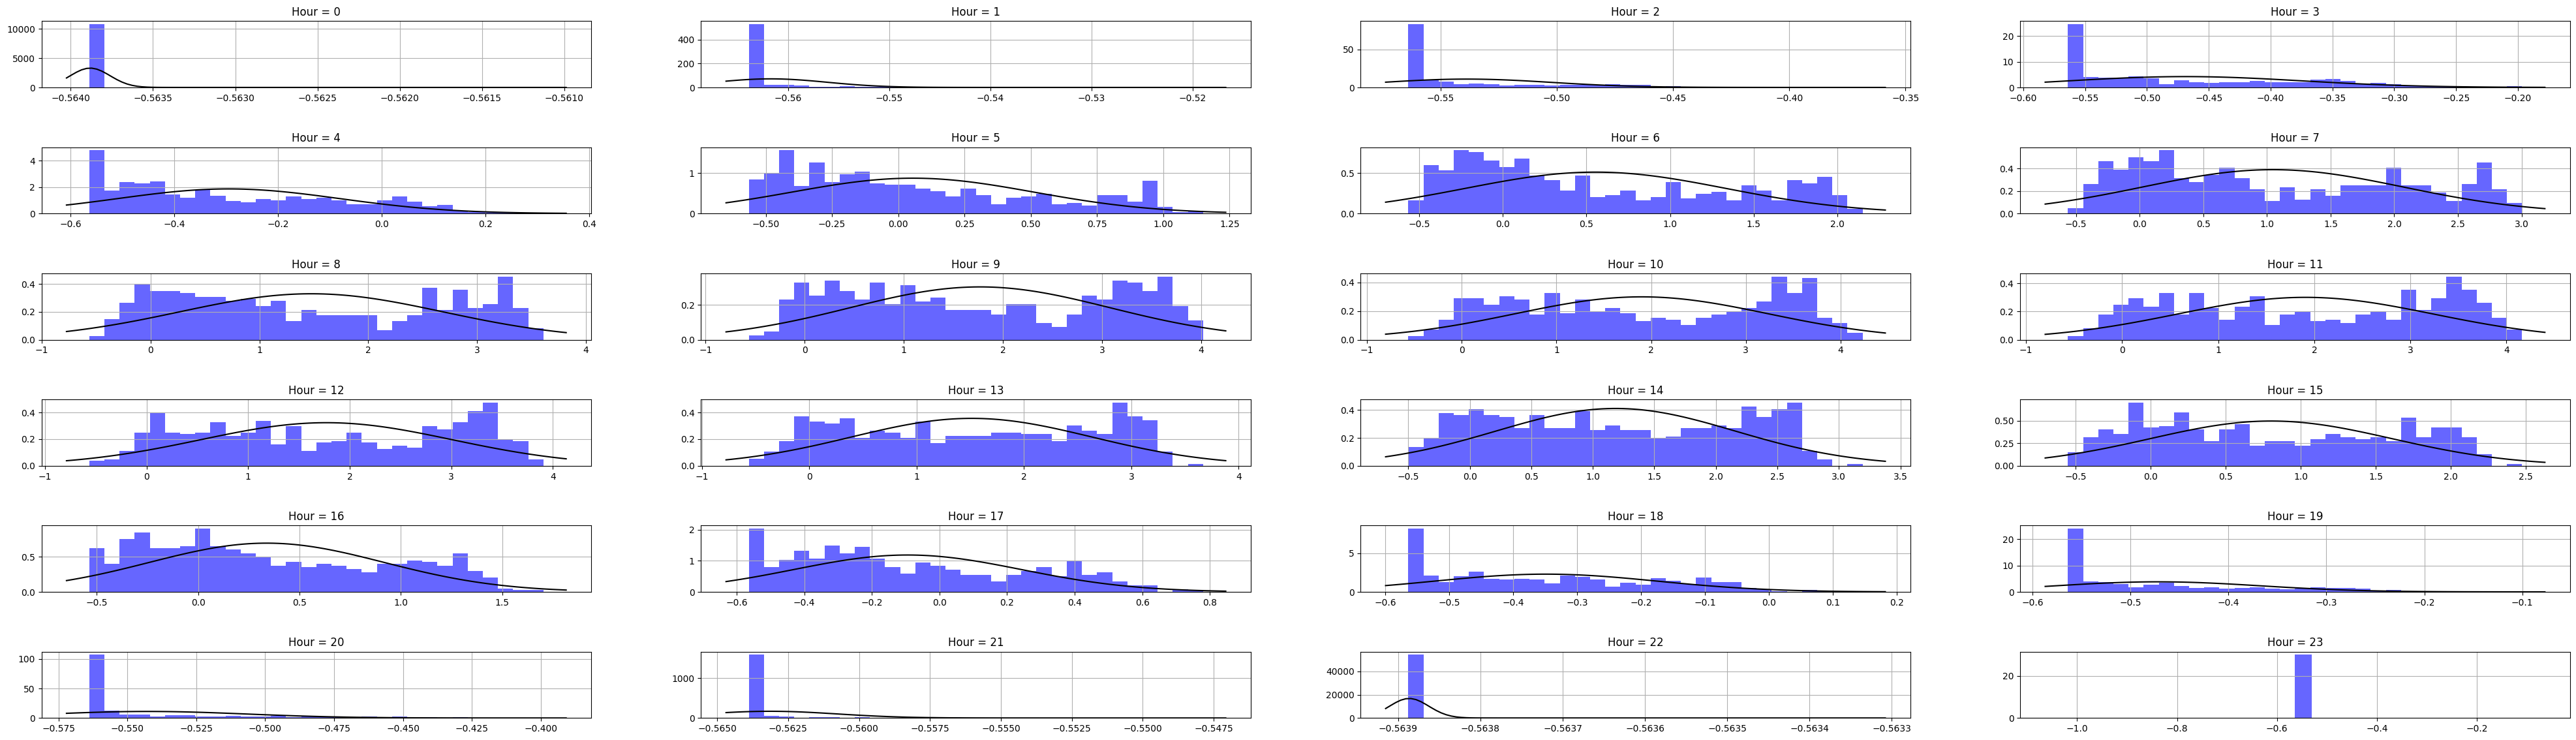

In [ ]:
plt.figure(figsize=(50, 12))
for h in range(24):
    # print("hour:", h)
    plt.subplot(6, 4, h + 1)
    md.plot_normal_distribution(y_tr_a_[h]['y'], y_tr_a_[h]['y'].mean(), y_tr_a_[h]['y'].std())
    plt.title(f"Hour = {h}")
    plt.grid()

plt.subplots_adjust(top=1., hspace=.9)
plt.show()

/Users/arthurtestard/envs/ntnu/mlsolar/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


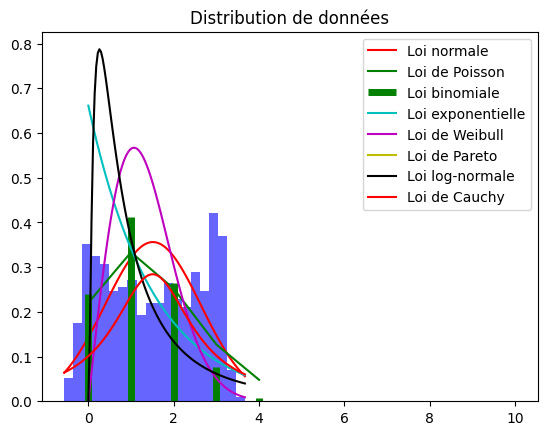

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

donnees = y_tr_a_[13]['y']

plt.hist(donnees, bins=20, density=True, alpha=0.6, color='b')
plt.title("Distribution de données")

mu, sigma = np.mean(donnees), np.std(donnees)
x = np.linspace(min(donnees), max(donnees), 100)
pdf_normal = stats.norm.pdf(x, mu, sigma)

plt.plot(x, pdf_normal, 'r-', label='Loi normale')

# Ajustez une distribution de Poisson
lambda_poisson = mu
pdf_poisson = stats.poisson.pmf(np.arange(0, max(donnees) + 1), lambda_poisson)

plt.plot(np.arange(0, max(donnees) + 1), pdf_poisson, 'g-', label='Loi de Poisson')

# # Ajustez une distribution exponentielle
# beta_exponentielle = 1 / mu
# pdf_exponentielle = stats.expon.pdf(x, scale=1/beta_exponentielle)

# plt.plot(x, pdf_exponentielle, 'b-', label='Loi exponentielle')


# Ajustez une loi de Bernoulli
# p_ber = 0.2  # Probabilité de succès
# rv_ber = stats.bernoulli(p_ber)
# x_ber = [0, 1]
# plt.vlines(x_ber, 0, rv_ber.pmf(x_ber), colors='r', lw=5, label='Loi de Bernoulli')

# Ajustez une loi binomiale
n_binom = 4 # donnees.max() # 10  # Nombre d'essais
p_binom = 0.3  # Probabilité de succès
rv_binom = stats.binom(n_binom, p_binom)
x_binom = np.arange(0, 11)
plt.vlines(x_binom, 0, rv_binom.pmf(x_binom), colors='g', lw=5, label='Loi binomiale')

# Ajustez une loi exponentielle
lambda_exp = 1 / np.mean(donnees)  # Taux (inverse de la moyenne)
x_exp = np.linspace(0, max(donnees), 100)
pdf_exp = stats.expon.pdf(x_exp, scale=1/lambda_exp)
plt.plot(x_exp, pdf_exp, 'c', label='Loi exponentielle')

# # Ajustez une loi de Weibull
# c_weibull = 2  # Paramètre de forme
# lambda_weibull = np.mean(donnees)  # Paramètre d'échelle
# x_weibull = np.linspace(0, max(donnees), 100)
# pdf_weibull = stats.exponweib.pdf(x_weibull, c_weibull, scale=lambda_weibull)
# plt.plot(x_weibull, pdf_weibull, 'm', label='Loi de Weibull')

# Ajustez une loi de Weibull
c_weibull = 2  # Paramètre de forme
lambda_weibull = np.mean(donnees)  # Paramètre d'échelle
x_weibull = np.linspace(0, max(donnees), 100)
pdf_weibull = stats.weibull_min.pdf(x_weibull, c_weibull, scale=lambda_weibull)
plt.plot(x_weibull, pdf_weibull, 'm', label='Loi de Weibull')


# Ajustez une loi de Pareto
alpha_pareto = 2.5  # Index de forme
xm_pareto = np.min(donnees)  # Échelle minimale
x_pareto = np.linspace(min(donnees), max(donnees), 100)
pdf_pareto = stats.pareto.pdf(x_pareto, alpha_pareto, scale=xm_pareto)
plt.plot(x_pareto, pdf_pareto, 'y', label='Loi de Pareto')

# Ajustez une loi log-normale
mu_ln = np.log(np.mean(donnees)) - 0.5 * np.var(np.log(donnees))
sigma_ln = np.sqrt(np.var(np.log(donnees)))
x_ln = np.linspace(0, max(donnees), 100)
pdf_ln = stats.lognorm.pdf(x_ln, sigma_ln, scale=np.exp(mu_ln))
plt.plot(x_ln, pdf_ln, 'k', label='Loi log-normale')

# Ajustez une loi de Cauchy
x0_cauchy = np.median(donnees)  # Médiane
gamma_cauchy = np.std(donnees)  # Largeur à mi-hauteur
x_cauchy = np.linspace(min(donnees), max(donnees), 100)
pdf_cauchy = stats.cauchy.pdf(x_cauchy, x0_cauchy, gamma_cauchy)
plt.plot(x_cauchy, pdf_cauchy, 'r', label='Loi de Cauchy')

plt.legend()
plt.show()

/var/folders/dv/nzlg6jm168311nq7f93wfrd80000gn/T/ipykernel_83840/4280817834.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,8))


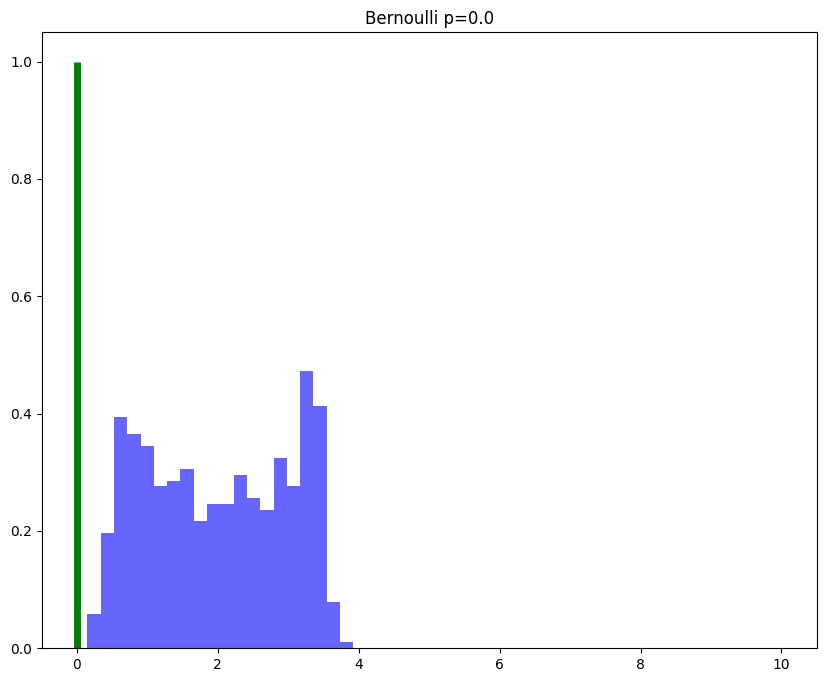

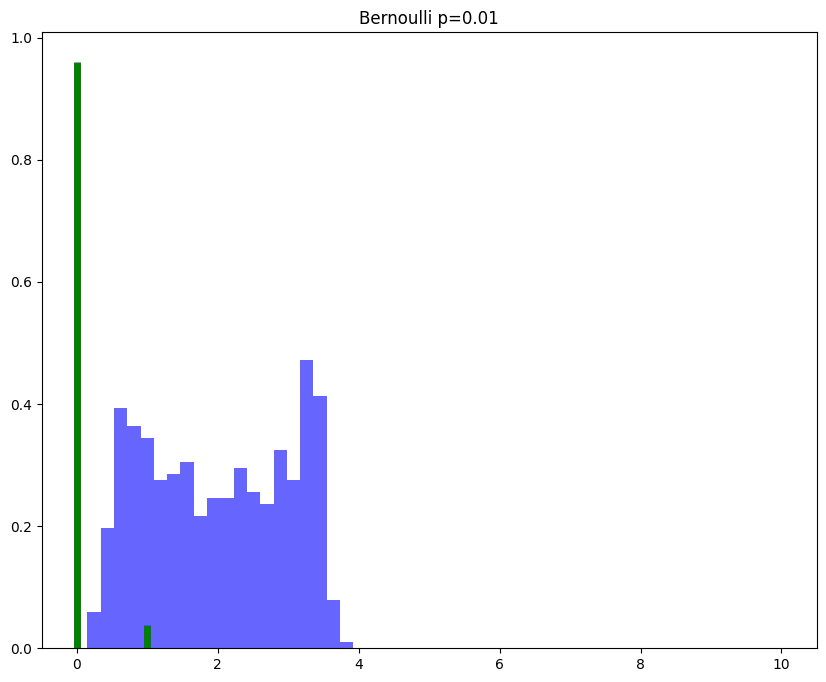

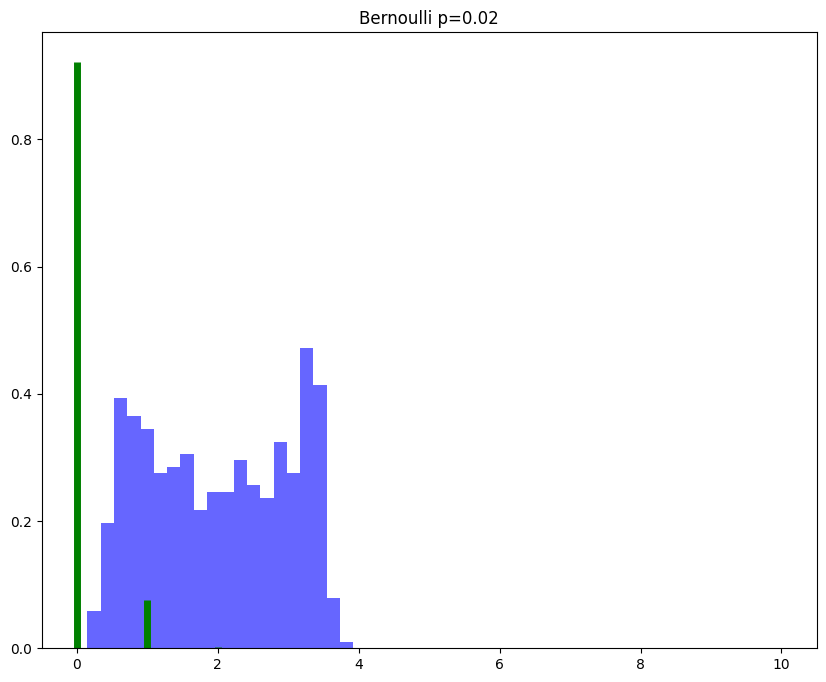

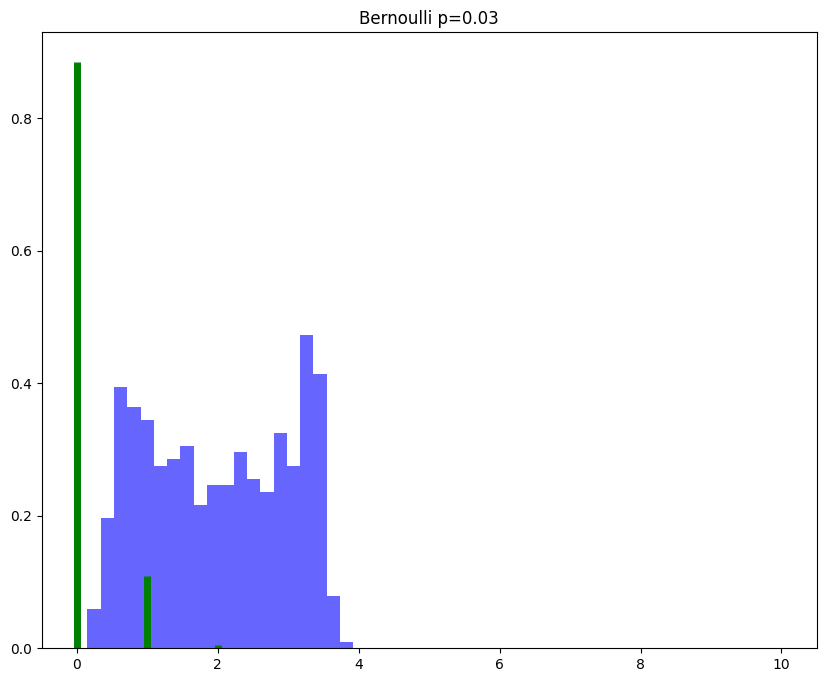

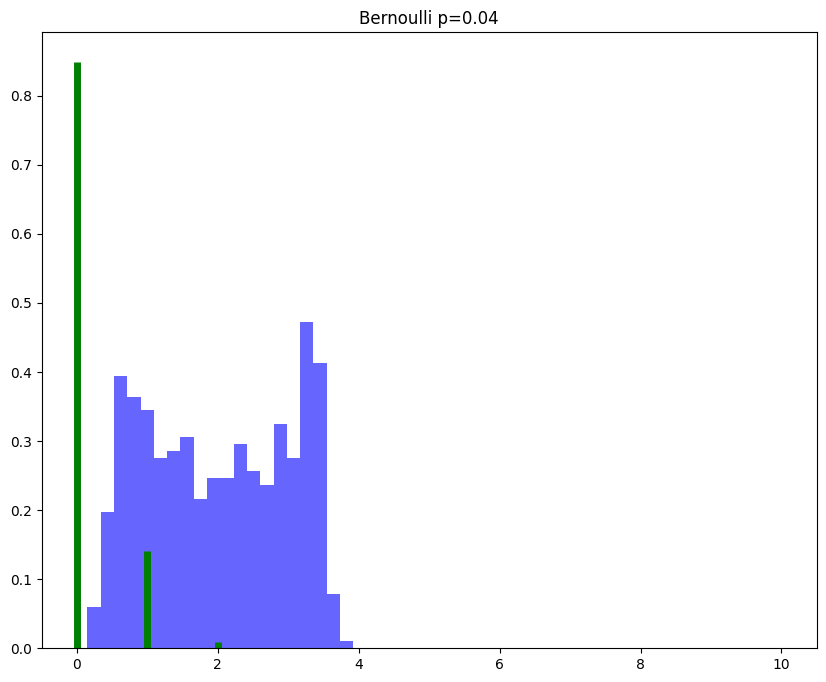

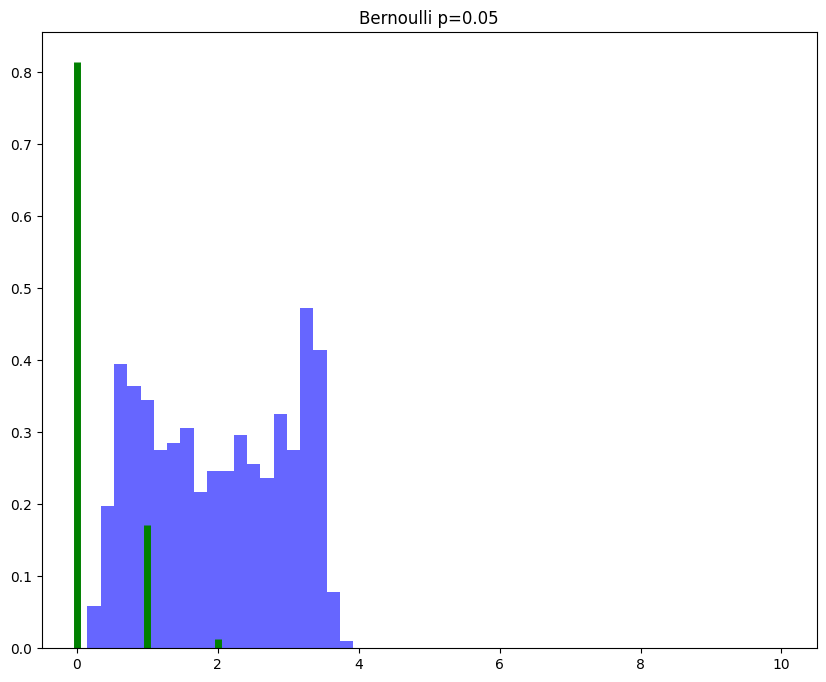

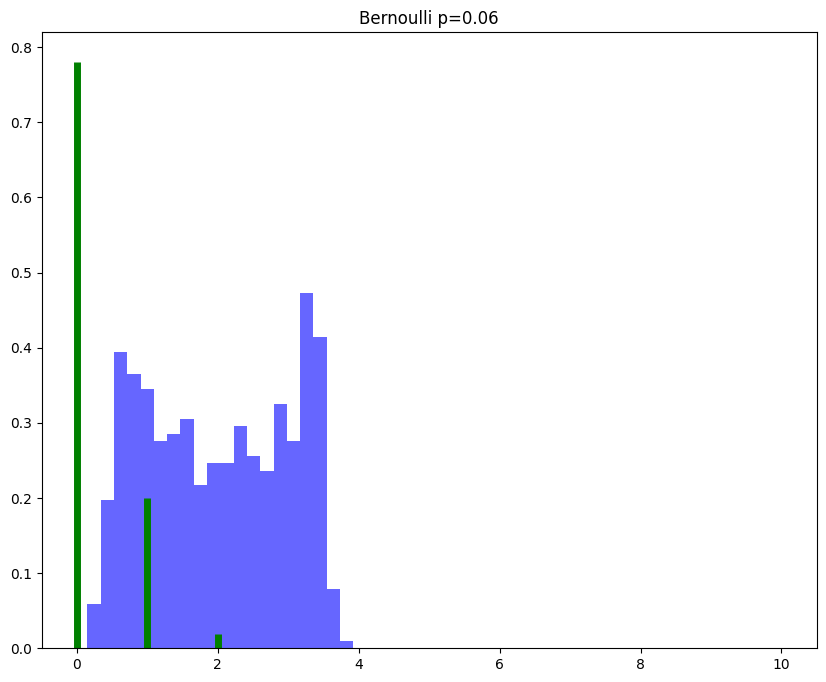

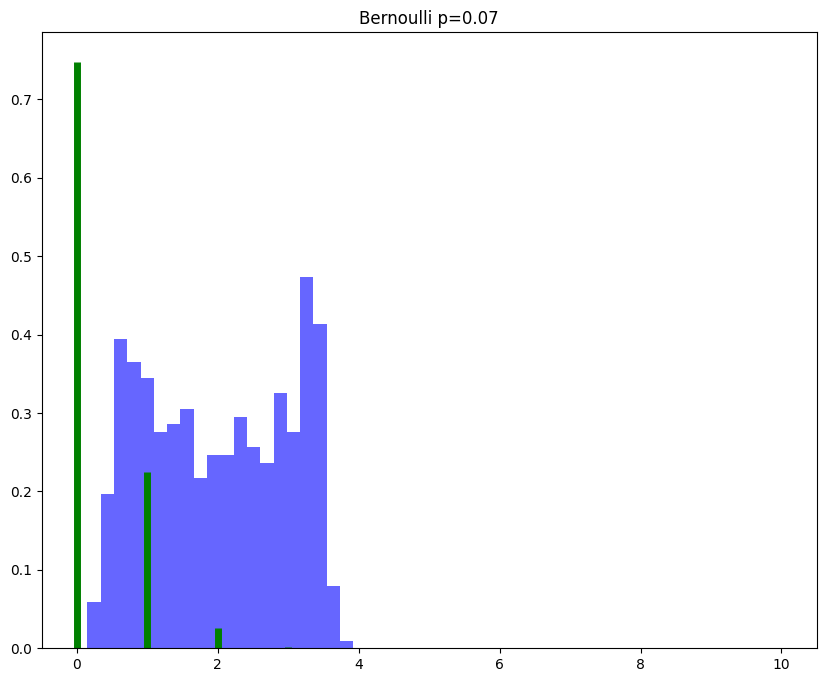

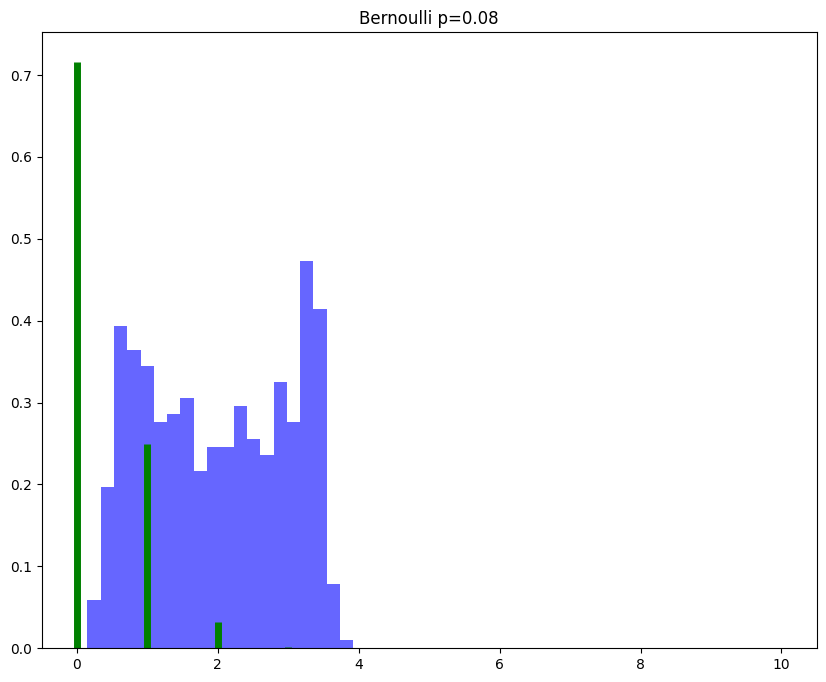

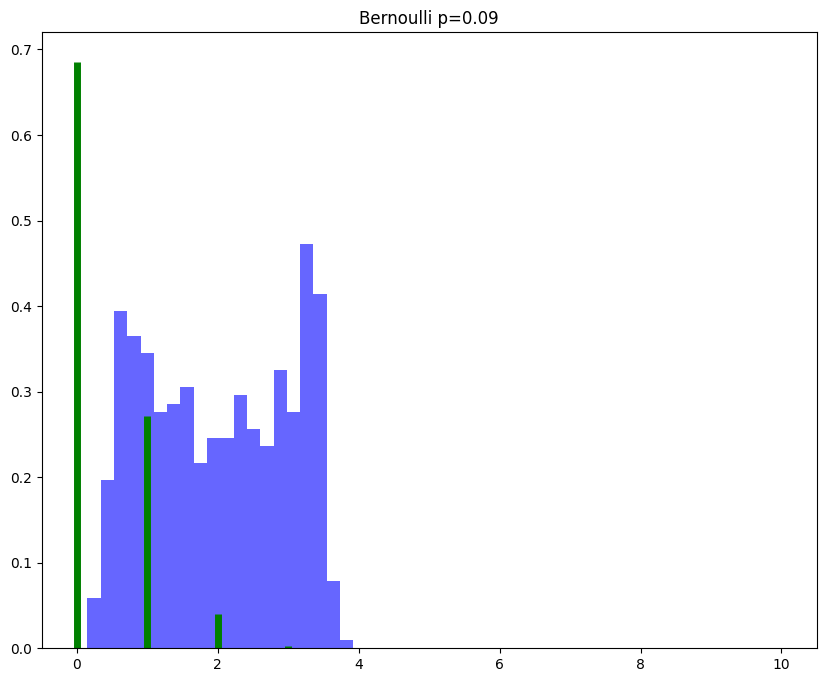

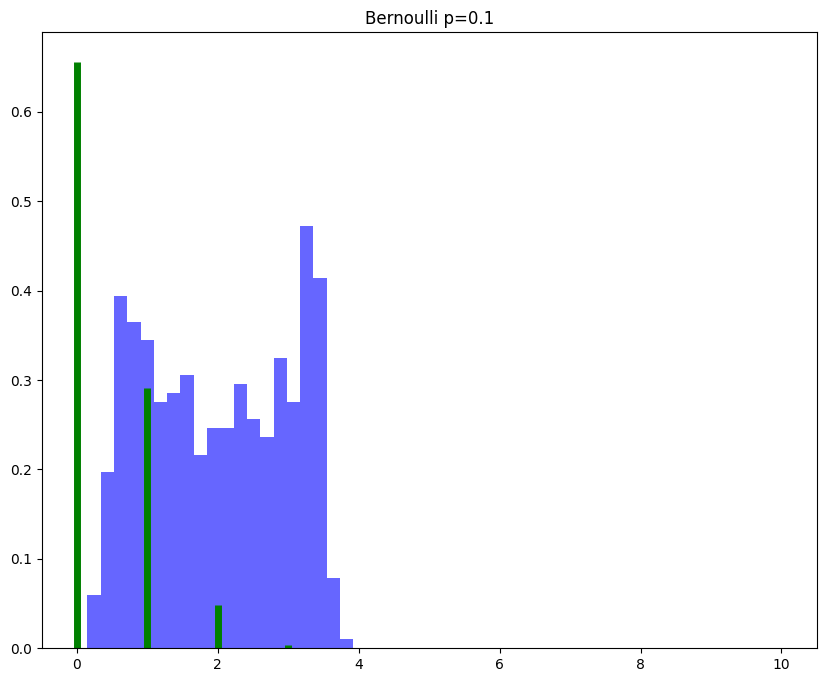

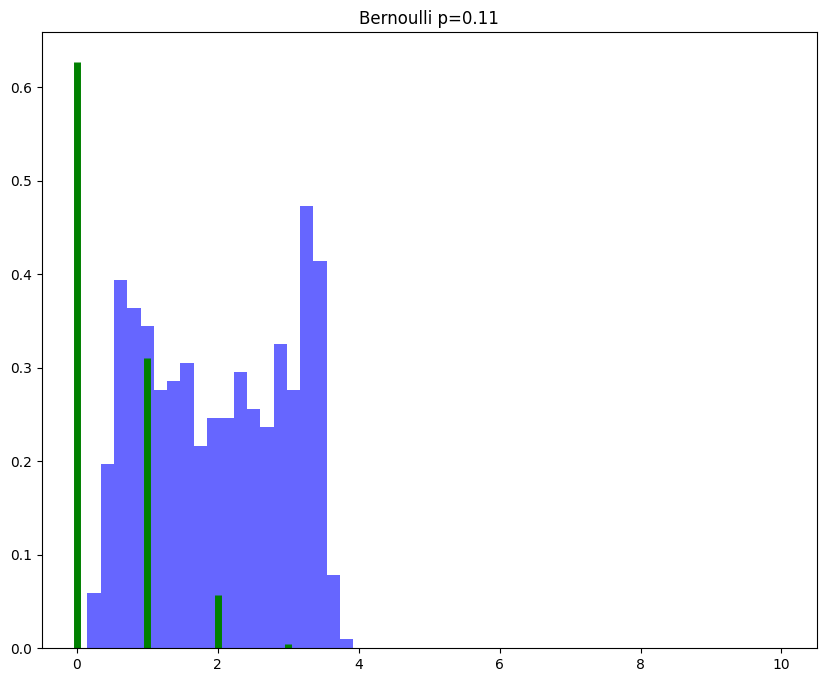

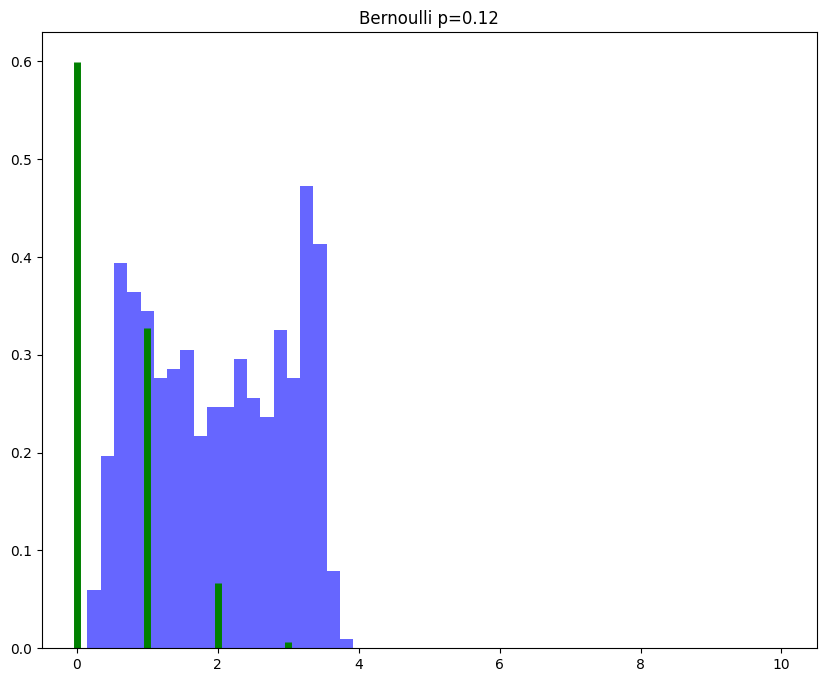

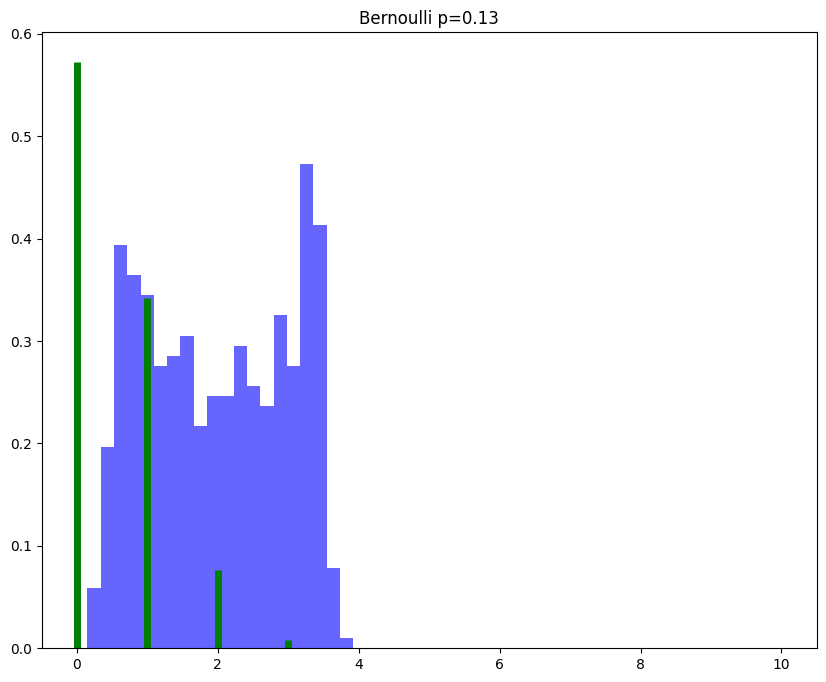

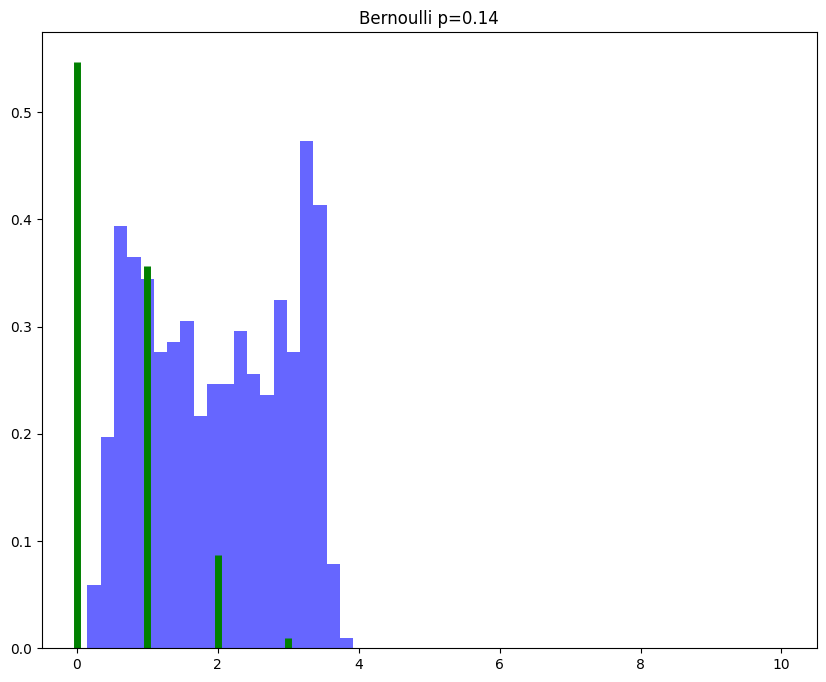

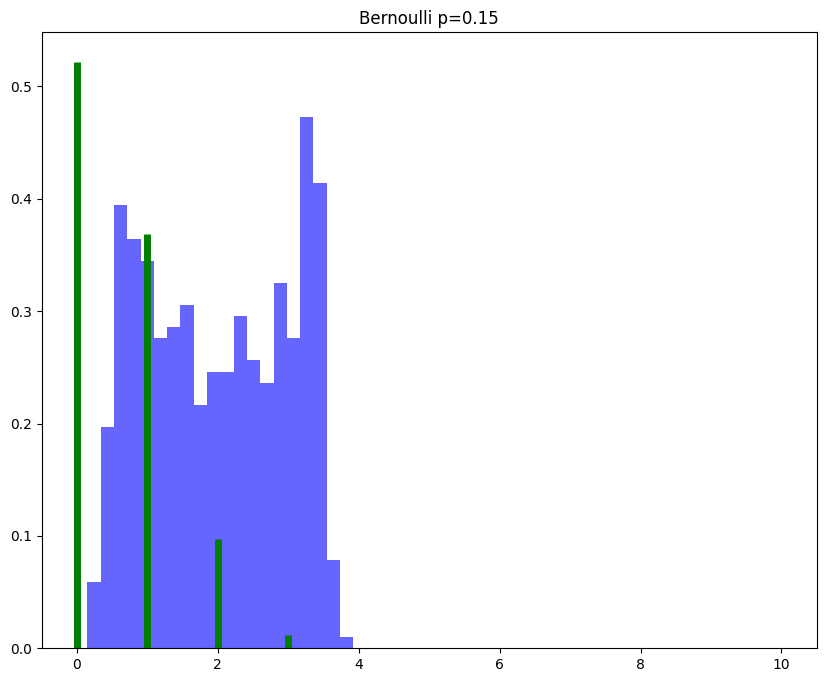

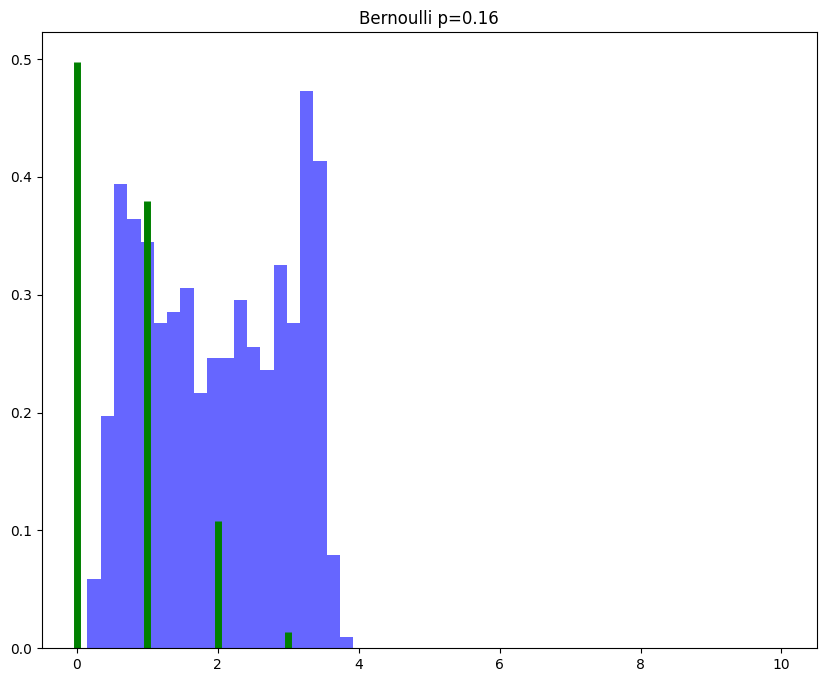

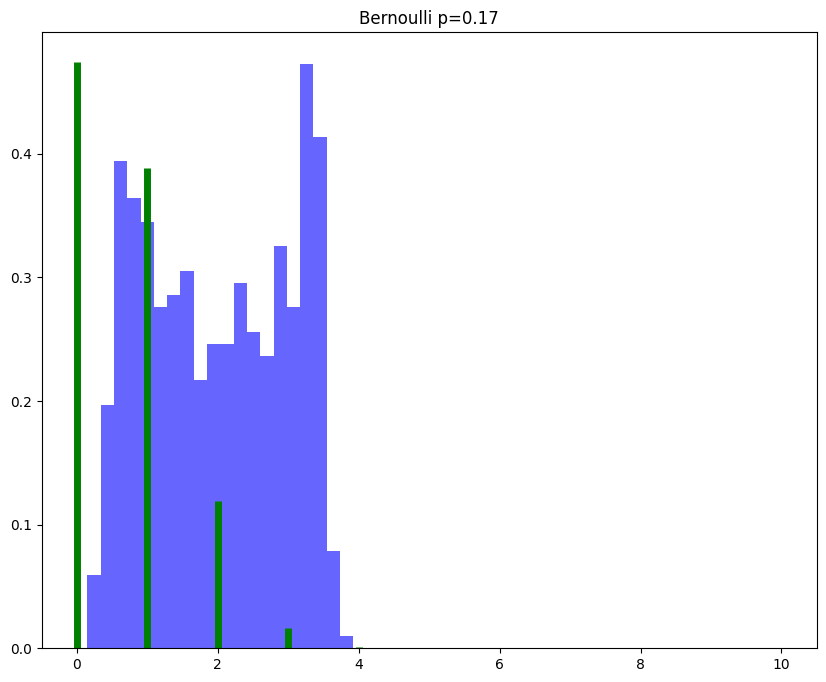

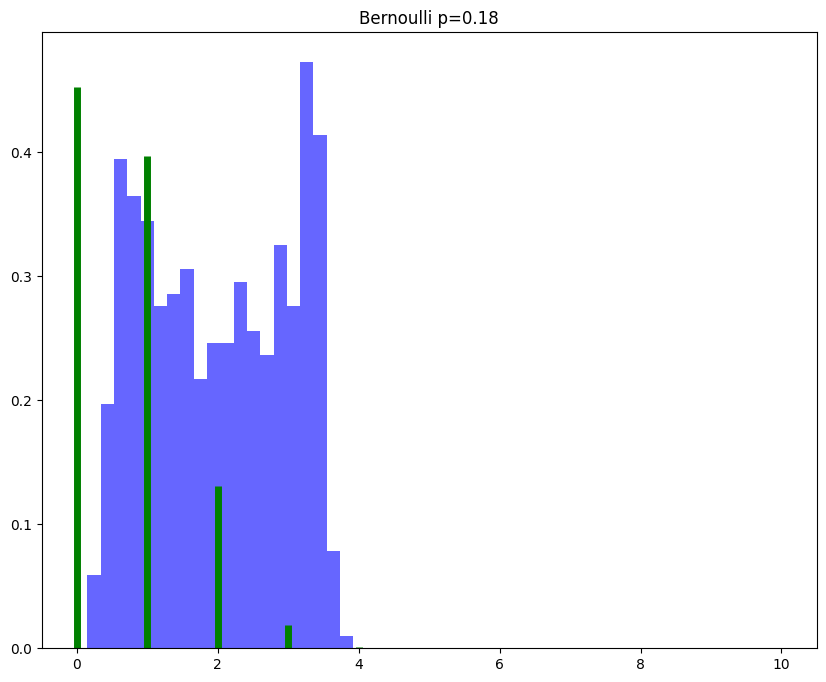

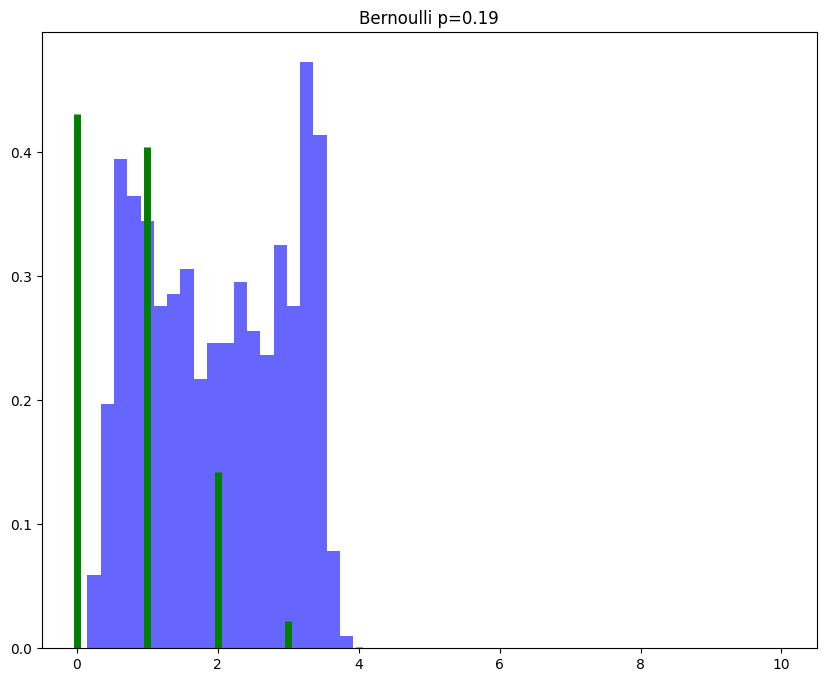

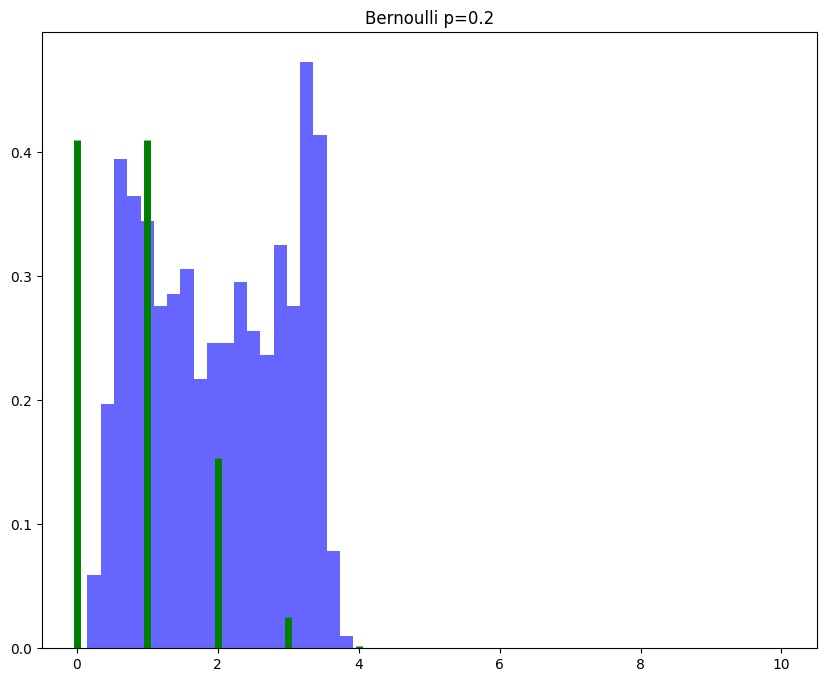

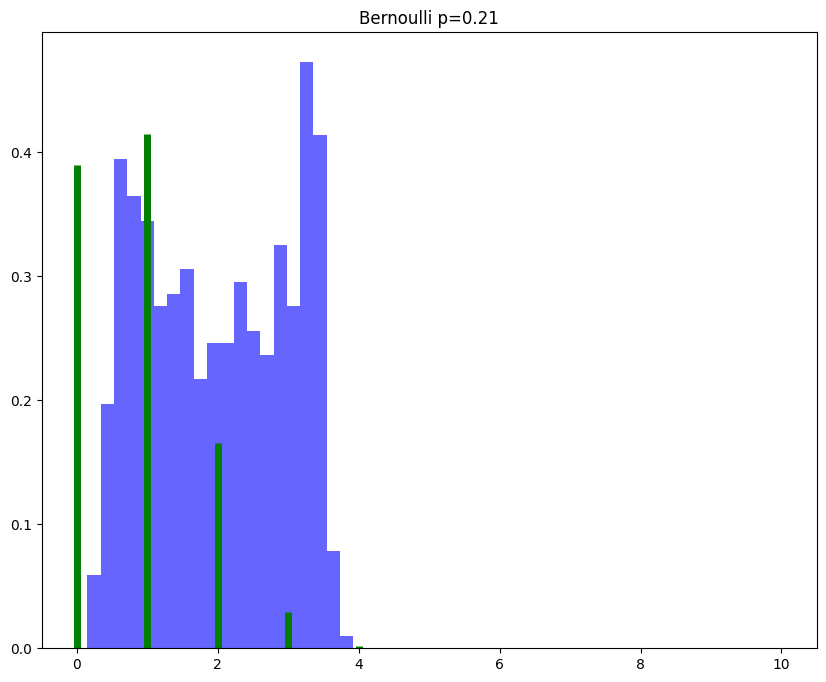

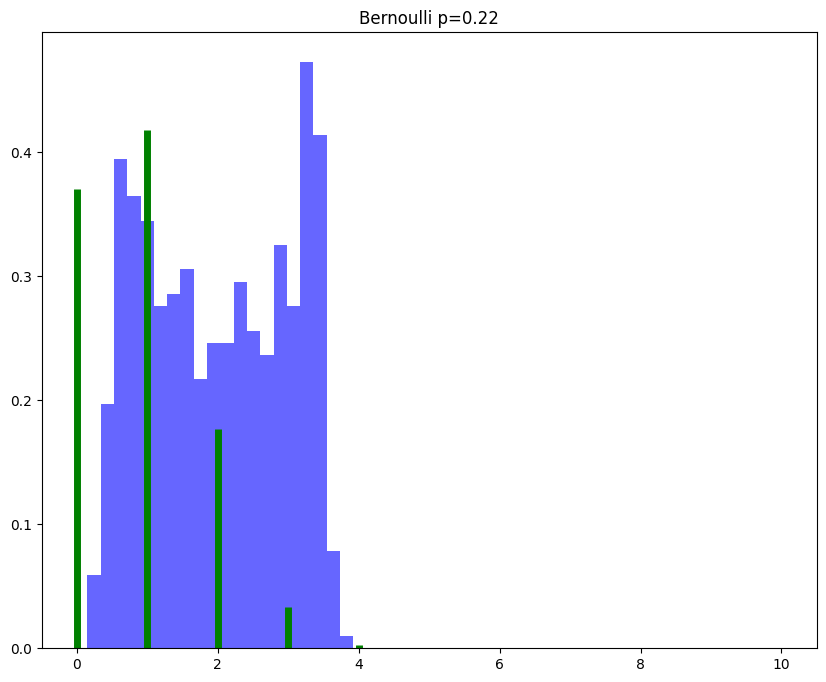

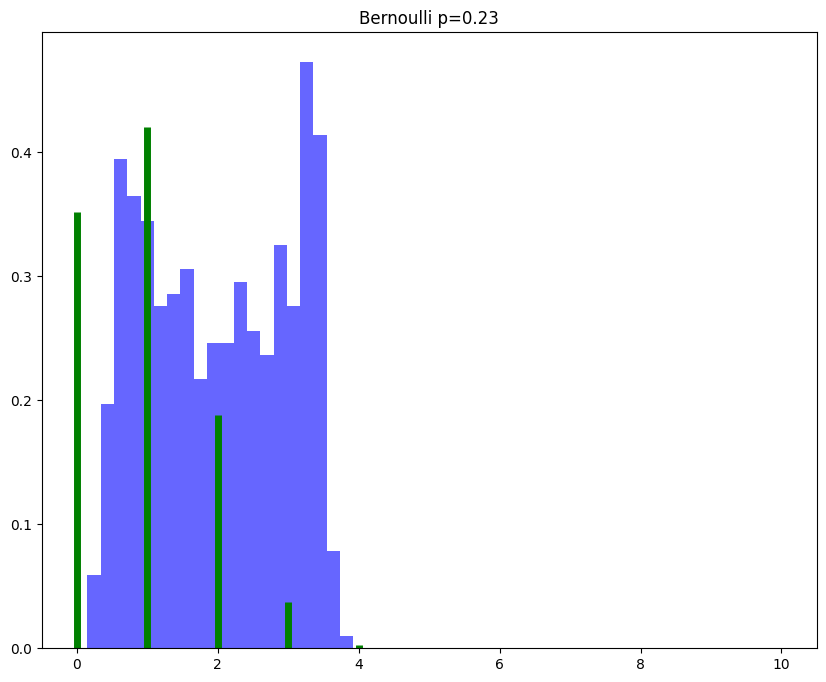

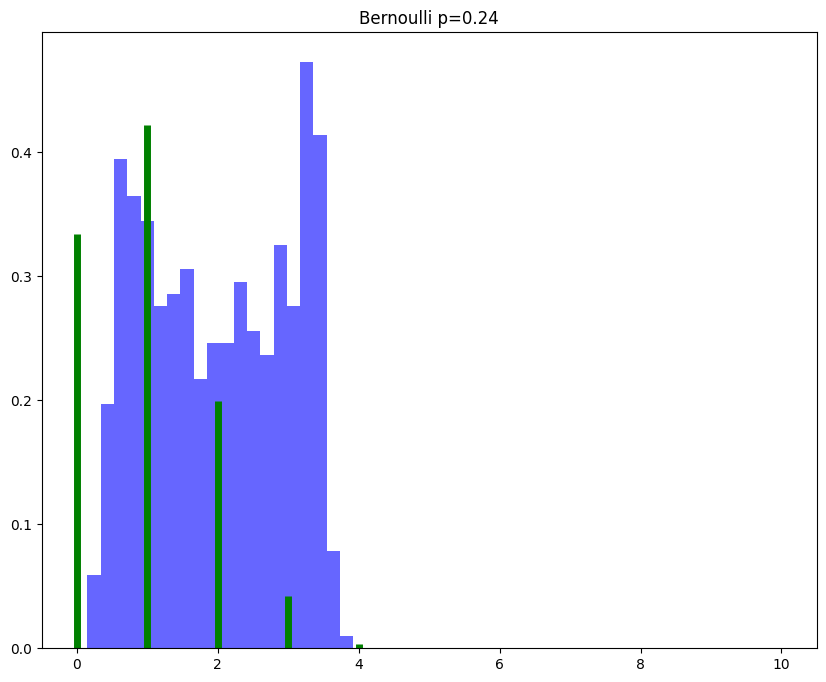

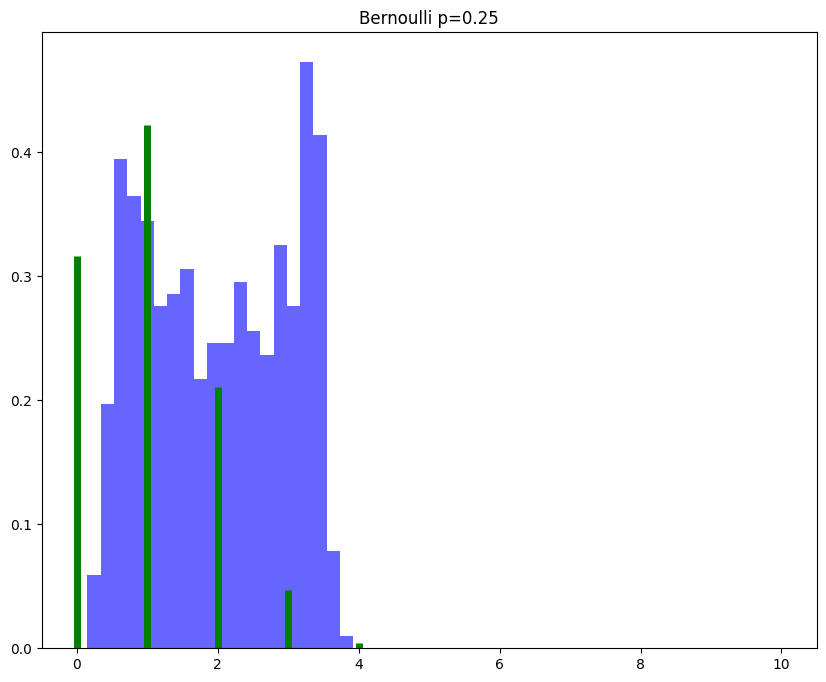

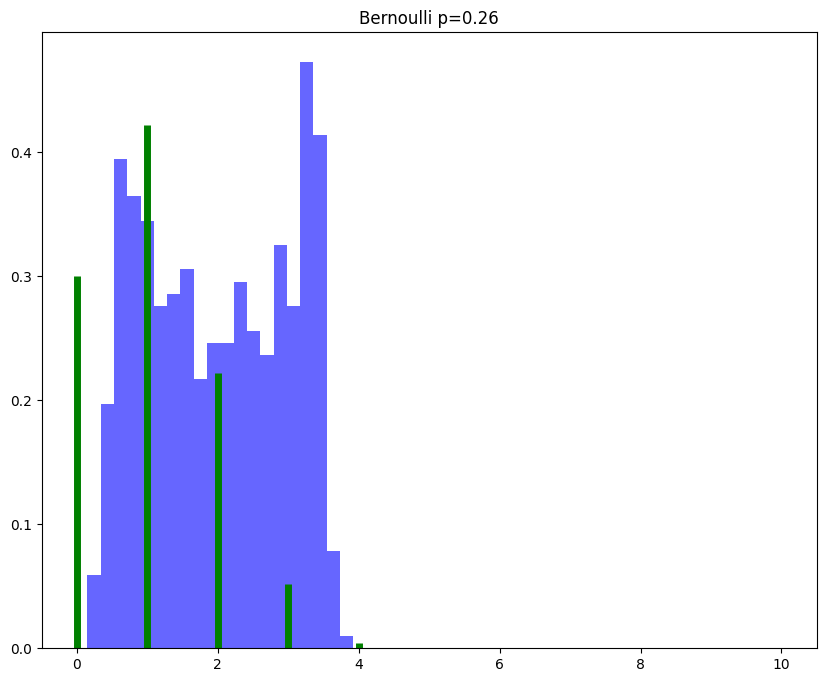

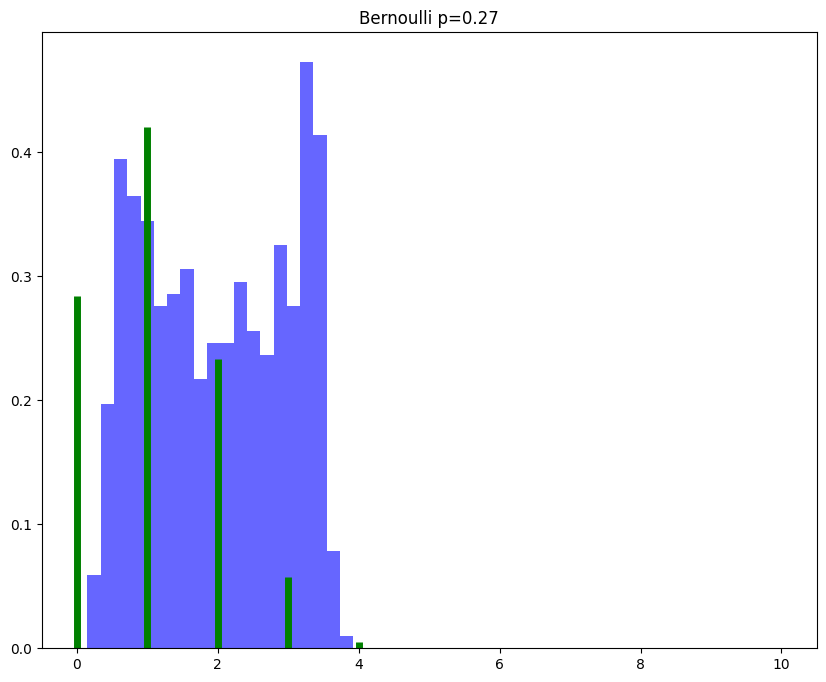

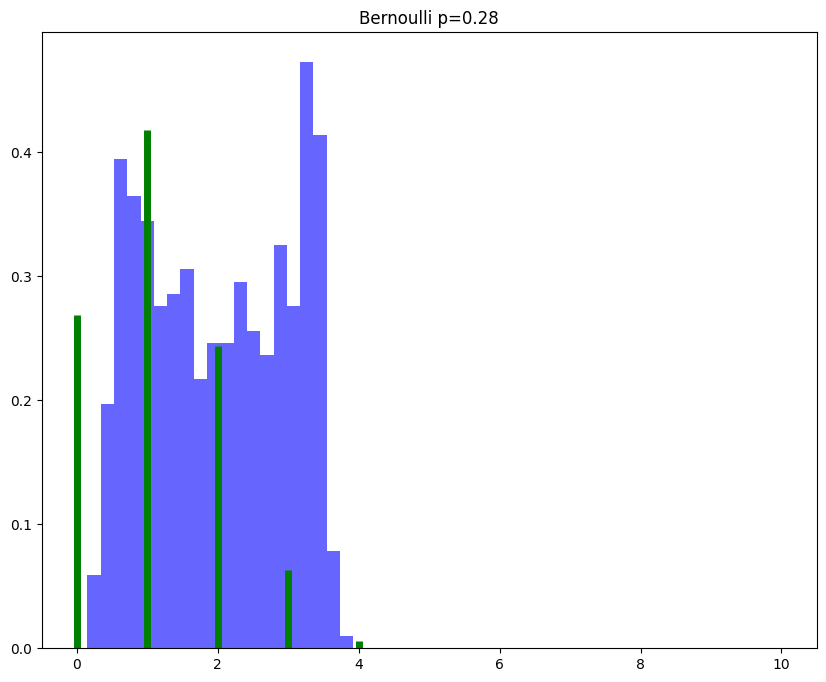

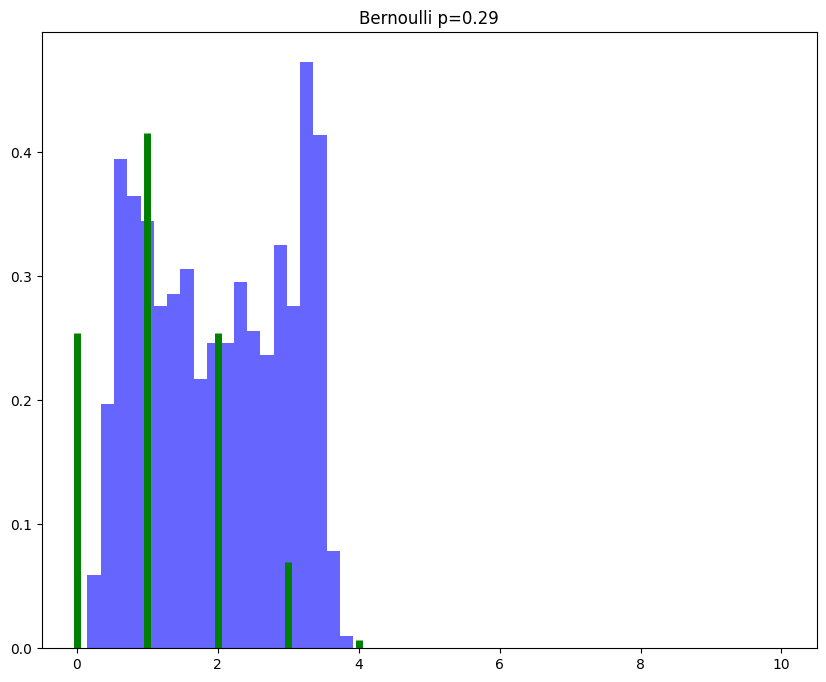

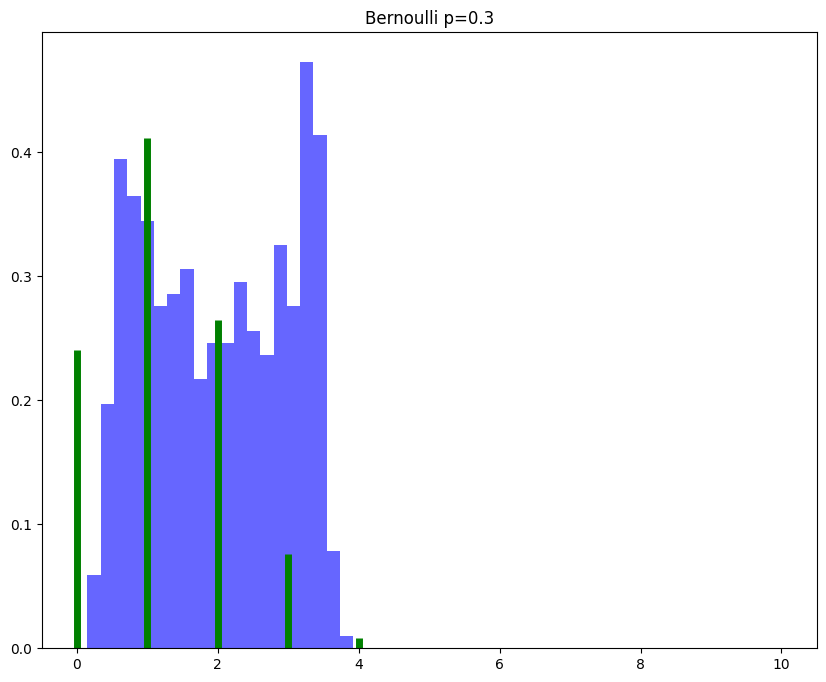

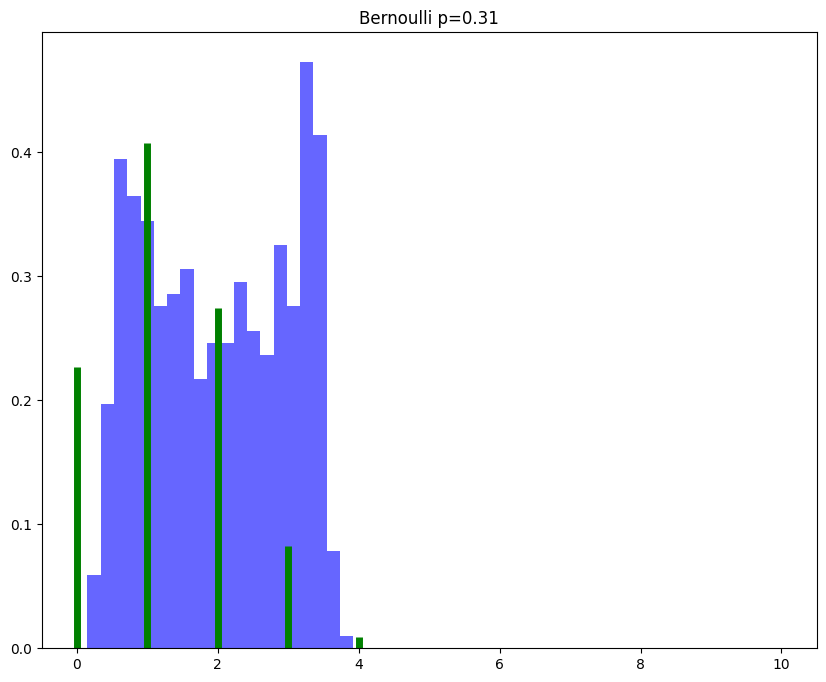

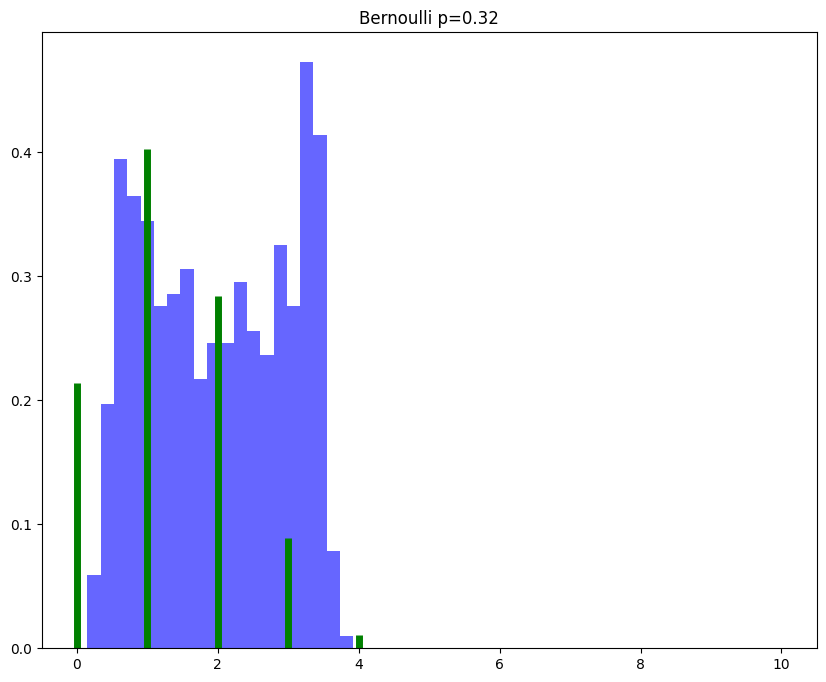

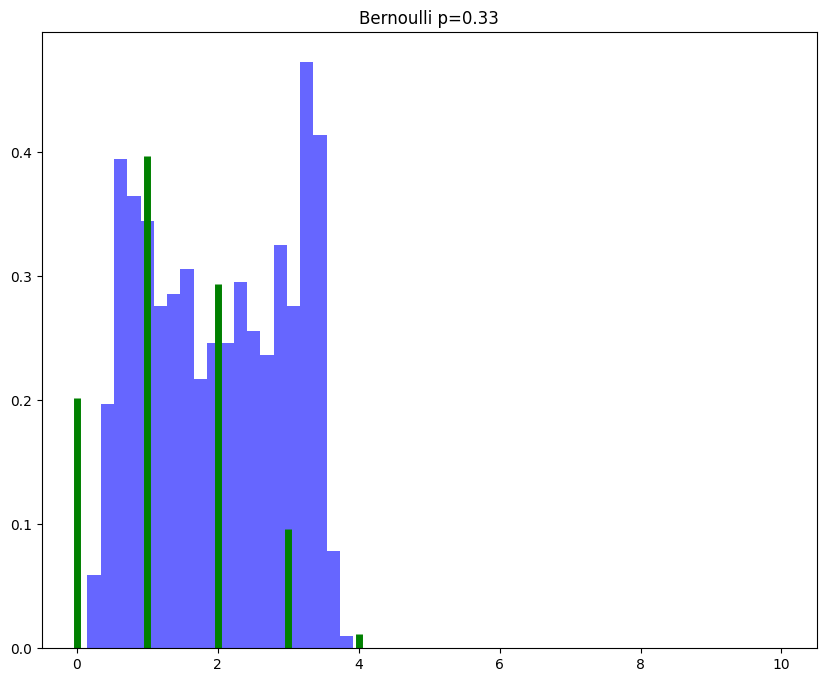

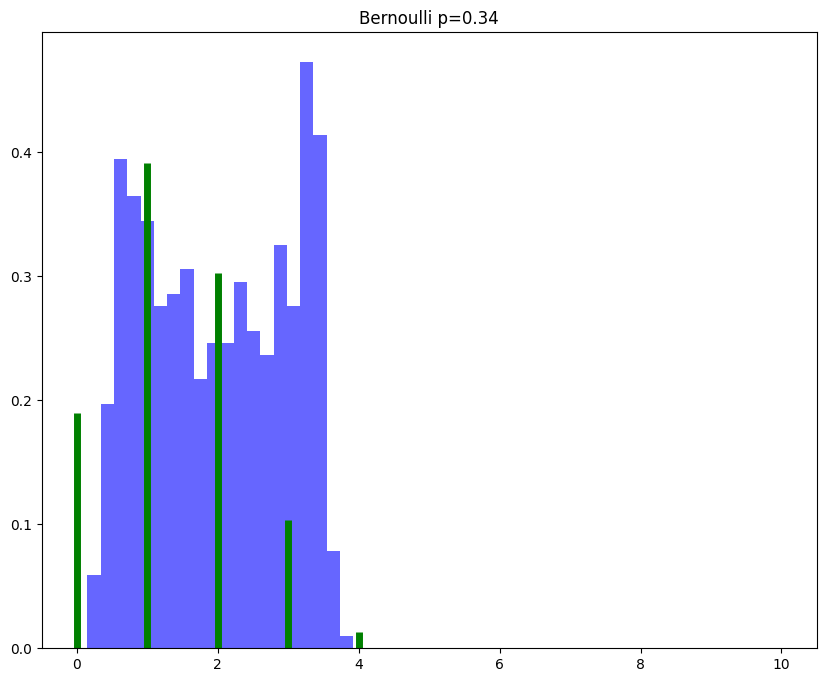

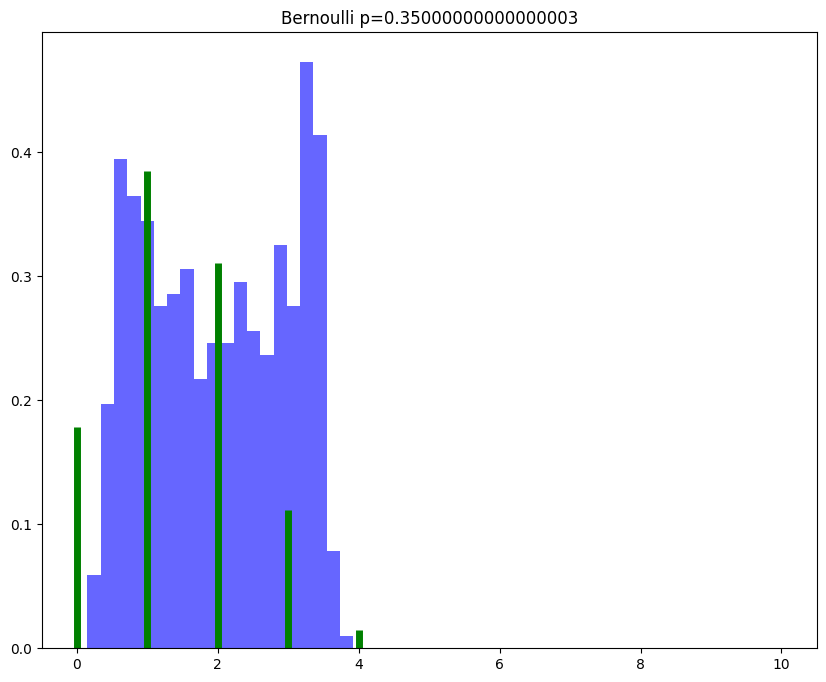

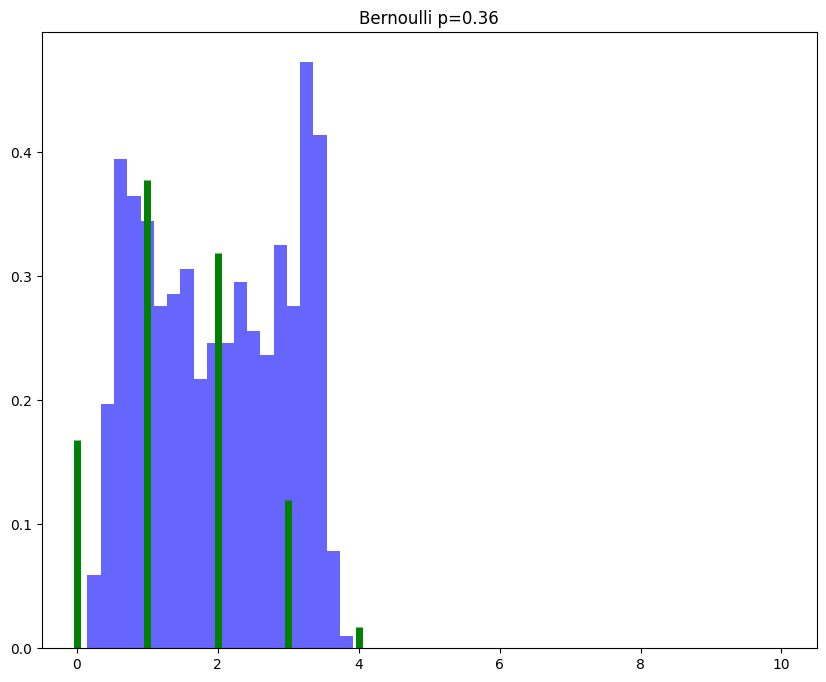

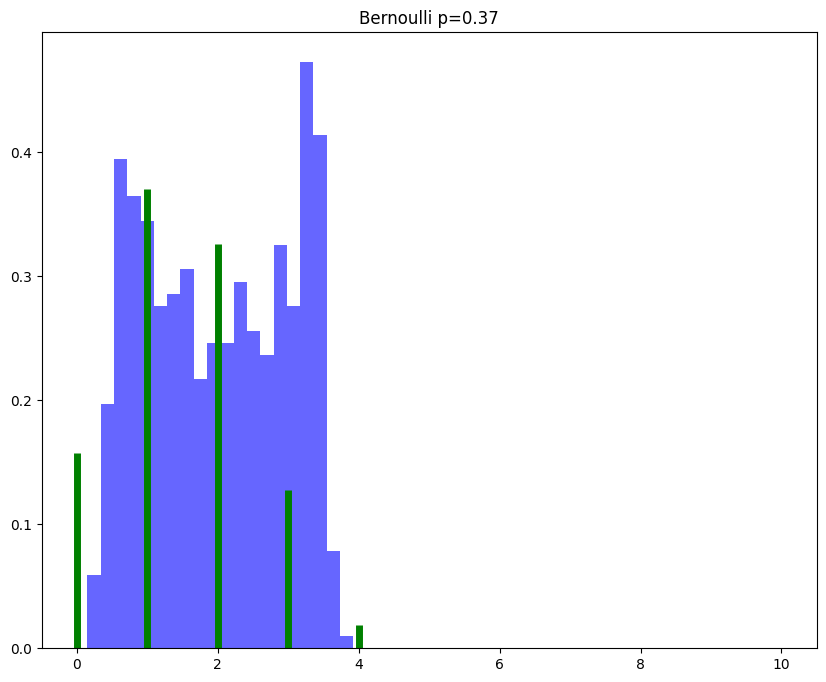

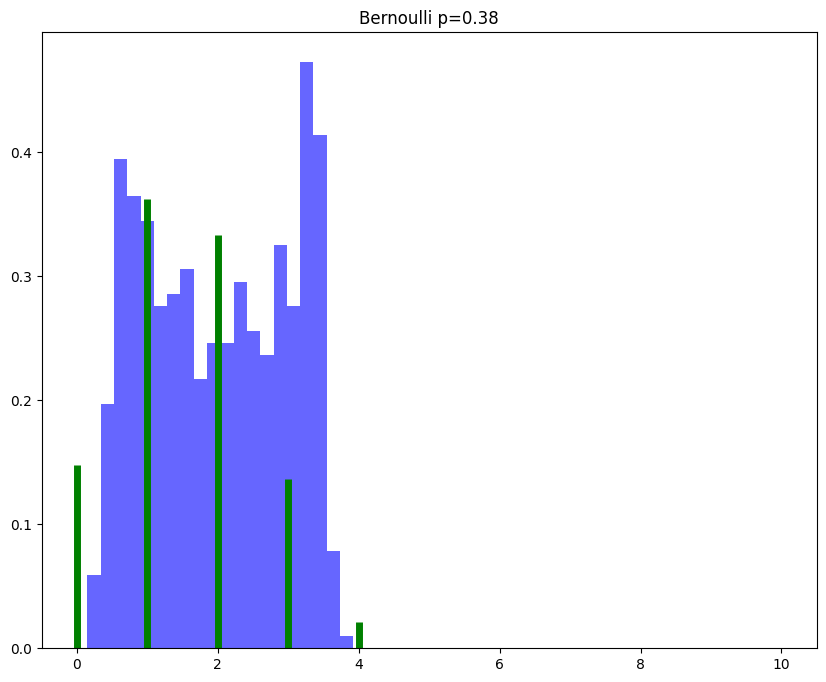

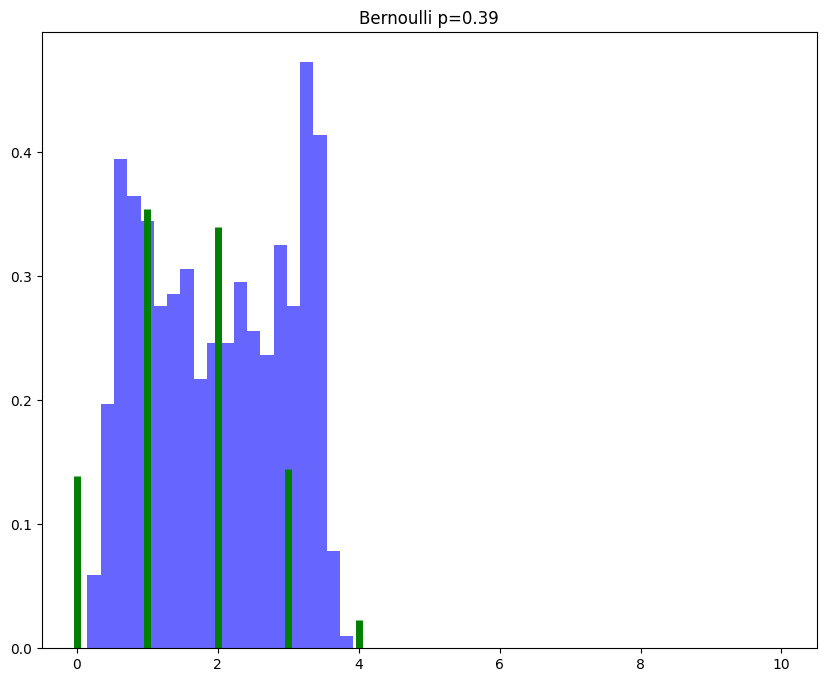

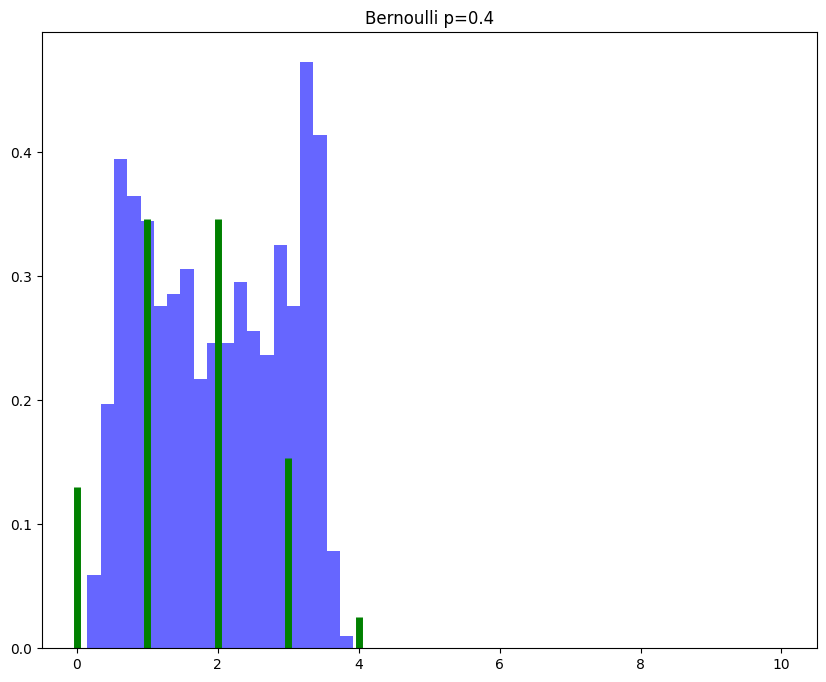

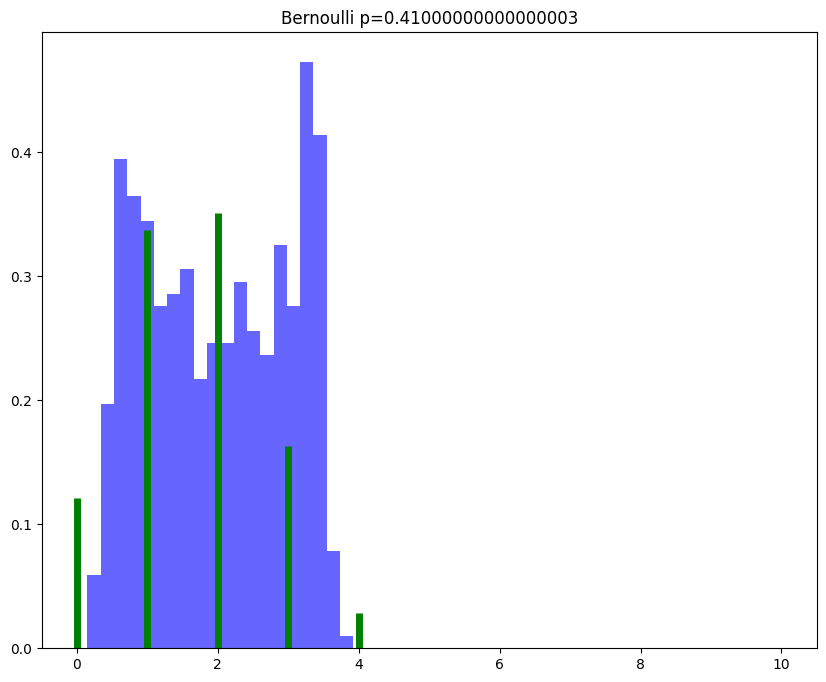

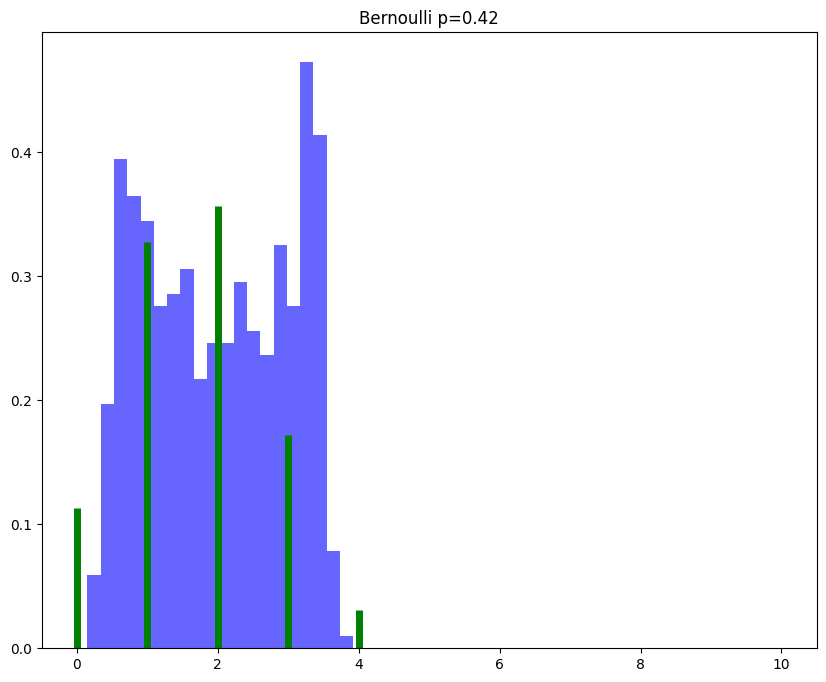

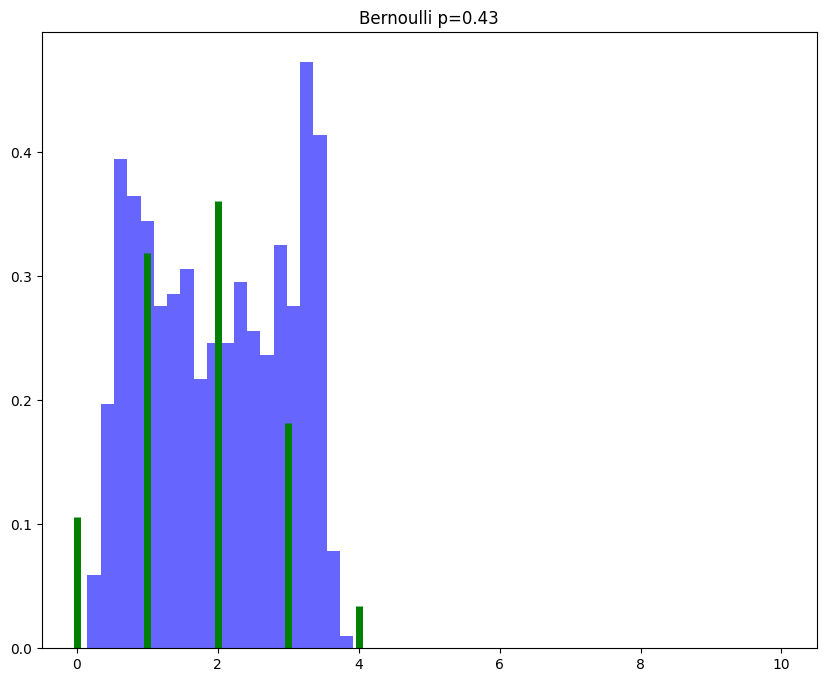

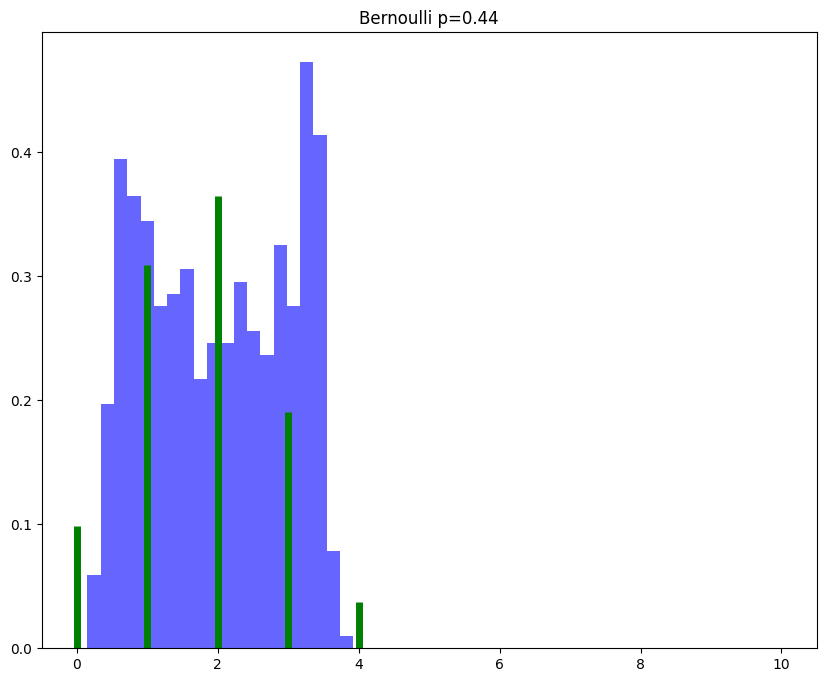

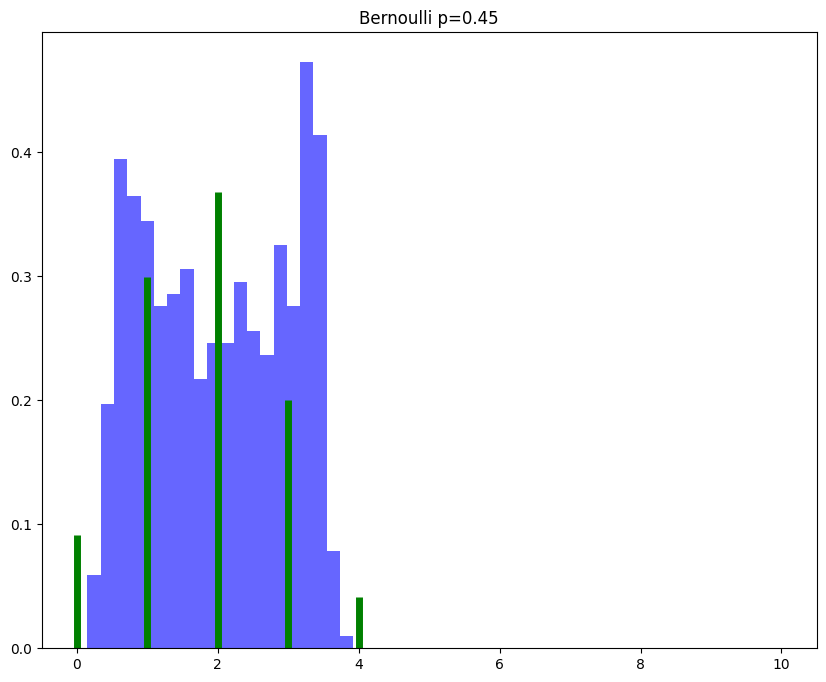

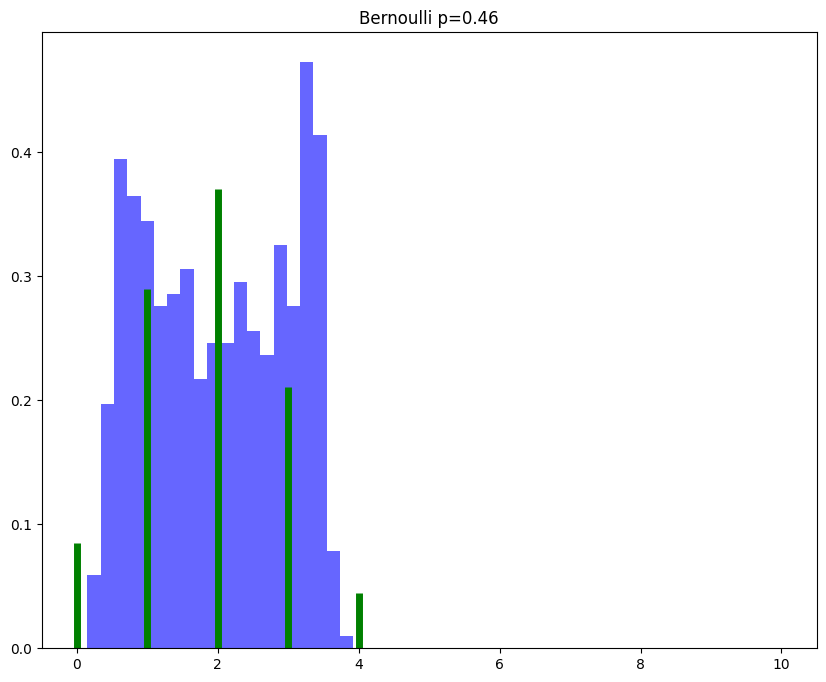

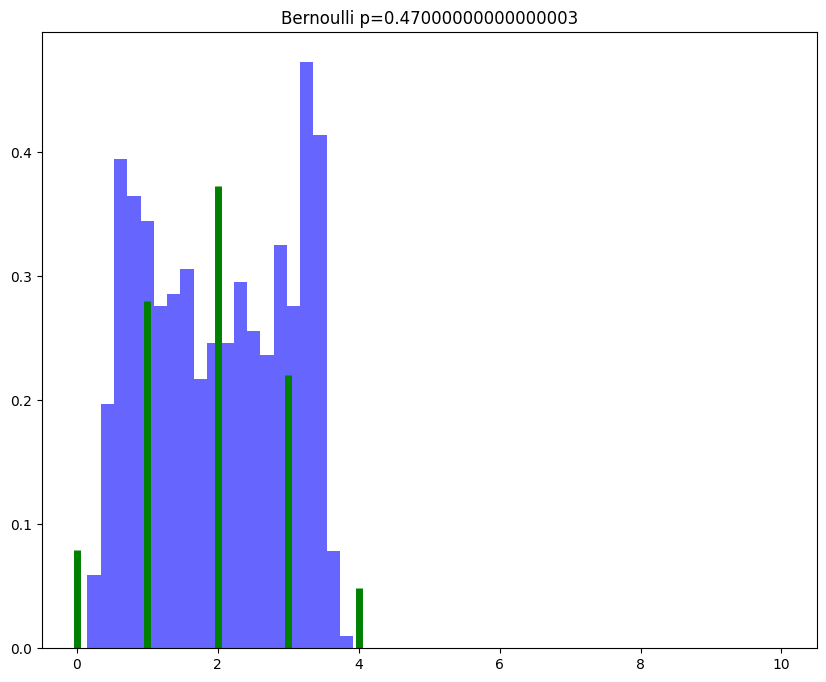

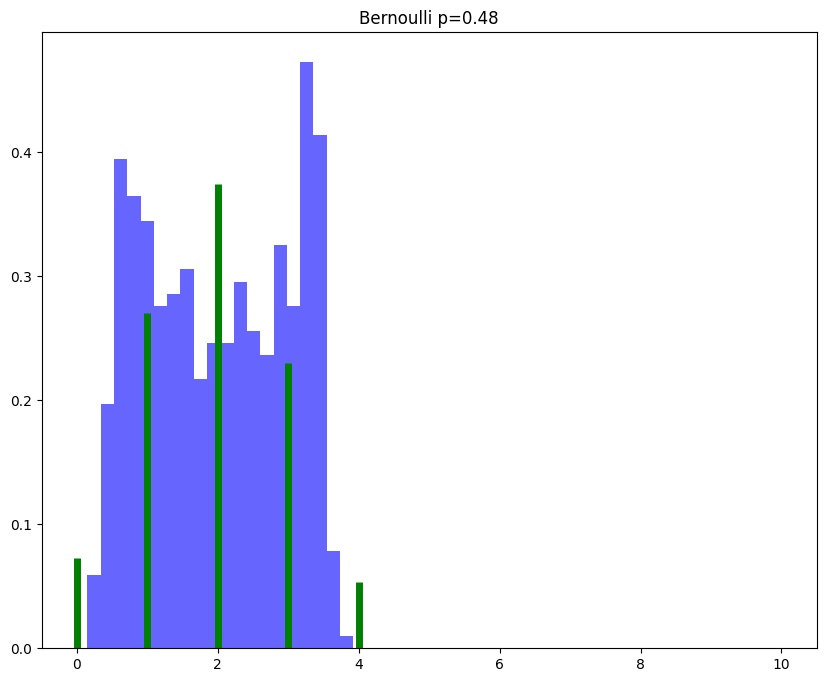

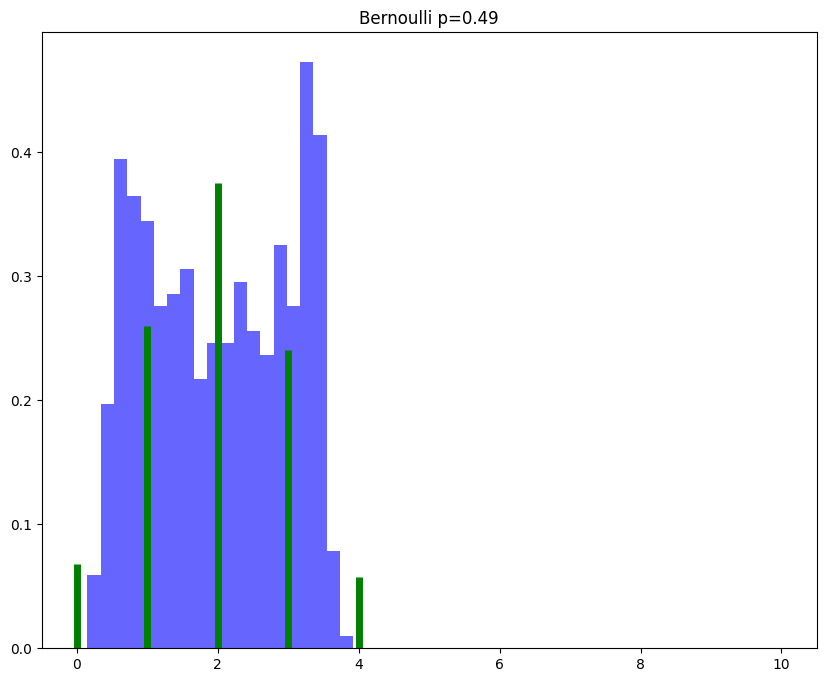

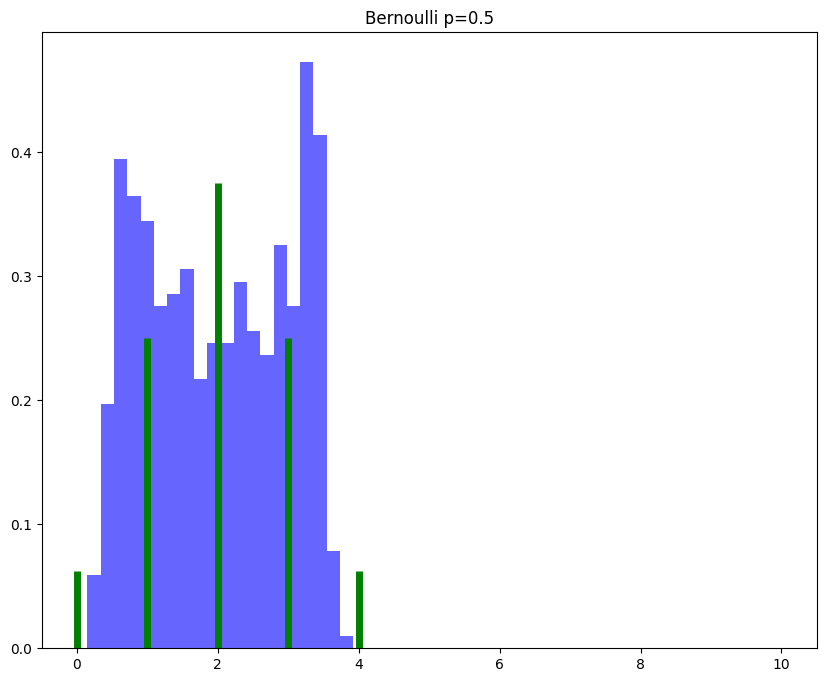

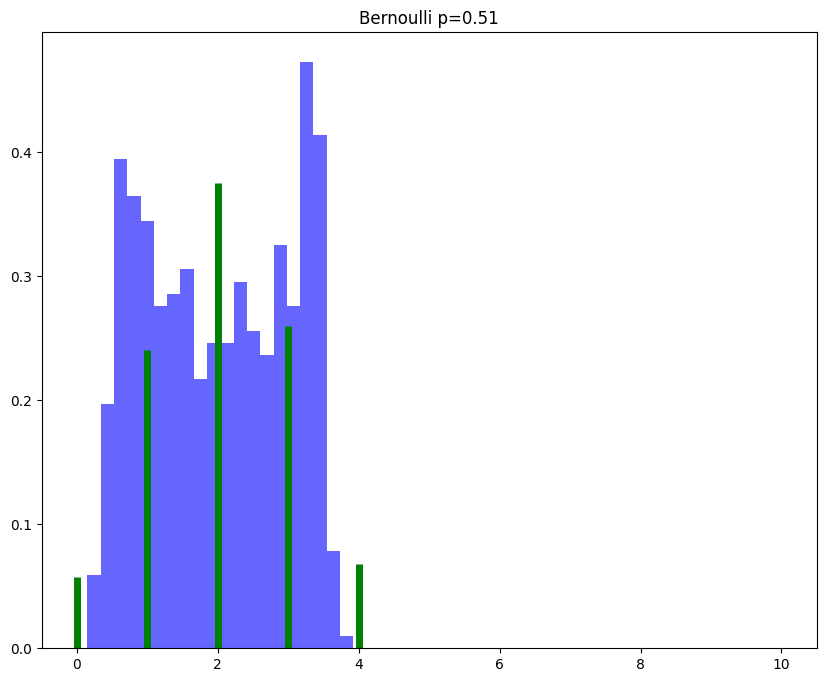

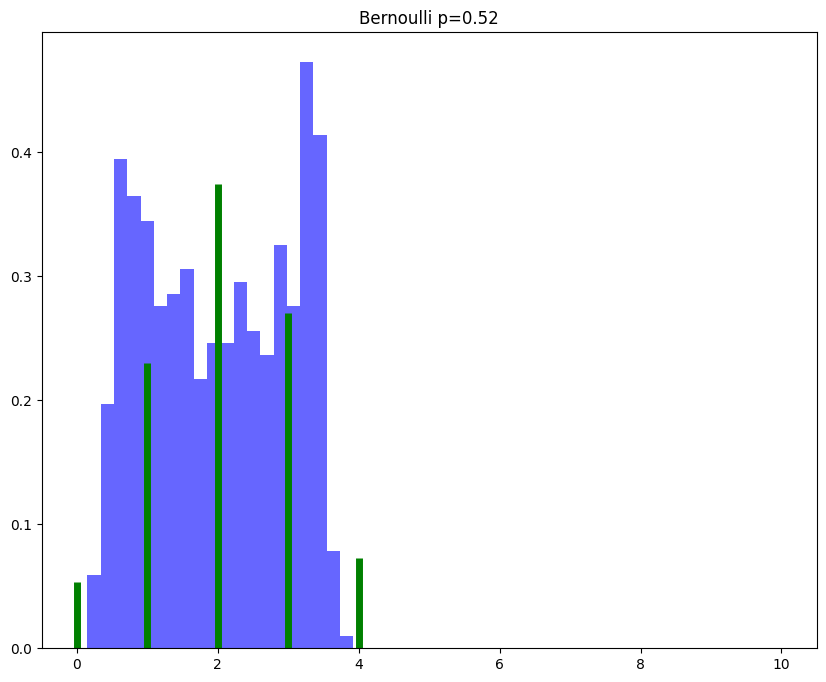

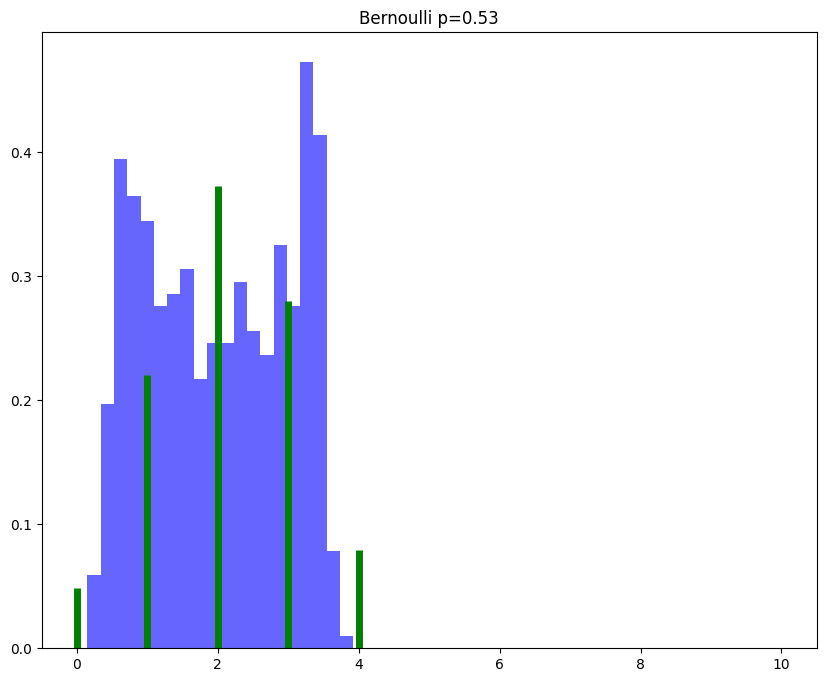

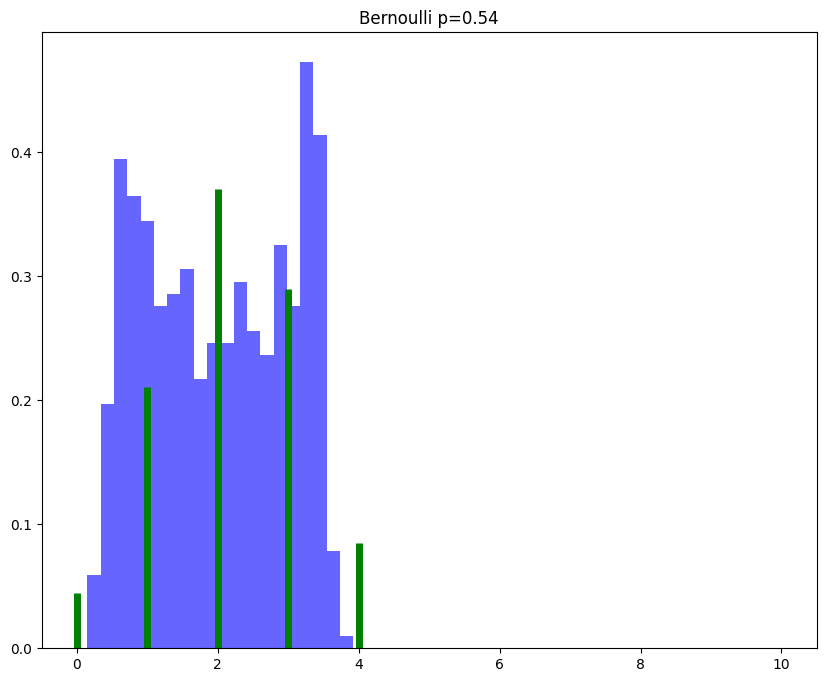

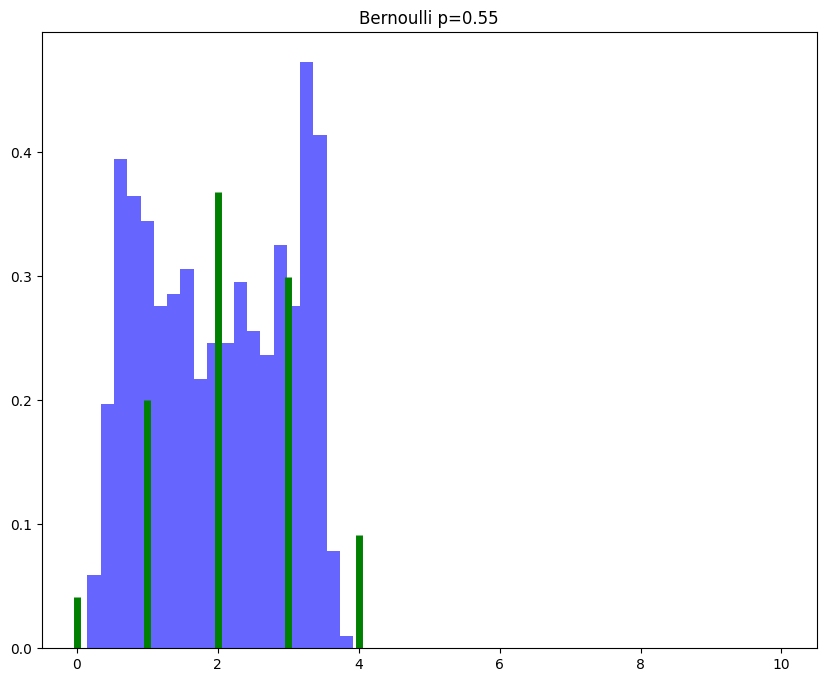

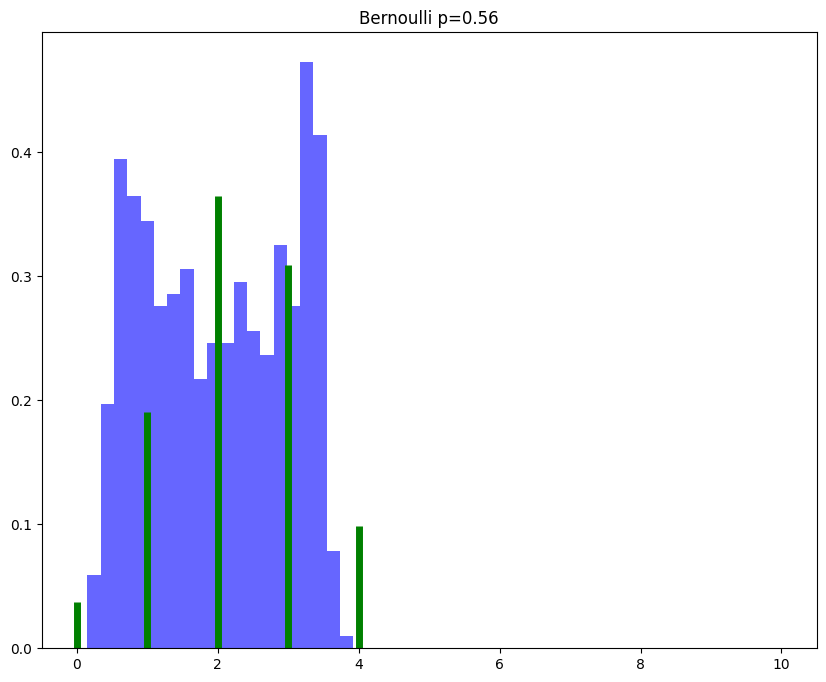

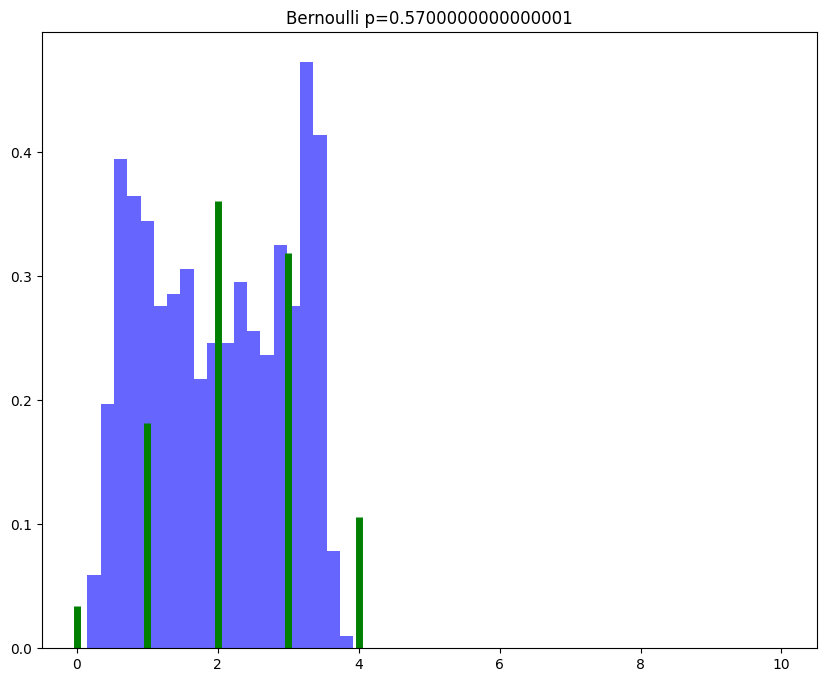

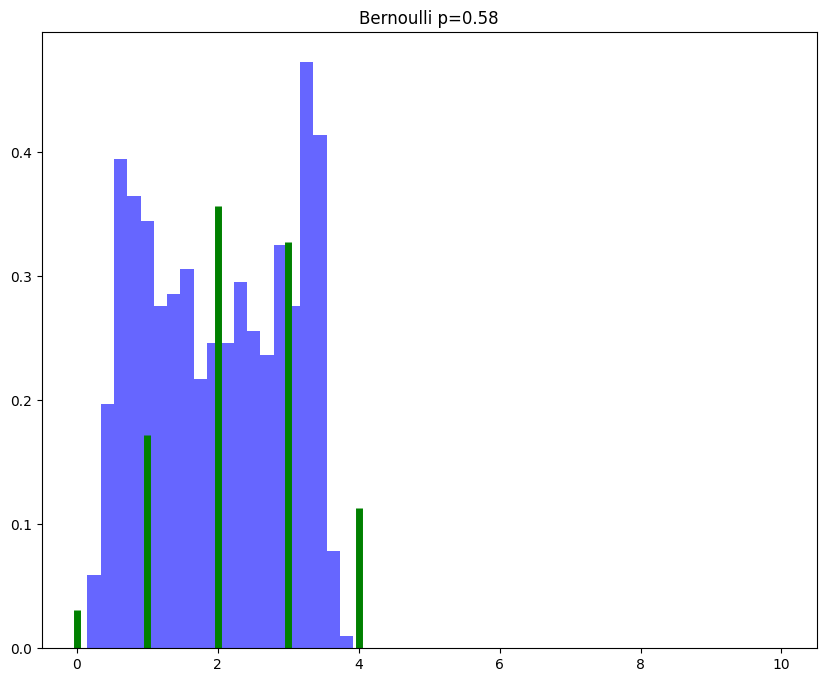

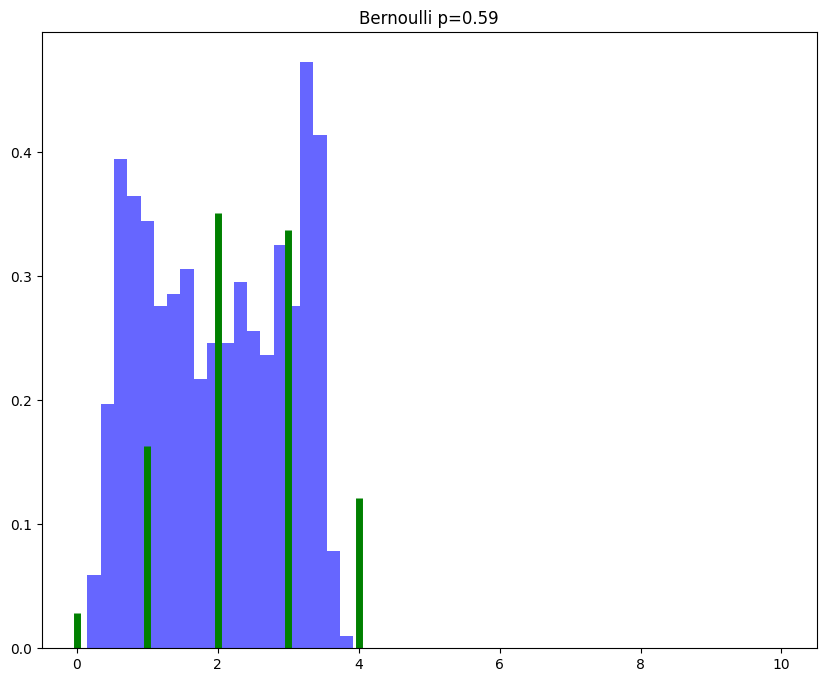

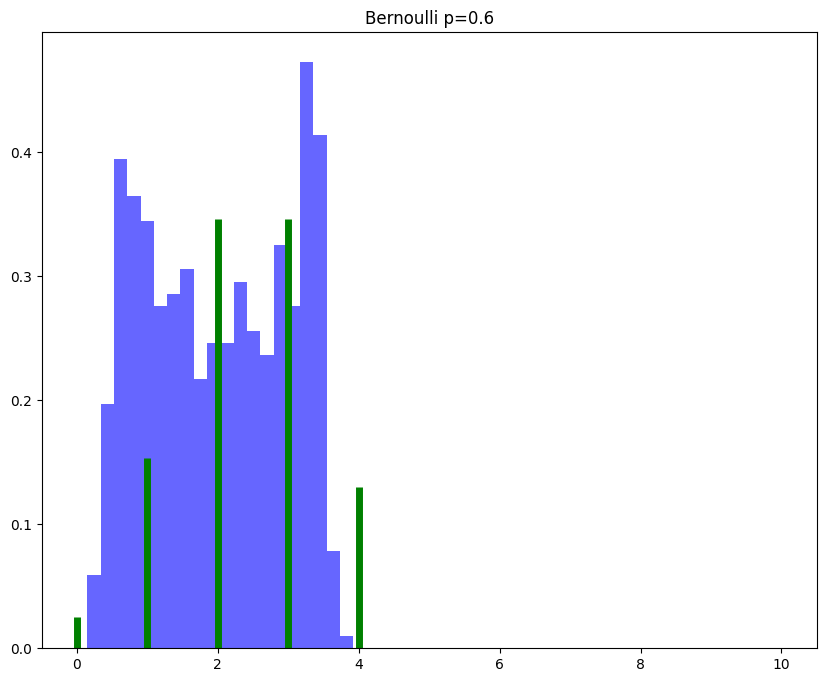

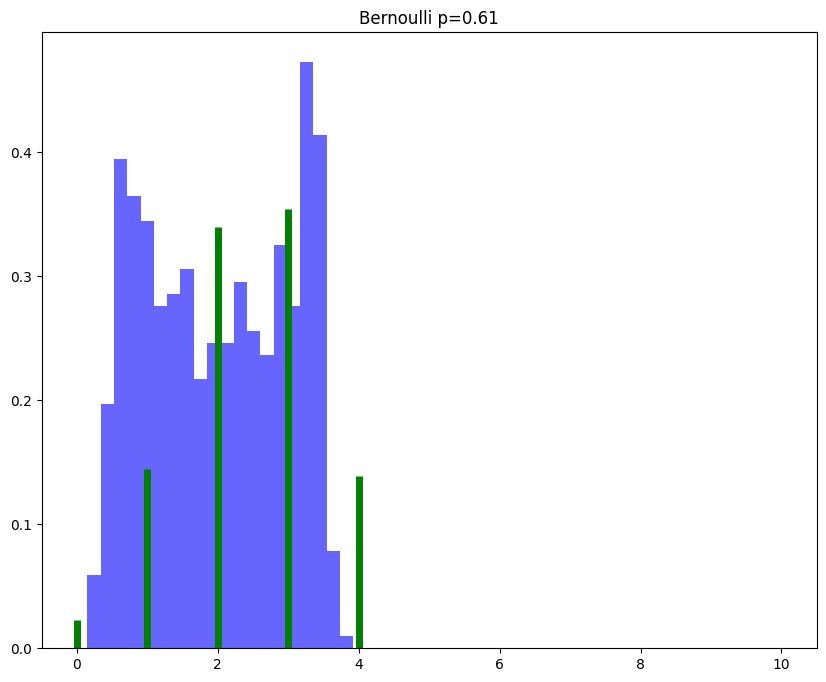

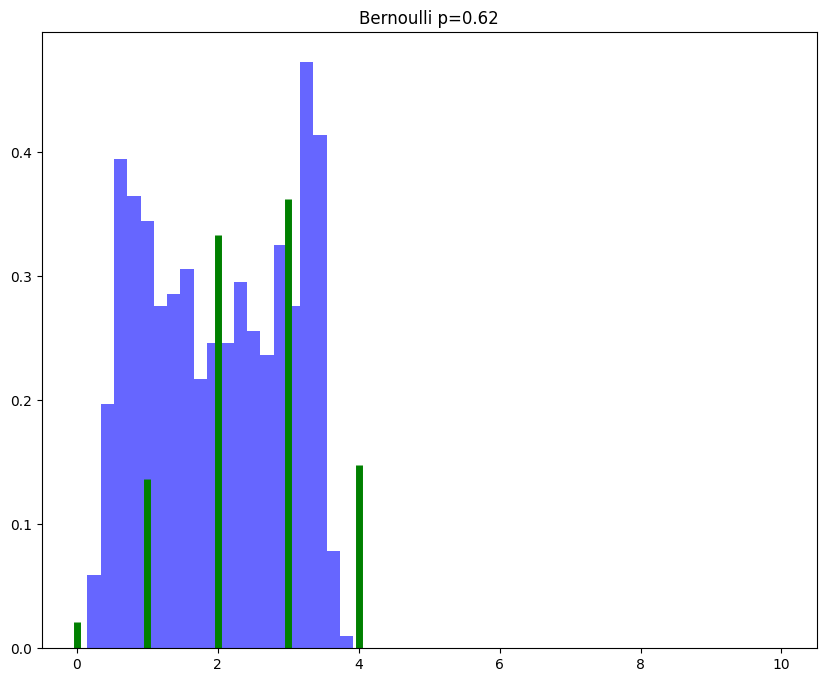

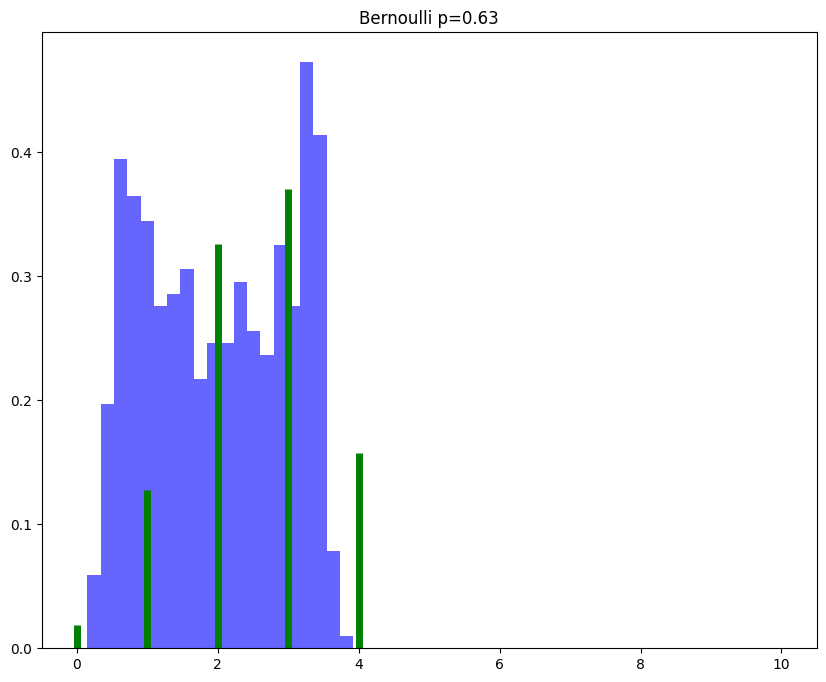

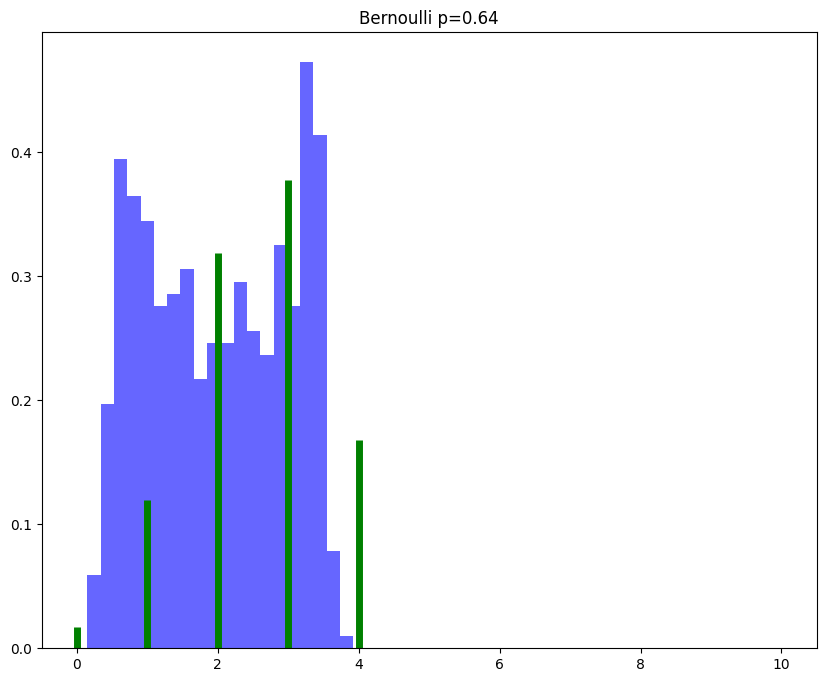

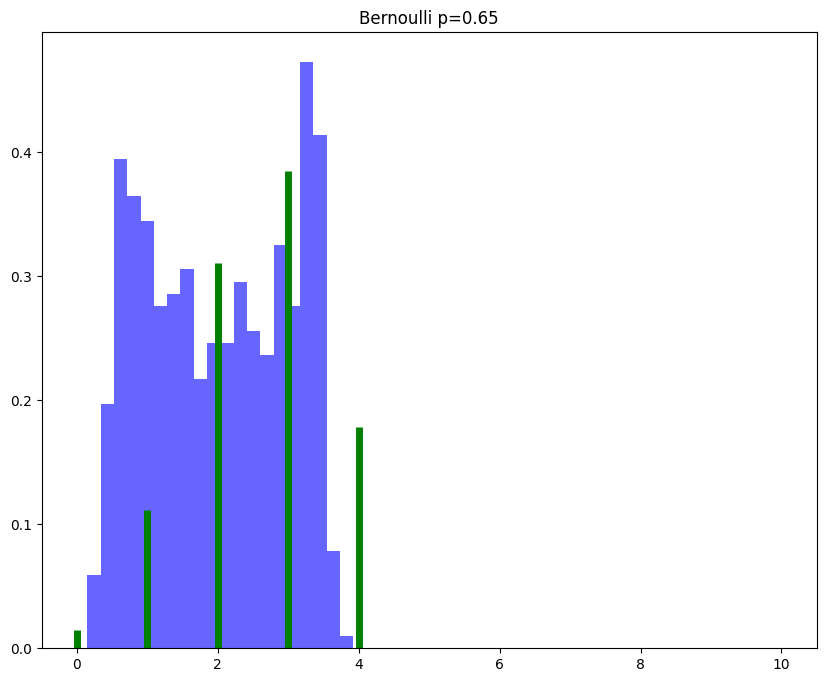

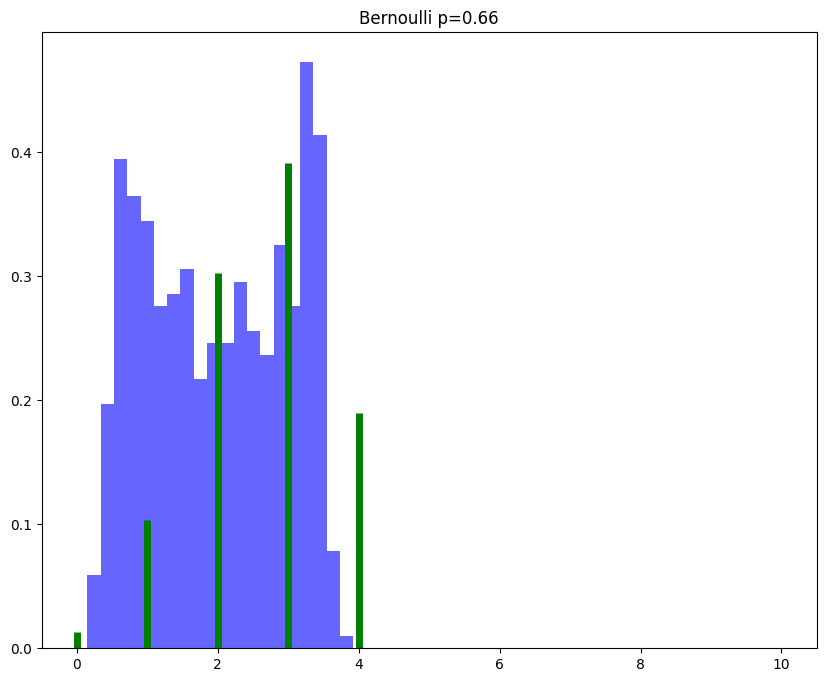

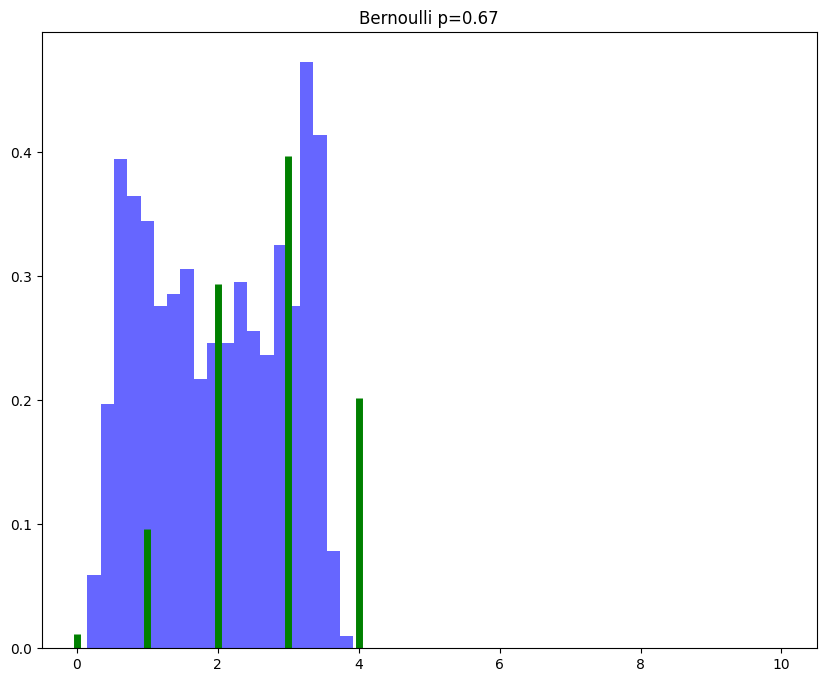

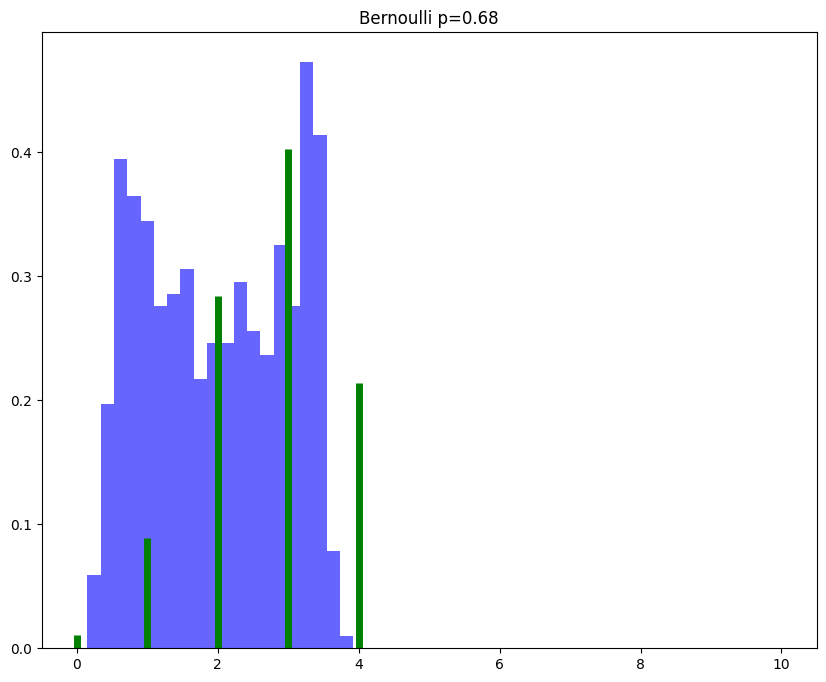

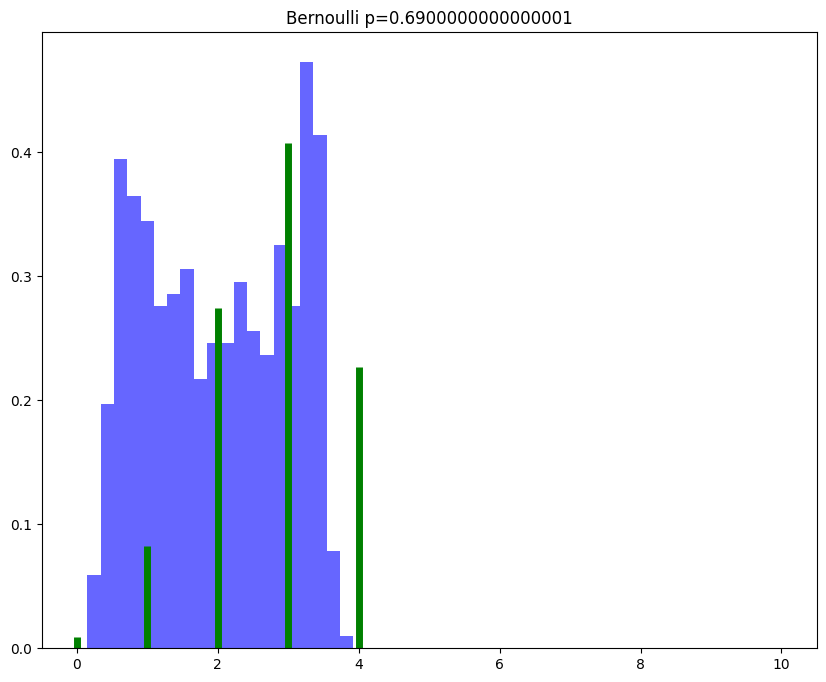

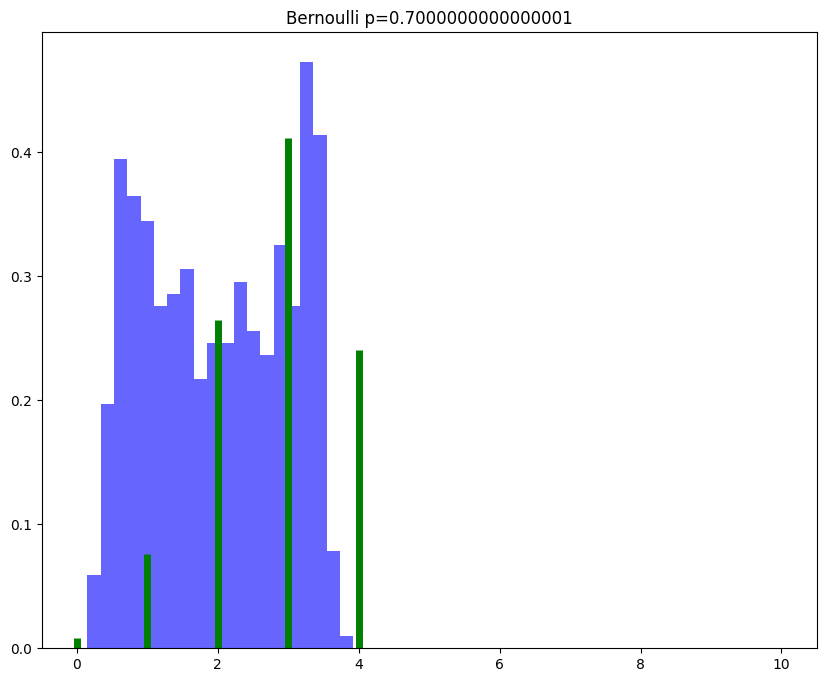

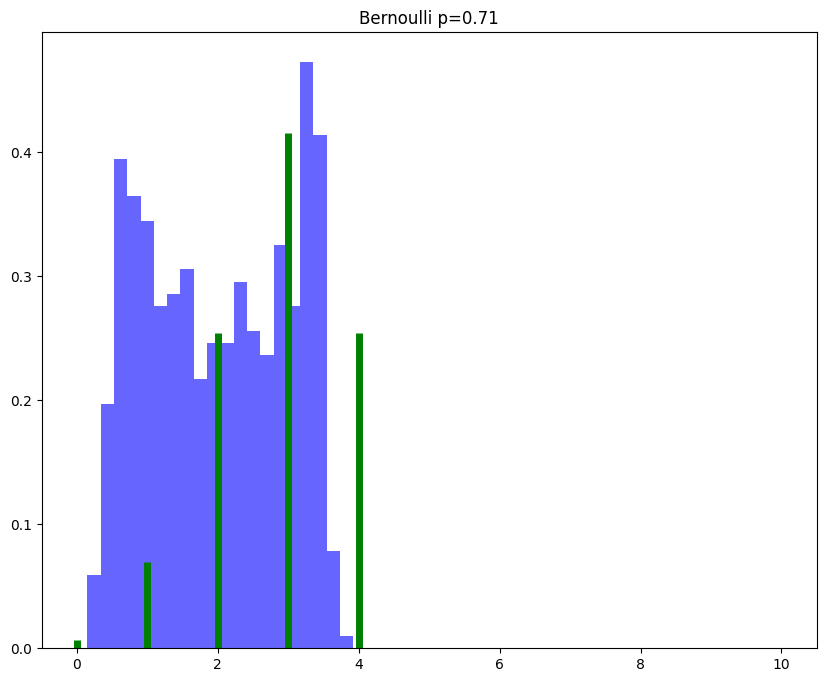

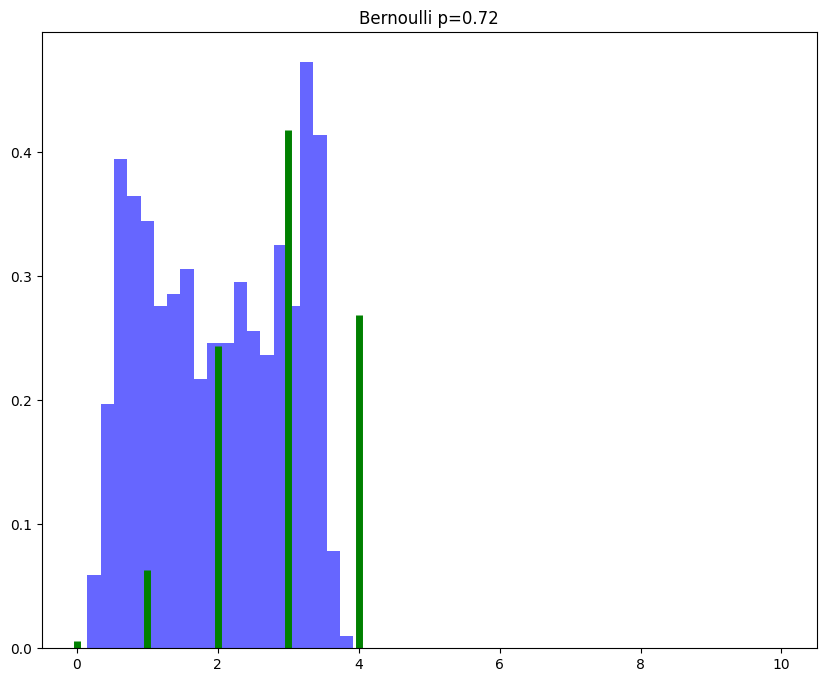

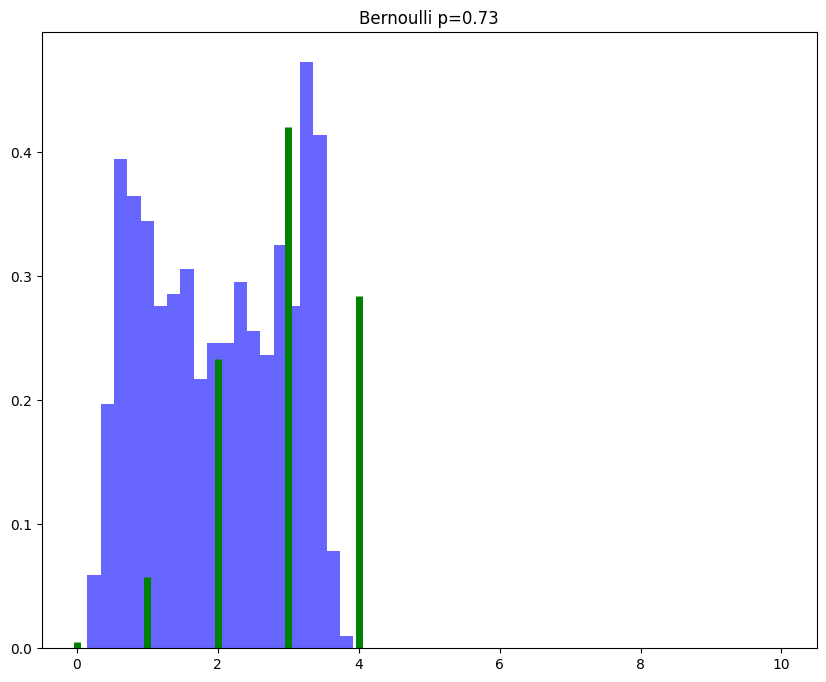

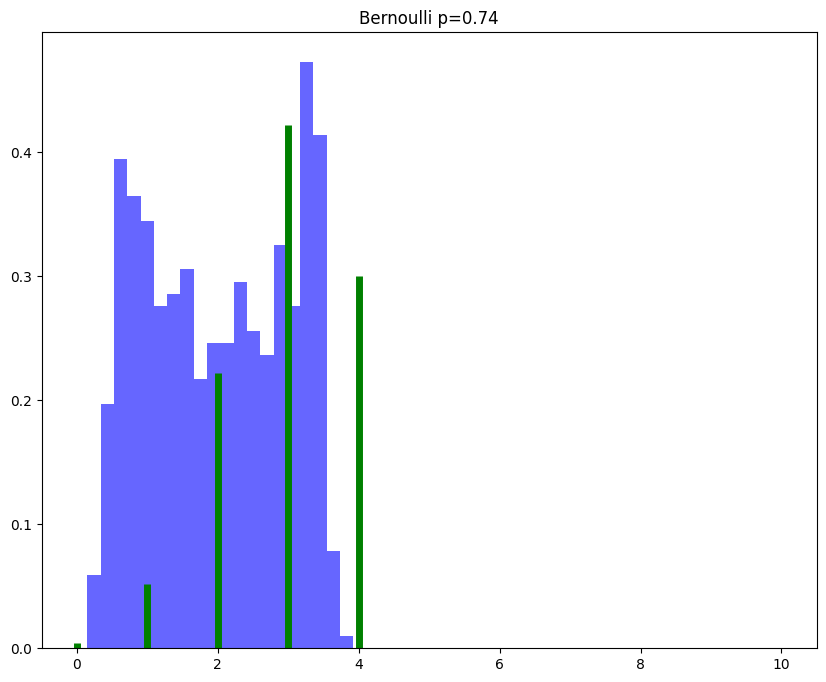

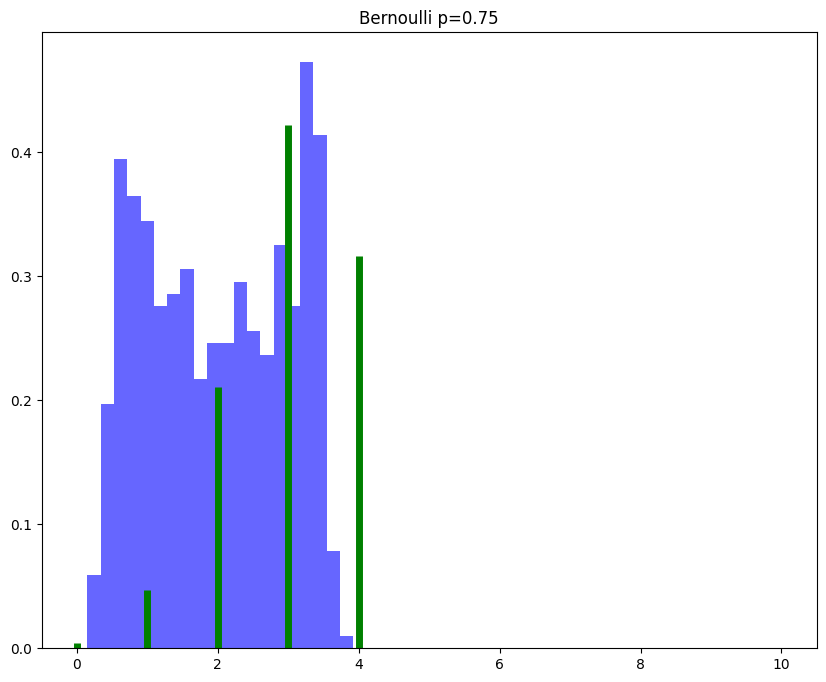

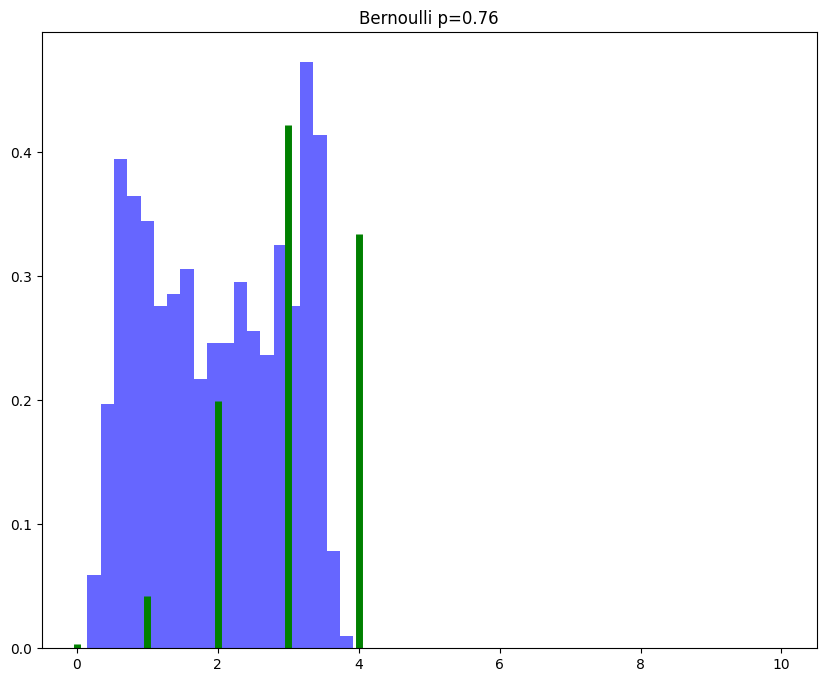

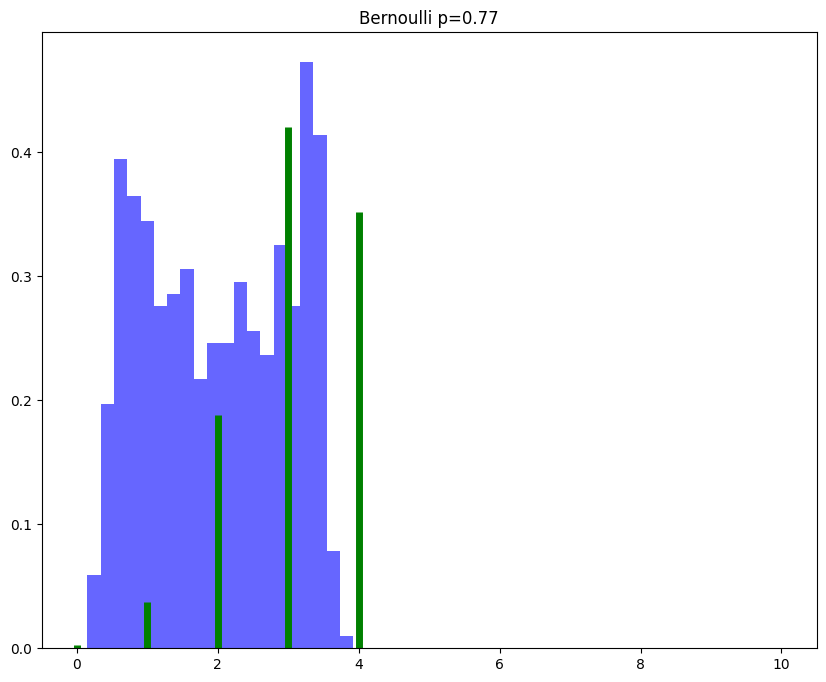

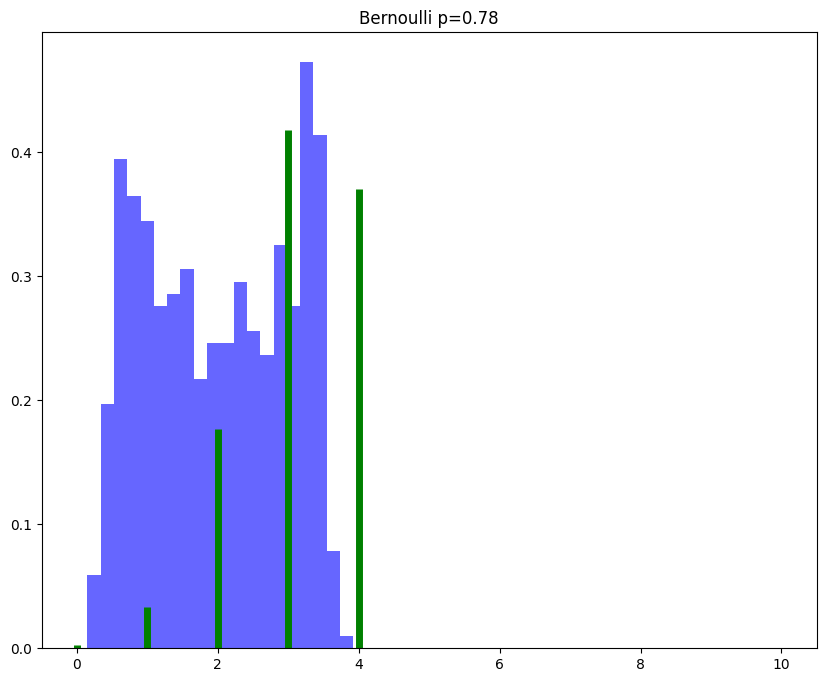

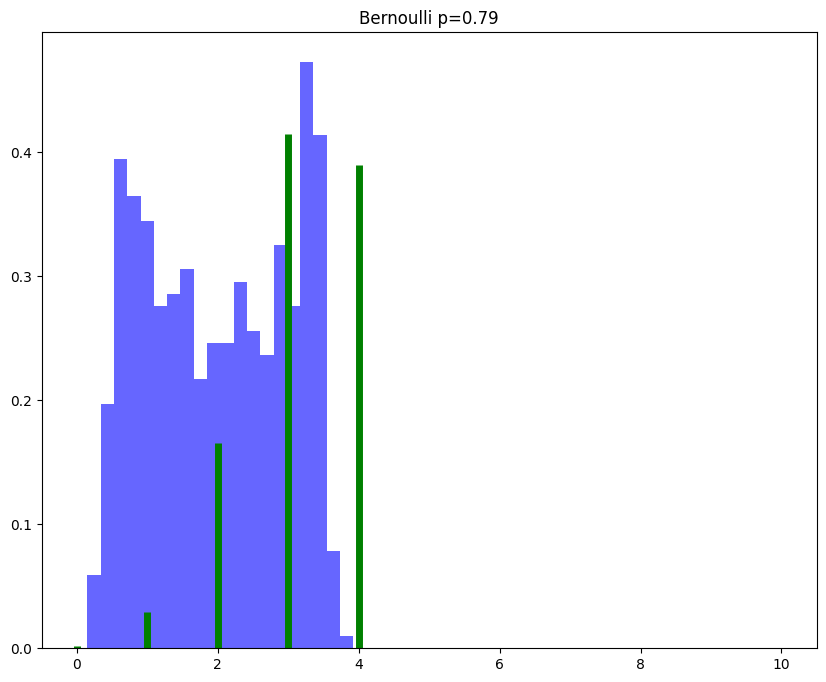

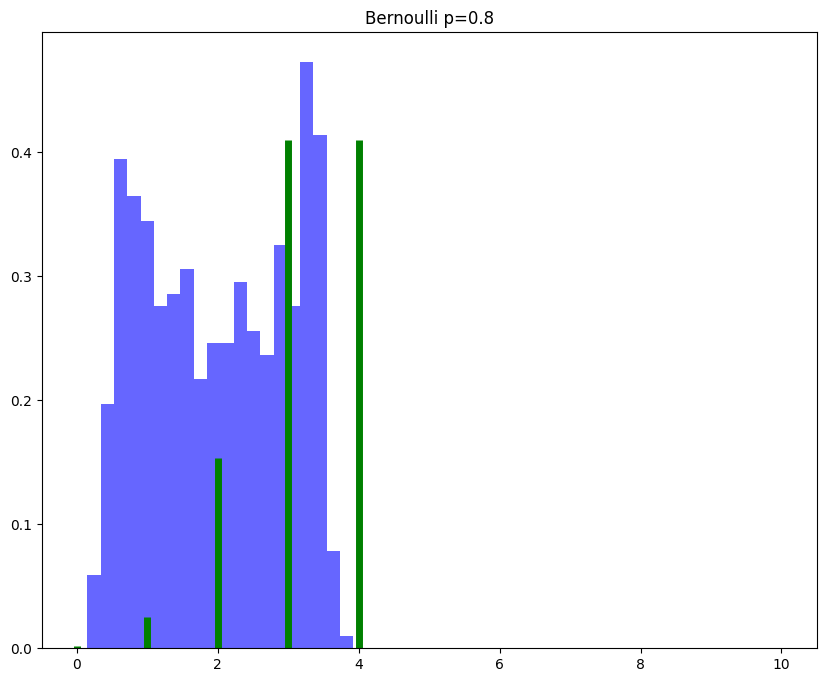

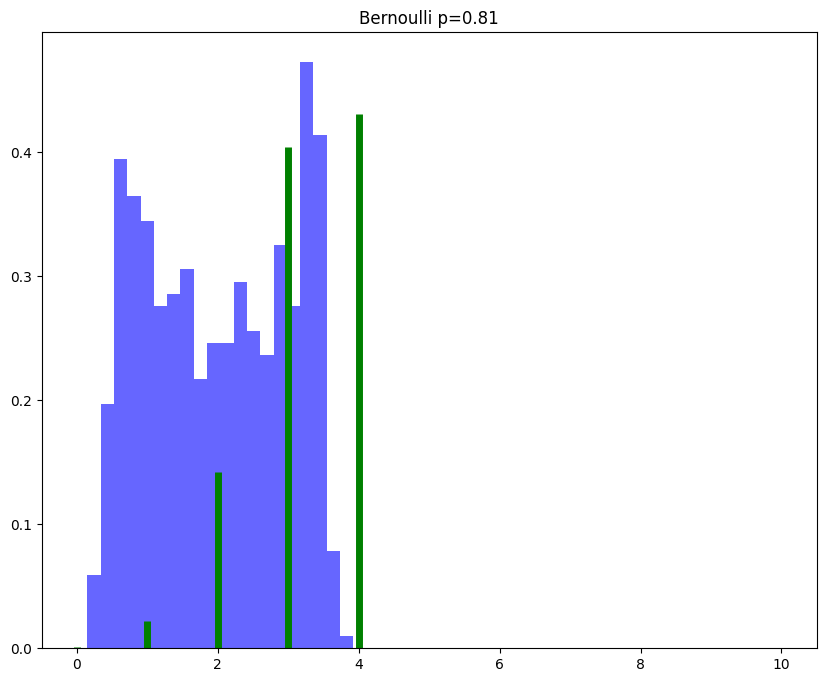

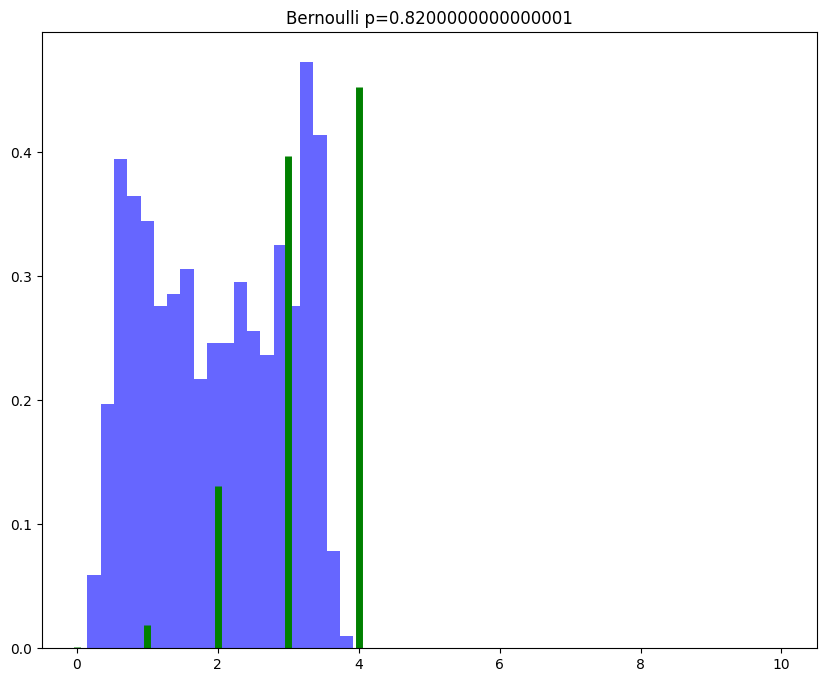

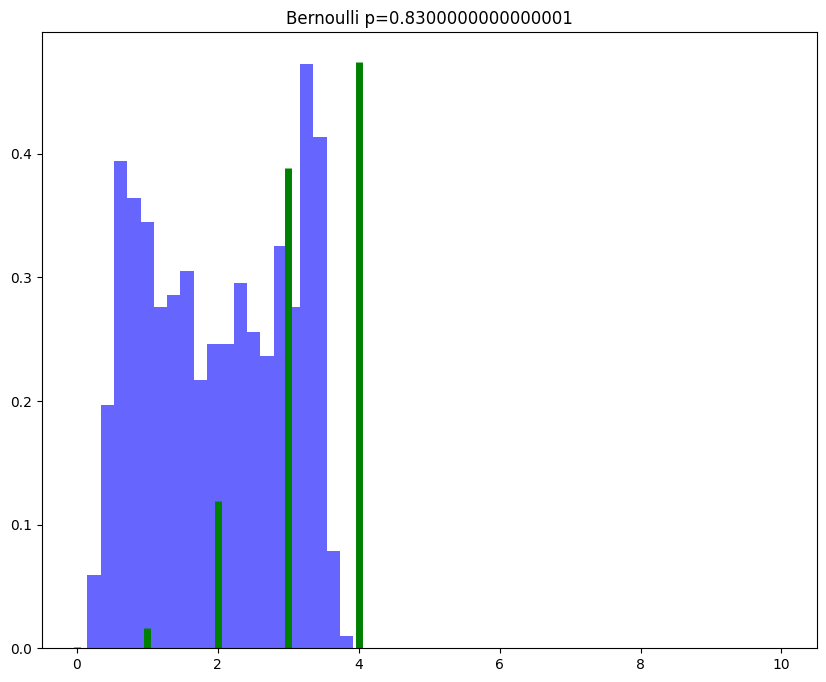

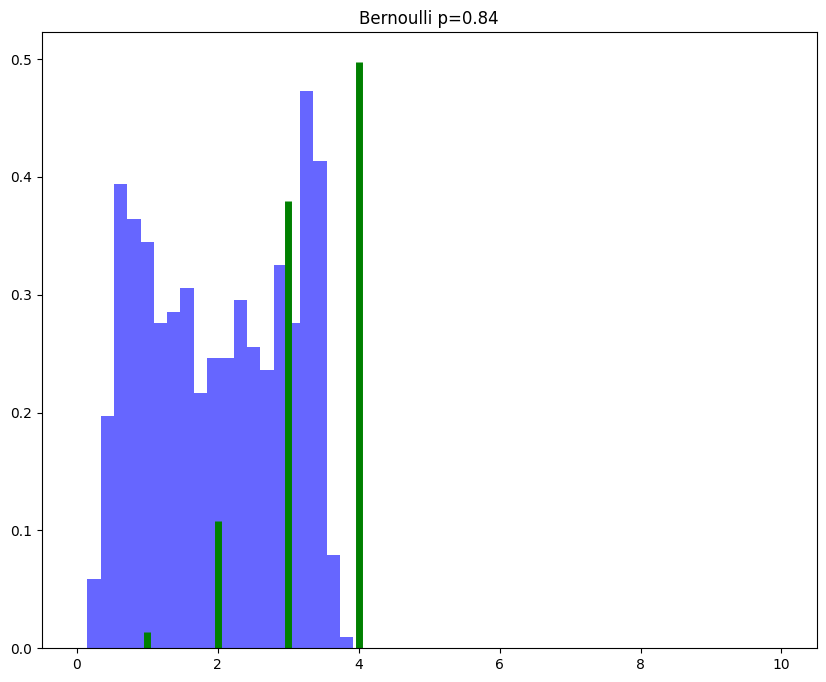

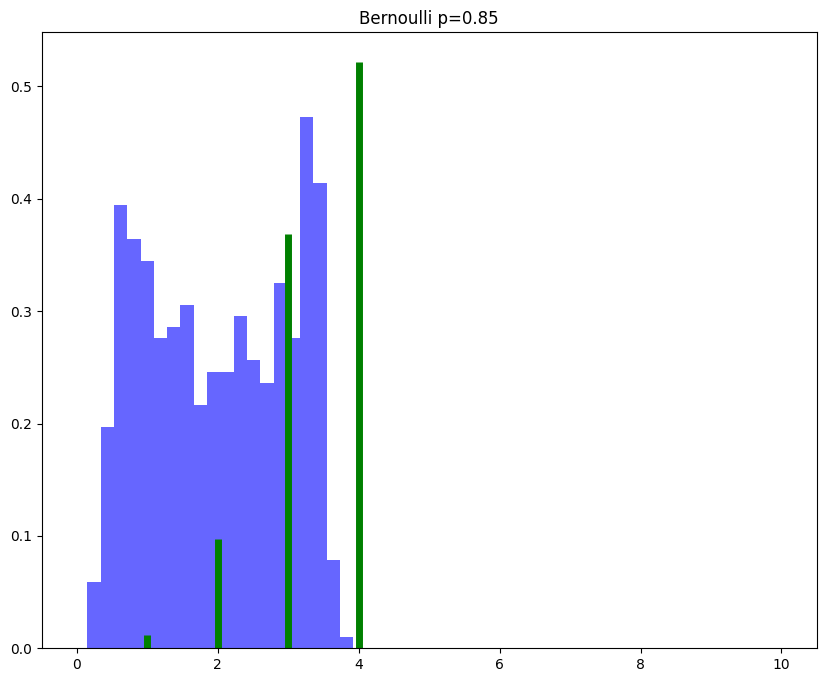

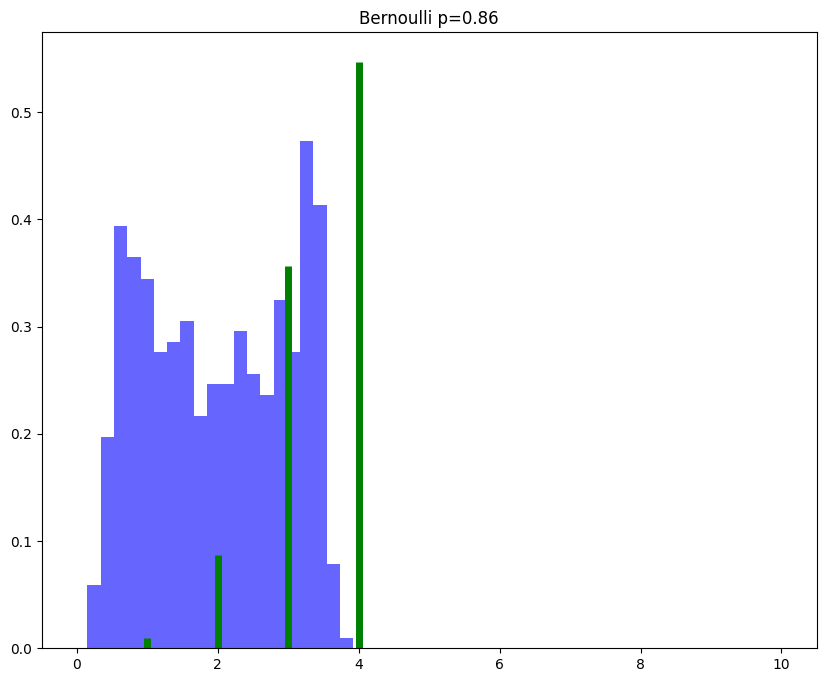

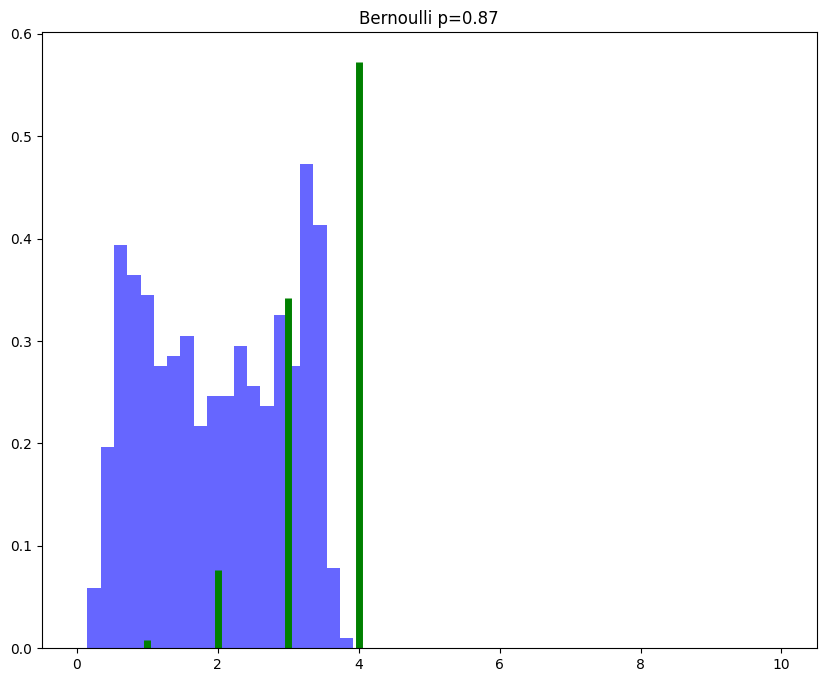

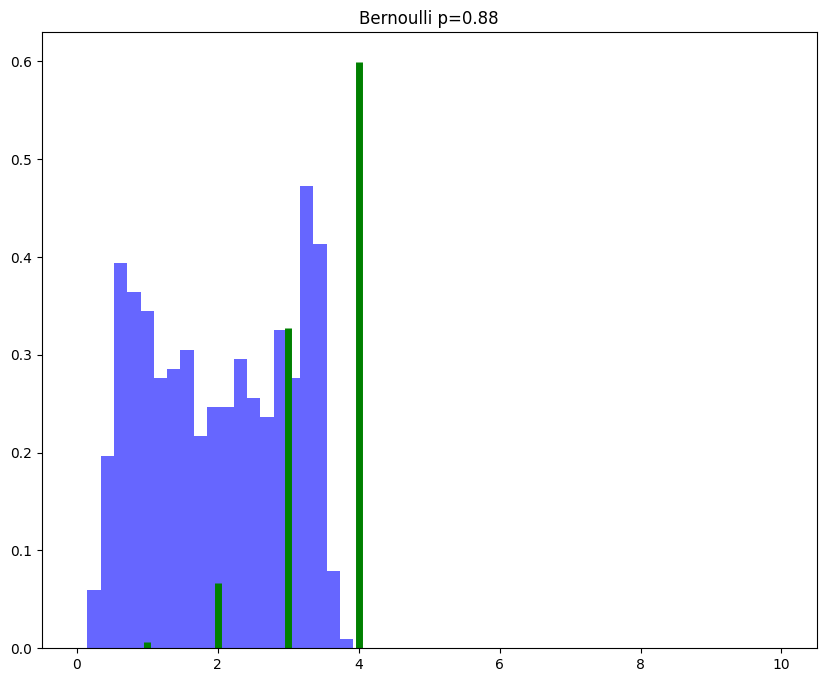

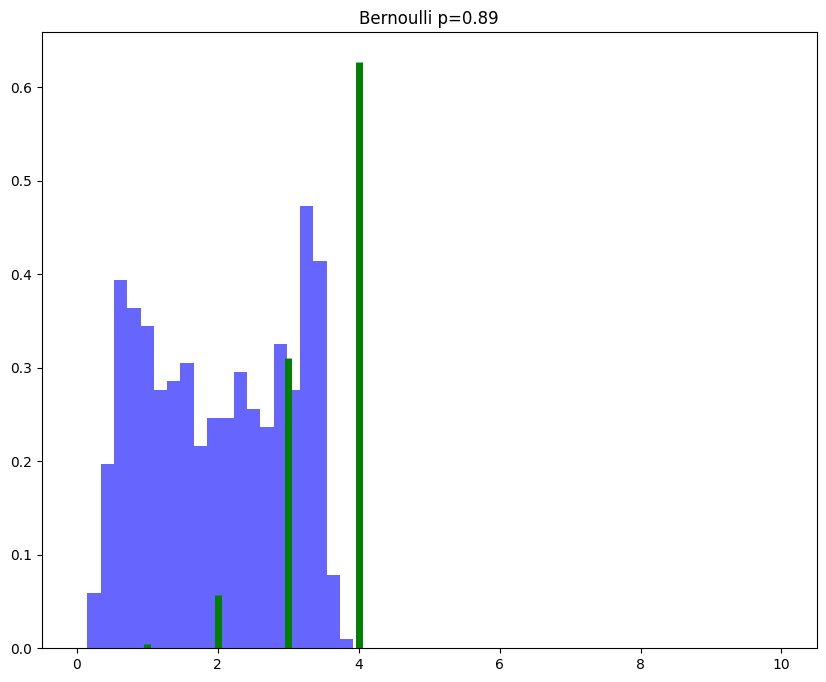

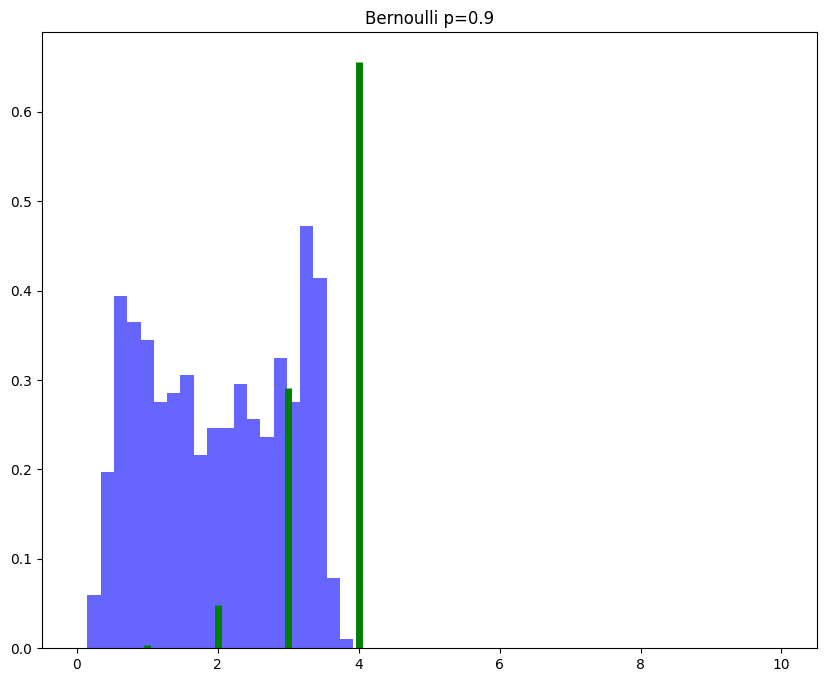

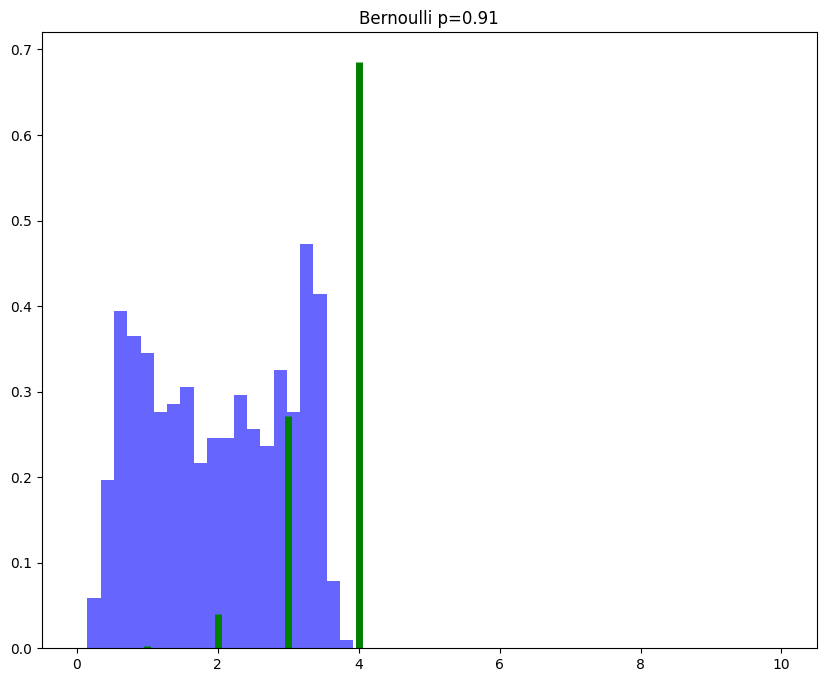

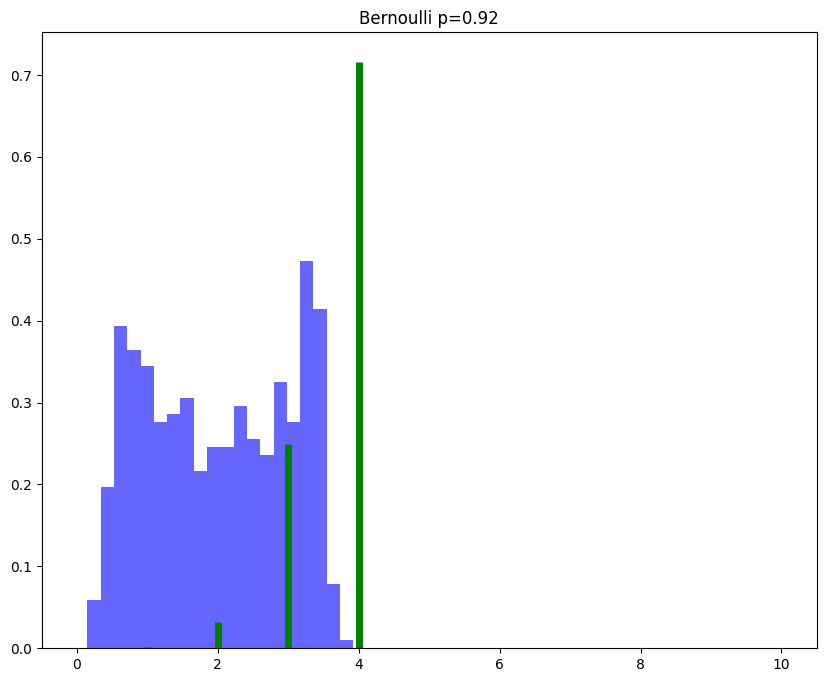

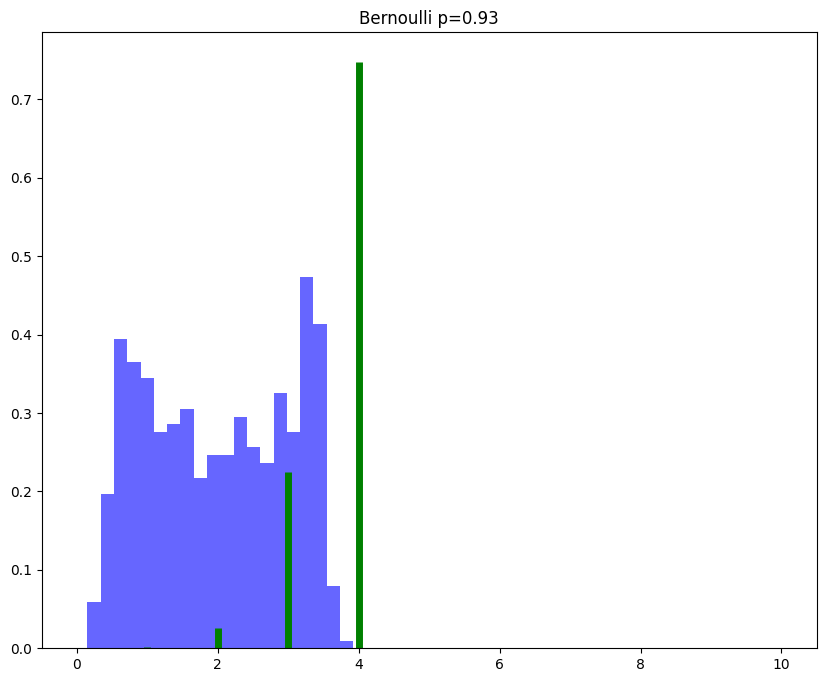

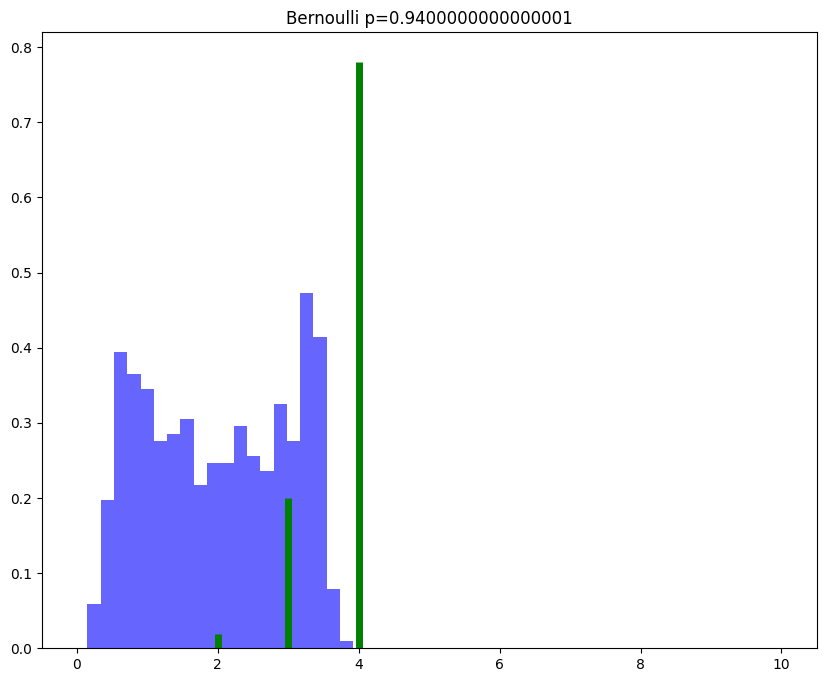

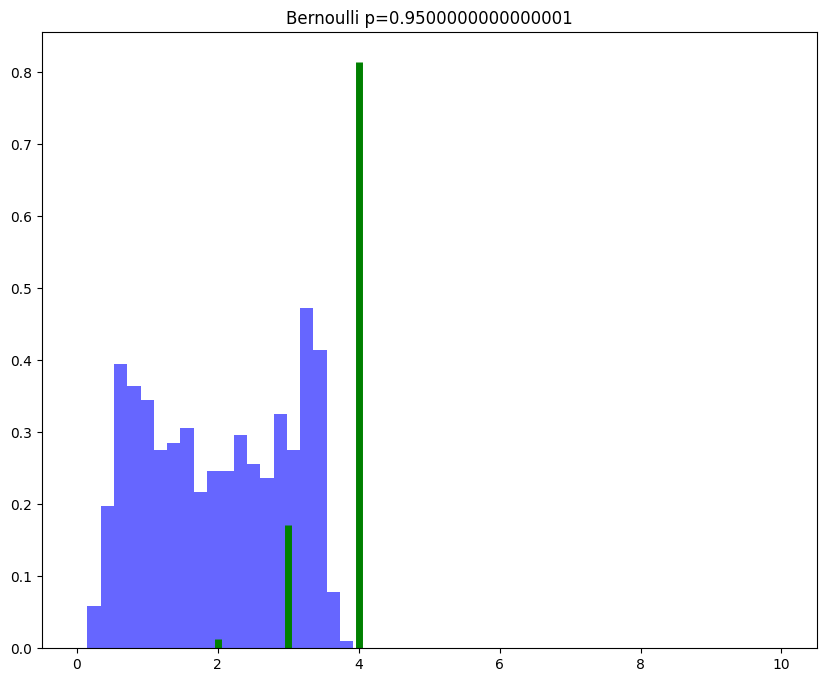

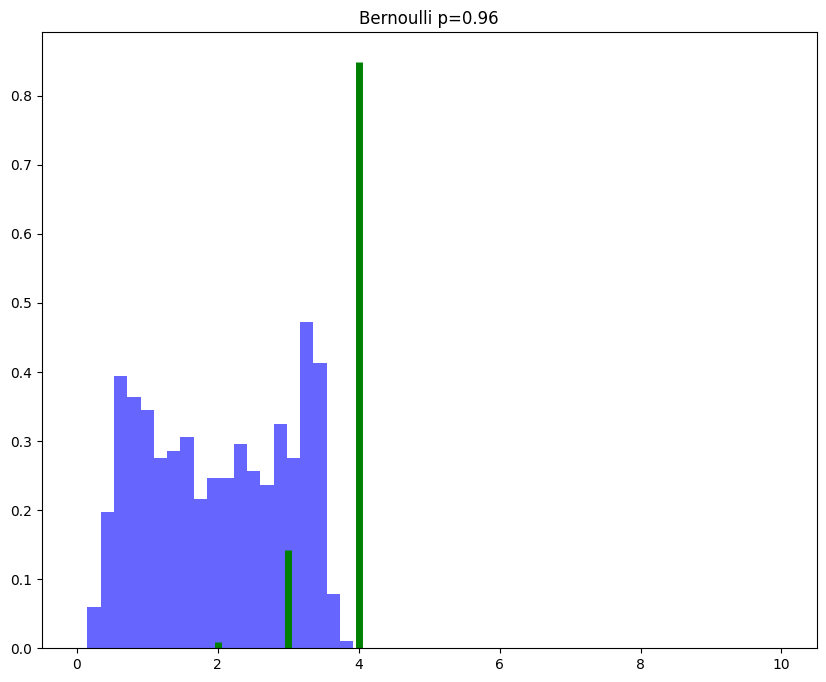

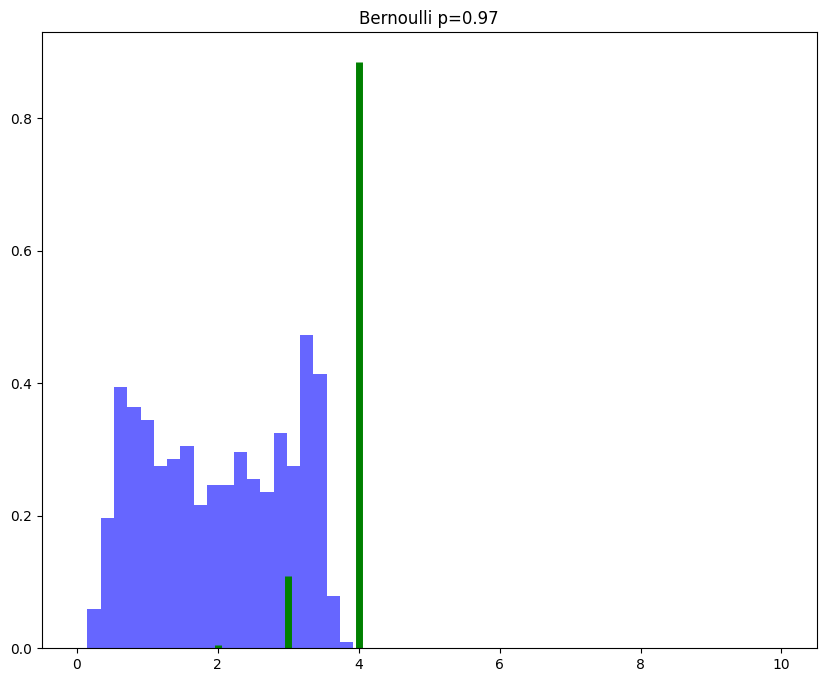

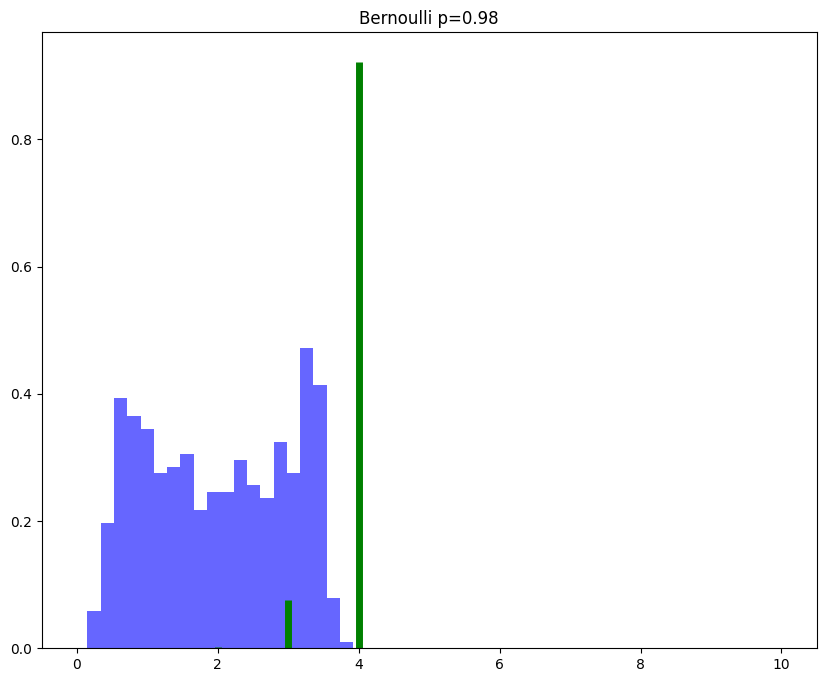

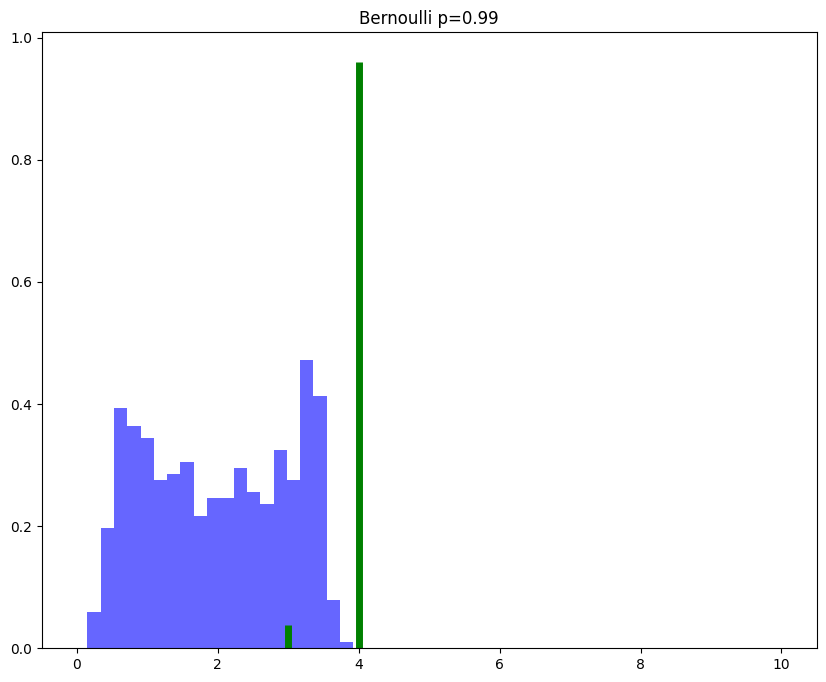

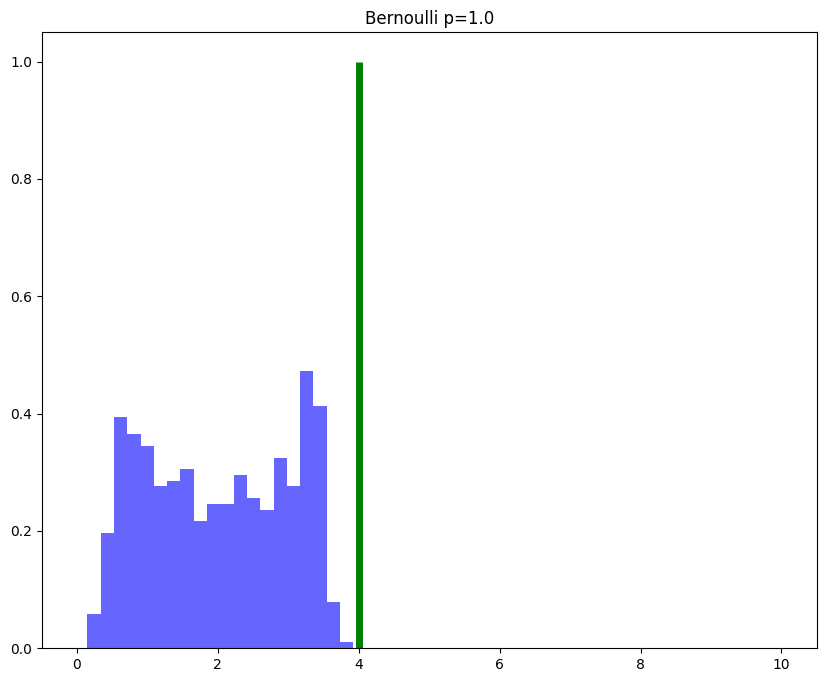

In [ ]:
donnees = (y_tr_a_[13]['y'] - y_tr_a_[13]['y'].mean()) / y_tr_a_[13]['y'].std() + 2 # y_tr_a_[13]['y'].min()
for k in range(101): 
    plt.figure(figsize=(10,8))
    plt.hist(donnees, bins=20, density=True, alpha=0.6, color='b')
    n_binom = 4 # donnees.max() # 10  # Nombre d'essais
    p_binom = k * 1e-2  # Probabilité de succès
    rv_binom = stats.binom(n_binom, p_binom)
    x_binom = np.arange(0, 11)
    plt.vlines(x_binom, 0, rv_binom.pmf(x_binom), colors='g', lw=5, label='Loi binomiale')
    plt.title(f"Bernoulli p={p_binom}")
    plt.plot()

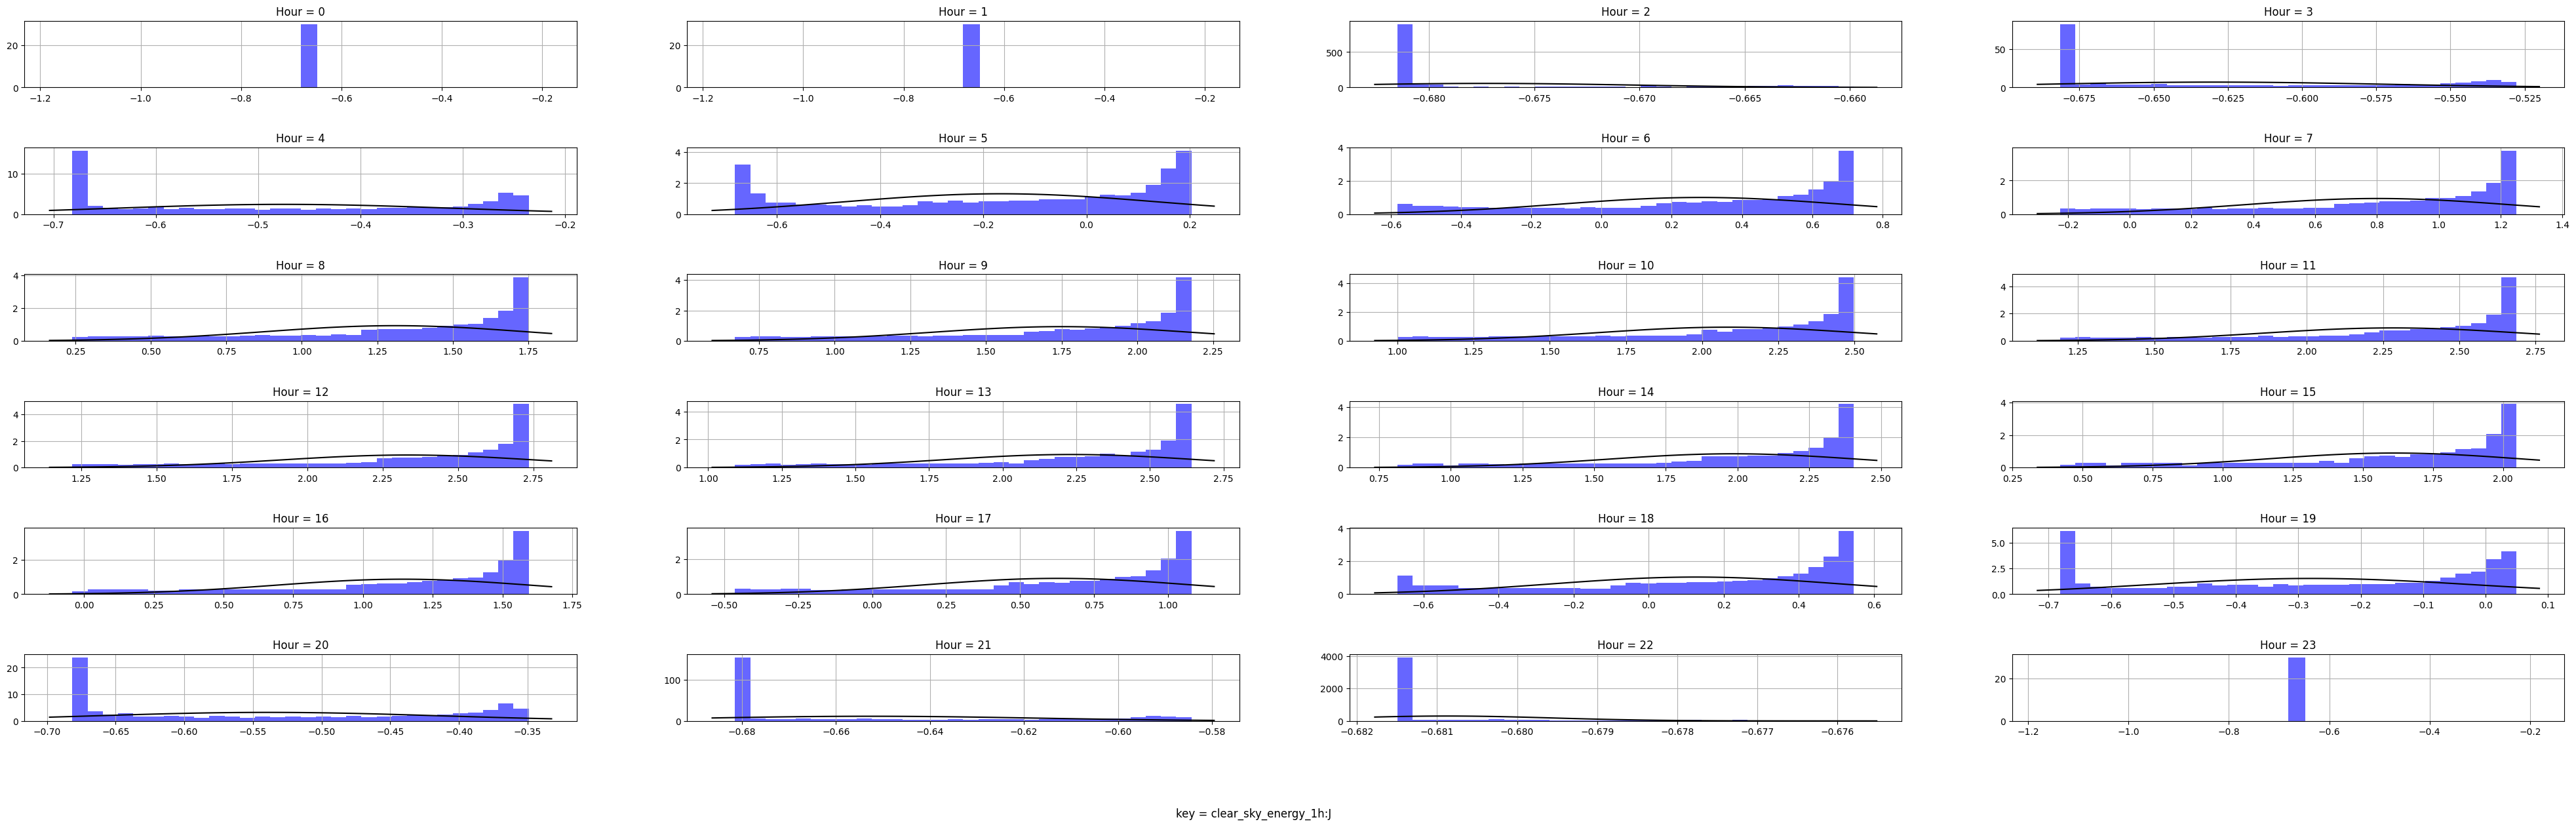

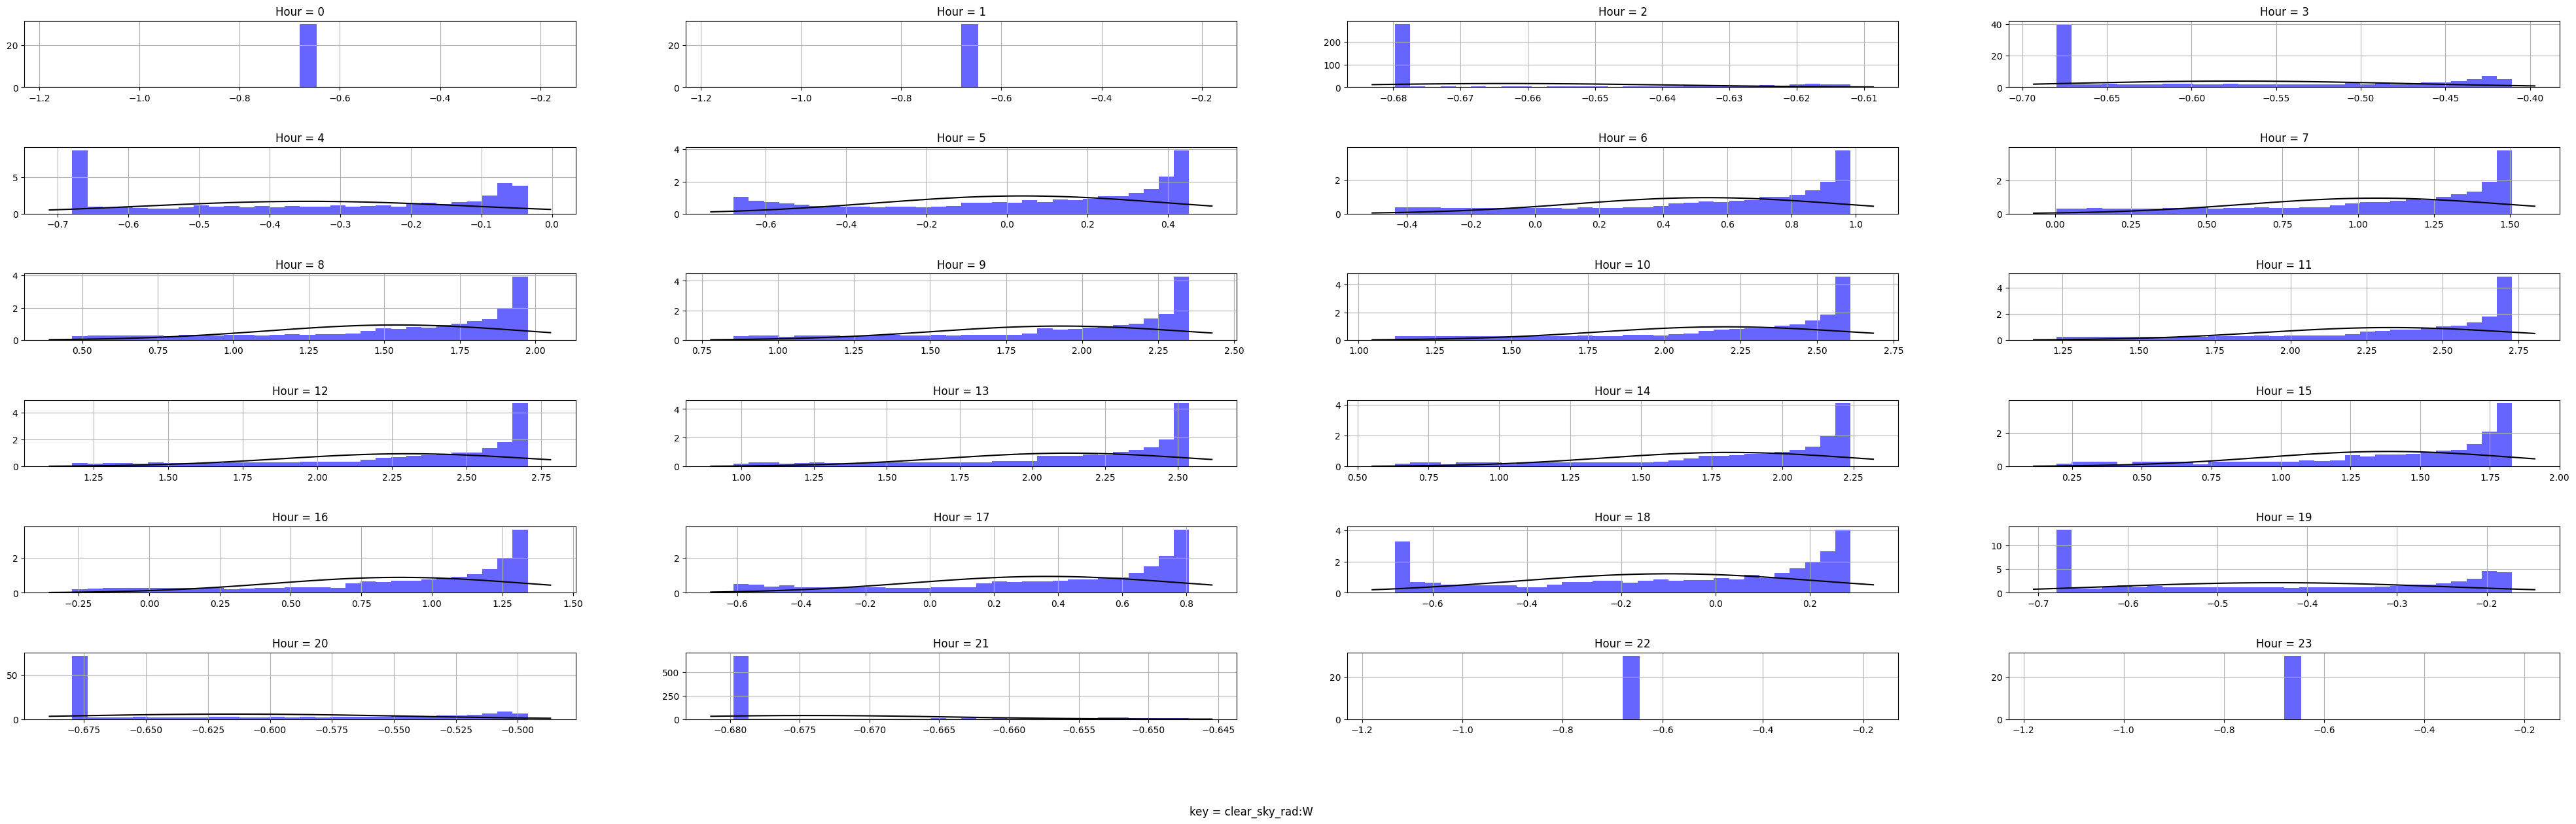

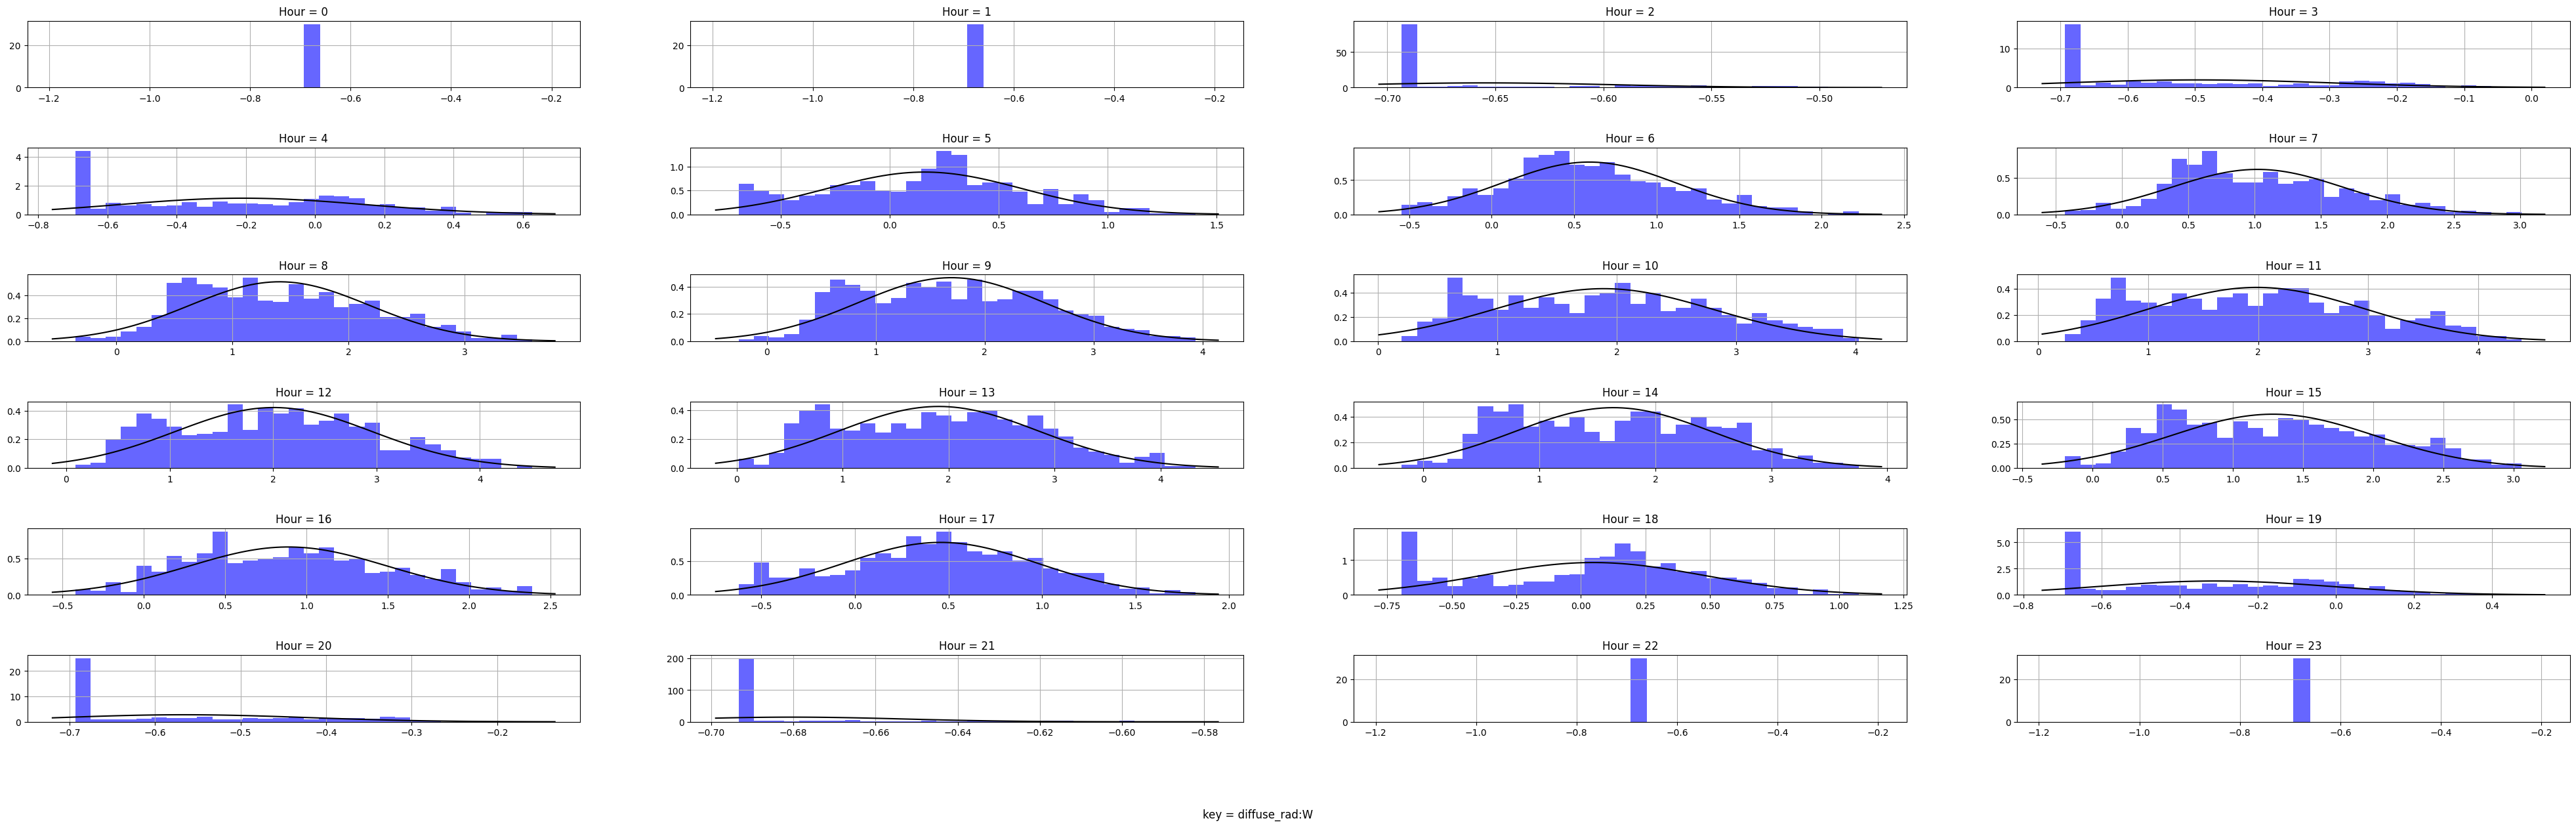

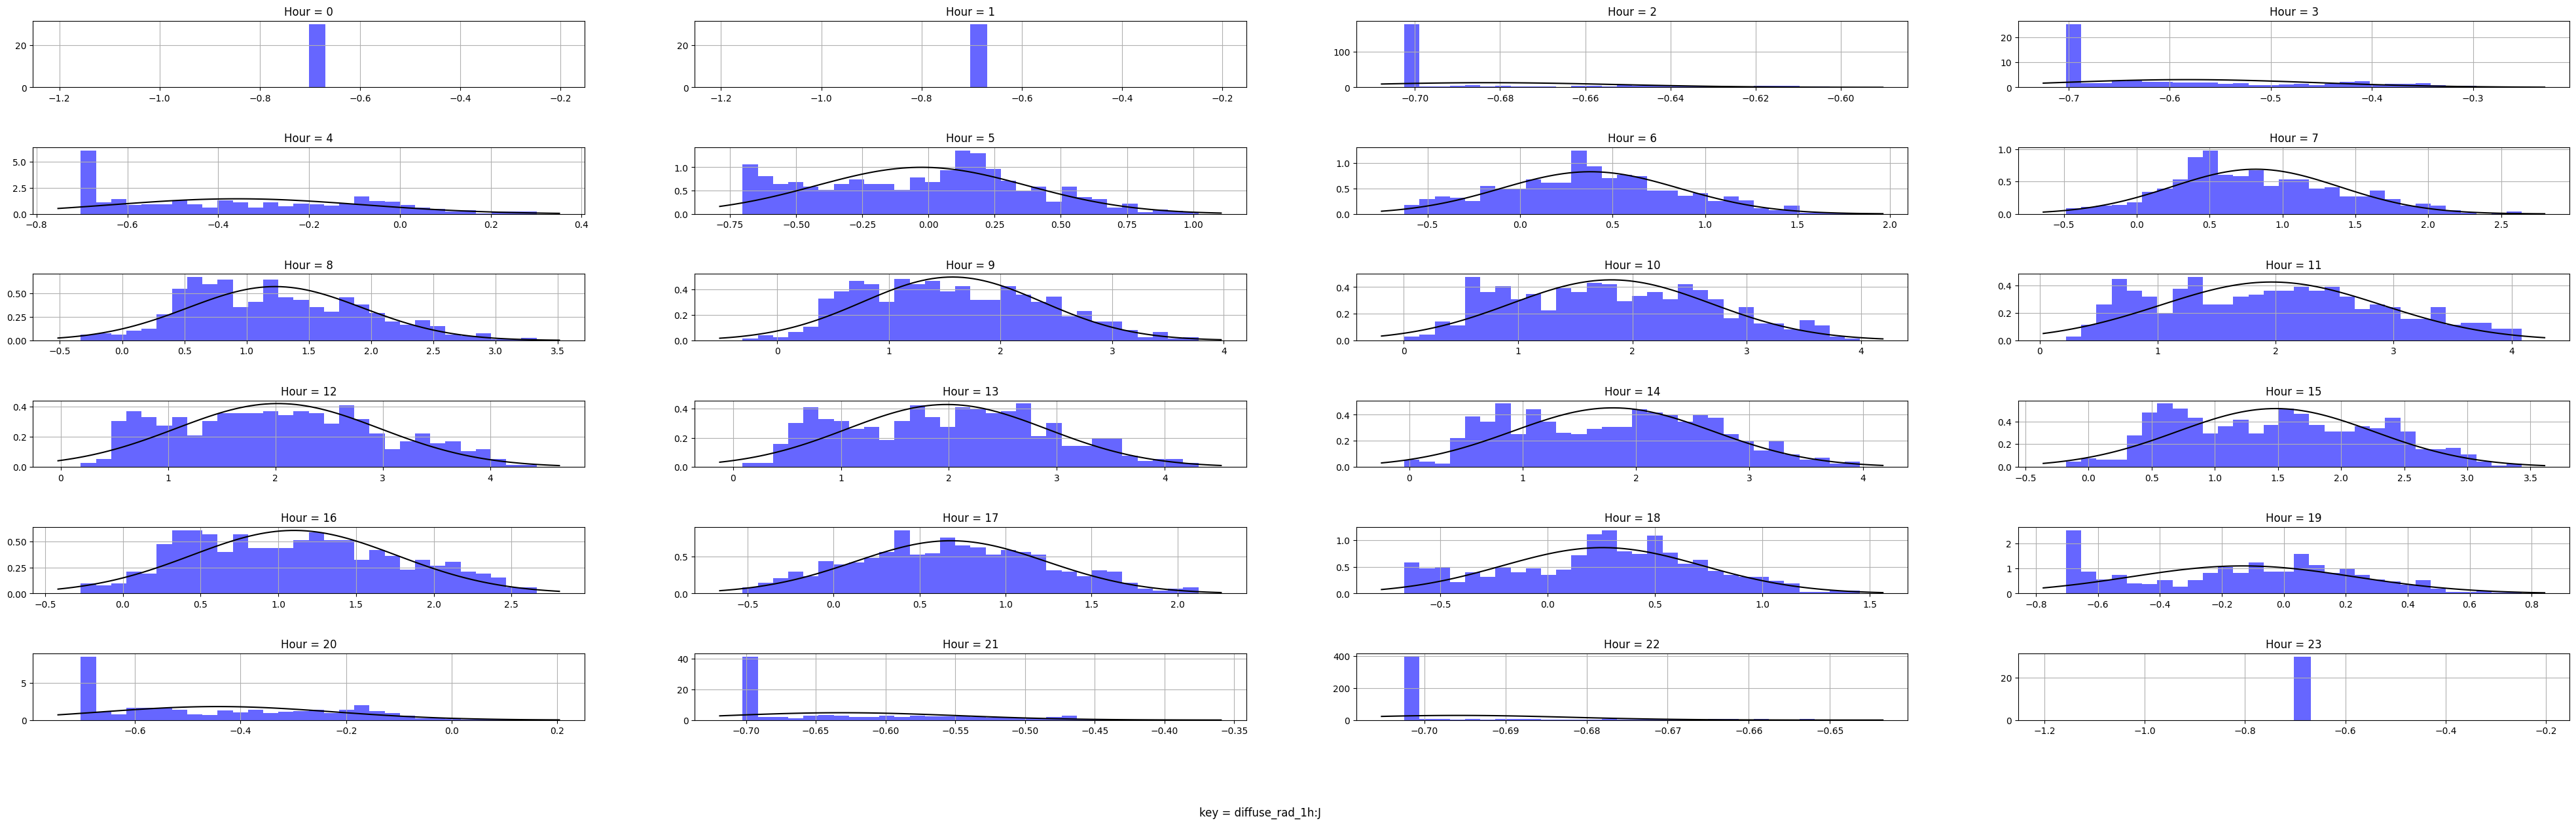

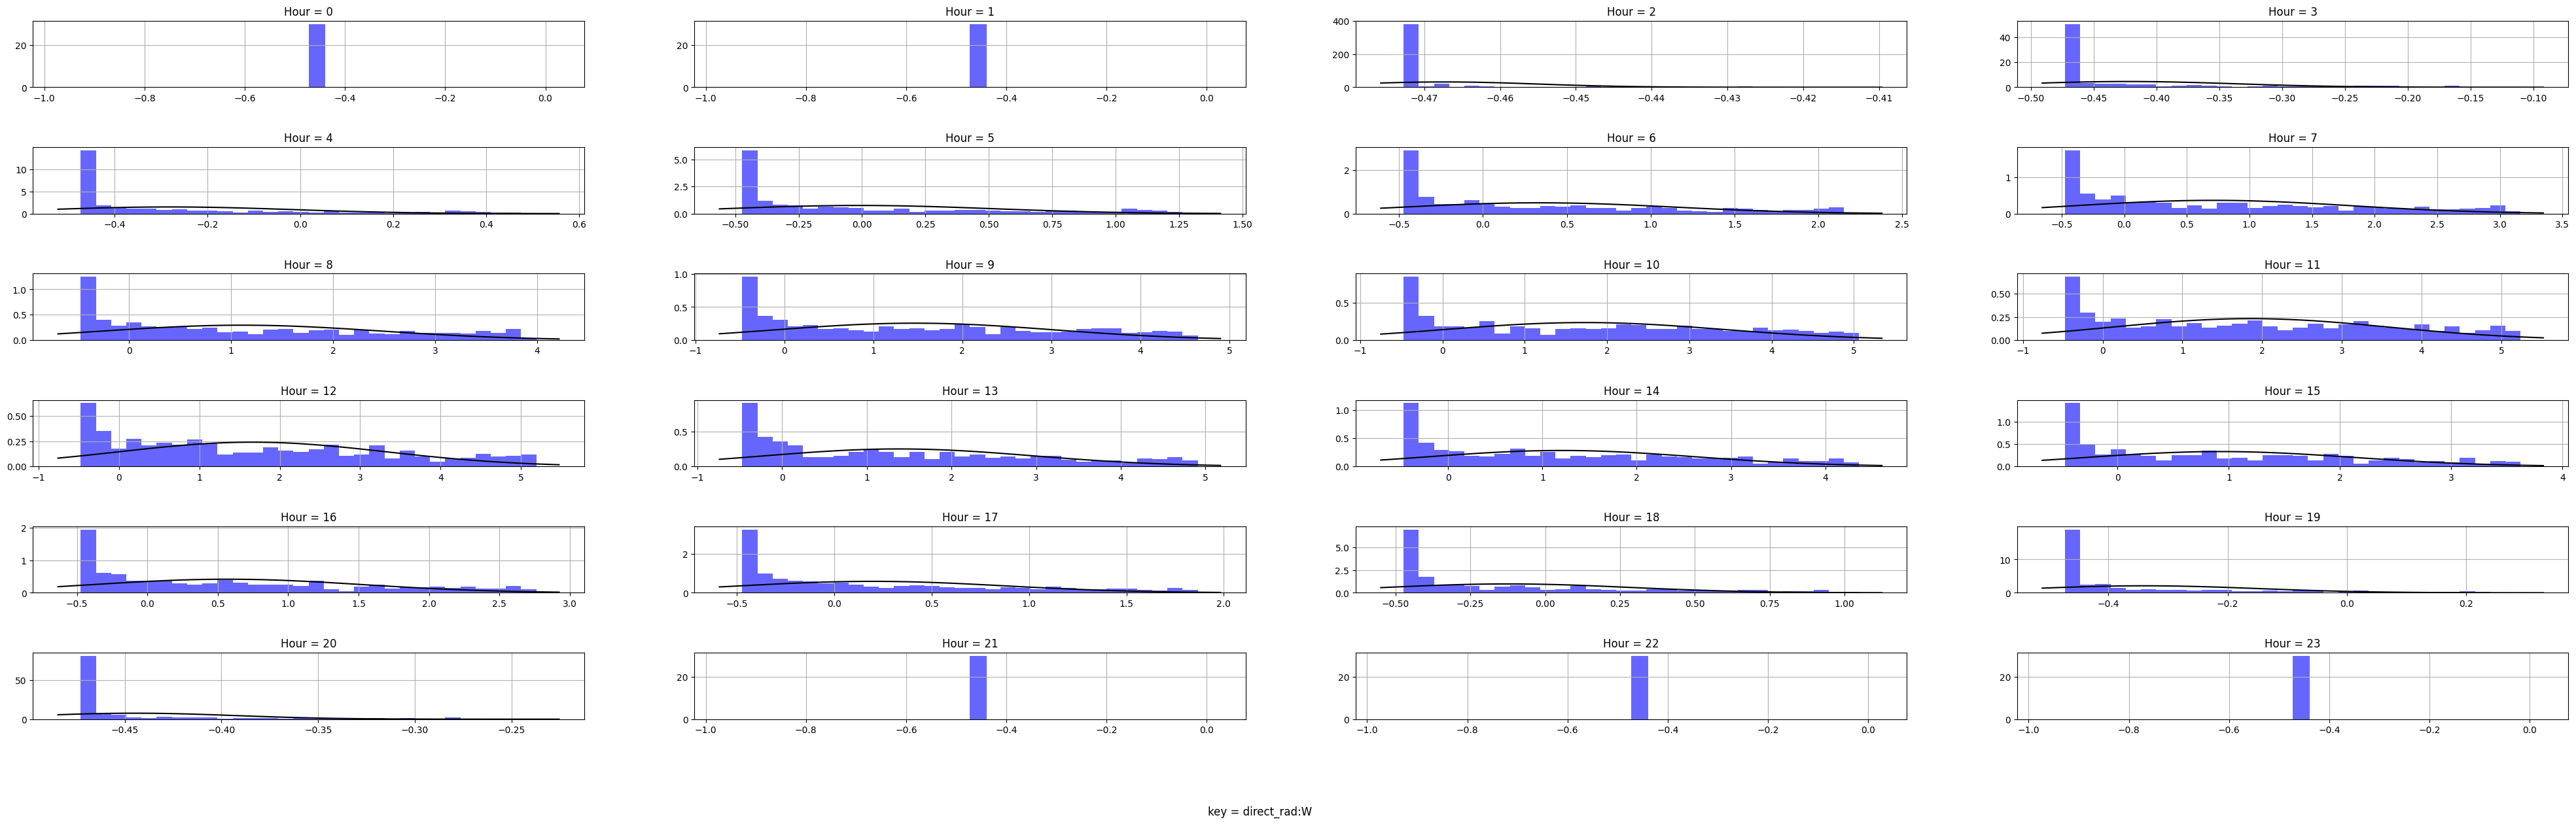

In [ ]:
for k in keys:
    plt.figure(figsize=(50, 12))
    for h in range(24):
        # print("hour:", h)
        plt.subplot(6, 4, h + 1)
        md.plot_normal_distribution(X_tr_obs_a_[h][k], X_tr_obs_a_[h][k].mean(), X_tr_obs_a_[h][k].std())
        plt.title(f"Hour = {h}")
        plt.grid()

    plt.suptitle(f'key = {k}', y=0)
    plt.subplots_adjust(top=1., hspace=.9)
    plt.show()